In [1]:
import pandas as pd
import collections
import math
import os

import cv2
import matplotlib.pyplot as plt
import cv2
import sys
import numpy as np
import math
import time
from PIL import Image 

from pandas import read_csv  
import configparser

config = configparser.ConfigParser()
config.read('configLivingroom2p.txt')

source_folder = config.get('Configuration', 'source_folder')
time_step = int(config.get('Configuration', 'time_step'))
data_folder = config.get('Configuration', 'data_folder')
ini_date = config.get('Configuration', 'ini_date')
end_date = config.get('Configuration', 'end_date')

window_size = int(config.get('Configuration', 'window_size'))

scenes=config.get('Configuration', 'scenes')
scenes = [(item.strip()) for item in scenes.split(',')]

print(scenes)

users=config.get('Configuration', 'users')
users = [(item.strip()) for item in users.split(',')]

anchors=config.get('Configuration', 'anchors')
anchors = [(item.strip()) for item in anchors.split(',')]

room=config.get('Configuration', 'room')

w = int(config.get(room, 'w'))
h = int(config.get(room, 'h'))

user_color={}
for user in users:
    user_color[user]=config.get('Colors', user)
print(user_color)


['Scene1', 'Scene2', 'Scene3', 'Scene4', 'Scene5', 'Scene6']
{'f02e': 'green', '867f': 'blue'}


In [2]:
import numpy as np
from pandas import read_csv    
import pandas as pd
import time

from datetime import datetime

off_zone=60*60*2

def day_time(ti):
    return int((int)((ti+off_zone)/(60*60*24)))


def time2str(tt):
    return datetime.fromtimestamp(tt).strftime("%Y-%m-%d %H:%M:%S")


t0 = (int)(datetime.strptime(ini_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (ini_date,"Init date is", t0, "day:",day_time(t0), time2str(t0))

tN = (int)(datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (end_date,"End date is", tN, "day:",day_time(tN), time2str(tN))


def day_time0(ti):
    return day_time(ti)-day_time(t0)+1

def relT(ti):
    return (int)((ti-t0)/time_step)

days=list(range(day_time(t0),day_time(tN)+1))
print(days)

i0=0
ts=list(range(t0,tN,1))
print(i0,ts)
print(len(ts))

2024-03-16 19:31:00 Init date is 1710613860 day: 19798 2024-03-16 19:31:00
2024-03-16 20:26:35 End date is 1710617195 day: 19798 2024-03-16 20:26:35
[19798]
0 [1710613860, 1710613861, 1710613862, 1710613863, 1710613864, 1710613865, 1710613866, 1710613867, 1710613868, 1710613869, 1710613870, 1710613871, 1710613872, 1710613873, 1710613874, 1710613875, 1710613876, 1710613877, 1710613878, 1710613879, 1710613880, 1710613881, 1710613882, 1710613883, 1710613884, 1710613885, 1710613886, 1710613887, 1710613888, 1710613889, 1710613890, 1710613891, 1710613892, 1710613893, 1710613894, 1710613895, 1710613896, 1710613897, 1710613898, 1710613899, 1710613900, 1710613901, 1710613902, 1710613903, 1710613904, 1710613905, 1710613906, 1710613907, 1710613908, 1710613909, 1710613910, 1710613911, 1710613912, 1710613913, 1710613914, 1710613915, 1710613916, 1710613917, 1710613918, 1710613919, 1710613920, 1710613921, 1710613922, 1710613923, 1710613924, 1710613925, 1710613926, 1710613927, 1710613928, 1710613929, 

In [3]:
scene_user = {}
lista_timestamps=[]
for d in days:
    for user in users:
        scene_user[user] = {}
        for s in scenes:
            print(d,source_folder+"/"+s+"/location_gt_"+user+"/"+str(d)+".location.tsv")
            try:
                series=read_csv(source_folder+"/"+s+"/location_gt_"+user+"/"+str(d)+".location.tsv", sep="\t",parse_dates=True, header=None, names=["time","date","time2","x","y"])
                print(d,series.size,(series["time"].iloc[0],series["time"].iloc[-1]))
                scene_user[user][s] = (series["time"].iloc[0],series["time"].iloc[-1])
                #print("test")
                print(scene_user[user][s])
                #if user=='ed9c':
                lista_timestamps.extend(list(range(scene_user[user][s][0],scene_user[user][s][1],1)))
                #print(lista_timestamps)
                #print("test2")
            except Exception as e:
                print("Not data",e)
                continue
def getScene(t0):
    for user, user_scene in scene_user.items():
        for scene, times in user_scene.items():
            #print(t0,times[0],times[1])
            if(t0>times[0]-window_size/2 and t0<times[1]+window_size/2):
                return scene
    return None

19798 ./data/livingroom/2-person-labelled/Scene1/location_gt_f02e/19798.location.tsv
19798 1960 (1710613851, 1710614183)
(1710613851, 1710614183)
19798 ./data/livingroom/2-person-labelled/Scene2/location_gt_f02e/19798.location.tsv
19798 2510 (1710614425, 1710614773)
(1710614425, 1710614773)
19798 ./data/livingroom/2-person-labelled/Scene3/location_gt_f02e/19798.location.tsv
19798 2290 (1710615299, 1710615618)
(1710615299, 1710615618)
19798 ./data/livingroom/2-person-labelled/Scene4/location_gt_f02e/19798.location.tsv
19798 2085 (1710615774, 1710616088)
(1710615774, 1710616088)
19798 ./data/livingroom/2-person-labelled/Scene5/location_gt_f02e/19798.location.tsv
19798 1660 (1710616615, 1710616905)
(1710616615, 1710616905)
19798 ./data/livingroom/2-person-labelled/Scene6/location_gt_f02e/19798.location.tsv
19798 1290 (1710617082, 1710617196)
(1710617082, 1710617196)
19798 ./data/livingroom/2-person-labelled/Scene1/location_gt_867f/19798.location.tsv
19798 1350 (1710613852, 1710614182)
(17

In [4]:
def getFPImg(tt):
    img_path = os.path.join(data_folder+"B", "DAY_" + str(day), "FP." + str(tt) + ".png")
    #print(img_path)
    img = np.array(Image.open(img_path))/255.0
    #print(img)
    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)
    
    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad
    
    #print(top_pad,bottom_pad,left_pad,right_pad)
    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')
    
    #print(img_padded)
    # Guardar la imagen sobrescrita
    #Image.fromarray((img_padded * 255).astype(np.uint8)).save(img_path)
    
    return img_padded

def getFPImg0(tt):
    img_path = os.path.join(data_folder, room, "DAY_" + str(day), "FP." + str(tt) + ".png")
    #print(img_path)
    img = np.array(Image.open(img_path))/255.0
    #print(img)
    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)
    
    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad
    
    #print(top_pad,bottom_pad,left_pad,right_pad)
    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')
    
    #print(img_padded)
    # Guardar la imagen sobrescrita
    Image.fromarray((img_padded * 255).astype(np.uint8)).save(img_path)
    
    return img_padded

def getGTImg(tt, user):
    img_path = os.path.join(data_folder, room, "DAY_" + str(day), "GT." + user + "." + str(tt) + ".png")
    img = np.array(Image.open(img_path)) / 255.0

    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)

    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad

    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')

    # Procesamiento adicional: propagación de valores
    h_padded, w_padded = img_padded.shape
    img_propagated = img_padded.copy()  # Crear una copia para no modificar la original durante el proceso

    for x in range(h_padded):
        for y in range(w_padded):
            if img_padded[x, y] > 0:
                max_val = img_padded[x, y] / 2.0  # Calcular la mitad del valor actual
                neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1),(x - 1, y-1), (x + 1, y+1), (x+1, y - 1), (x-1, y + 1)]
                #neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
                for nx, ny in neighbors:
                    if 0 <= nx < h_padded and 0 <= ny < w_padded:
                        img_propagated[nx, ny] = max(img_propagated[nx, ny], max_val)

    # Guardar la imagen sobrescrita
    #Image.fromarray((img_propagated * 255).astype(np.uint8)).save(img_path)

    return img_propagated

#test=getFPImg(1710618646)

#test=getFPImg(1710618646)

In [5]:
ts=lista_timestamps
#ts=list(set(ts))

ts=list(dict.fromkeys(ts))
ts.sort()
#ts=list(set(ts))
ts=ts[:-5]
print(enumerate(ts))
print(ts)
print(len(ts))
XY0={}
rssi0={}
Y0={}

T0_user={}
T0=[]
T1=[]
for day in days:
    anchors_data={}
    for user in users:
        XY0[user]=[]
        rssi0[user]=[]
        Y0[user]=[]
        T0_user[user]=[]


        anchors_data[user]={}
        for anchor in anchors:
            print(data_folder+"/"+room+"/DAY_"+str(day)+"/"+user+"."+anchor+".tsv")
            print(user,anchor)
            series=read_csv(data_folder+"/"+room+"/DAY_"+str(day)+"/"+user+"."+anchor+".tsv", sep="\t",parse_dates=True, header=None, names=["time","d"])
            series=series.values
            anchors_data[user][anchor]=series
            

    for it,tt in enumerate(ts):
        print(it,tt)
        imgX=getFPImg(tt)
        print("imgX",imgX.shape)

        for user in users:
            
            imgY=getGTImg(tt,user)
            #if imgY is None:
            #    continue
            print("user",user,"imgY",imgY.shape)

            dist=[]
            for ixa,anchor in enumerate(anchors):
                #if(len(ts))
                d=anchors_data[user][anchor][it][1]
                #print(len(anchors_data[user][anchor]))
                if(d>0):
                    d=d/10.0
                if(d>1):
                    d=1
                print("\t anchor:",anchor, anchors_data[user][anchor][it], "tt:",tt)
                dist.append(d)

            dist=np.array(dist)
            print("dist:",dist)

            rssi0[user].append(dist.reshape(len(anchors),1))
            XY0[user].append(imgX[:, :, np.newaxis])
            Y0[user].append(imgY[:, :, np.newaxis])
            T0_user[user].append(it)
            T0.append(it)
            T1.append(tt)
print(T0)        
print(T1)        
print(len(T1))
T0=list(dict.fromkeys(T0))
T1=list(dict.fromkeys(T1))
print(T0)        
print(T1)
#print(T0_user)

[1710613851, 1710613852, 1710613853, 1710613854, 1710613855, 1710613856, 1710613857, 1710613858, 1710613859, 1710613860, 1710613861, 1710613862, 1710613863, 1710613864, 1710613865, 1710613866, 1710613867, 1710613868, 1710613869, 1710613870, 1710613871, 1710613872, 1710613873, 1710613874, 1710613875, 1710613876, 1710613877, 1710613878, 1710613879, 1710613880, 1710613881, 1710613882, 1710613883, 1710613884, 1710613885, 1710613886, 1710613887, 1710613888, 1710613889, 1710613890, 1710613891, 1710613892, 1710613893, 1710613894, 1710613895, 1710613896, 1710613897, 1710613898, 1710613899, 1710613900, 1710613901, 1710613902, 1710613903, 1710613904, 1710613905, 1710613906, 1710613907, 1710613908, 1710613909, 1710613910, 1710613911, 1710613912, 1710613913, 1710613914, 1710613915, 1710613916, 1710613917, 1710613918, 1710613919, 1710613920, 1710613921, 1710613922, 1710613923, 1710613924, 1710613925, 1710613926, 1710613927, 1710613928, 1710613929, 1710613930, 1710613931, 1710613932, 1710613933, 171

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061386e+09 -1.00000000e+00] tt: 1710613864
	 anchor: eb38 [ 1.71061386e+09 -1.00000000e+00] tt: 1710613864
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061386e+09 -1.00000000e+00] tt: 1710613864
	 anchor: eb38 [ 1.71061386e+09 -1.00000000e+00] tt: 1710613864
dist: [-1. -1.]
14 1710613865
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061386e+09 -1.00000000e+00] tt: 1710613865
	 anchor: eb38 [ 1.71061386e+09 -1.00000000e+00] tt: 1710613865
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061386e+09 -1.00000000e+00] tt: 1710613865
	 anchor: eb38 [ 1.71061386e+09 -1.00000000e+00] tt: 1710613865
dist: [-1. -1.]
15 1710613866
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061386e+09 5.10500000e+00] tt: 1710613866
	 anchor: eb38 [1.71061386e+09 4.00800000e+00] tt: 1710613866
dist: [0.5105 0.4008]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061386e+09 -1.00000000e+00] tt: 1710613866
	 anchor: eb38 [ 1

user 867f imgY (8, 8)
	 anchor: 8171 [1.71061391e+09 2.74900000e+00] tt: 1710613912
	 anchor: eb38 [1.71061391e+09 4.47200000e+00] tt: 1710613912
dist: [0.2749 0.4472]
62 1710613913
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061391e+09 7.46200000e+00] tt: 1710613913
	 anchor: eb38 [1.71061391e+09 3.35300000e+00] tt: 1710613913
dist: [0.7462 0.3353]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061391e+09 2.74900000e+00] tt: 1710613913
	 anchor: eb38 [1.71061391e+09 4.56600000e+00] tt: 1710613913
dist: [0.2749 0.4566]
63 1710613914
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061391e+09 7.46200000e+00] tt: 1710613914
	 anchor: eb38 [1.71061391e+09 3.35300000e+00] tt: 1710613914
dist: [0.7462 0.3353]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061391e+09 2.97300000e+00] tt: 1710613914
	 anchor: eb38 [1.71061391e+09 4.56600000e+00] tt: 1710613914
dist: [0.2973 0.4566]
64 1710613915
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061391e+09 -1.00000000e+00] tt: 1710613

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061395e+09 -1.00000000e+00] tt: 1710613953
	 anchor: eb38 [ 1.71061395e+09 -1.00000000e+00] tt: 1710613953
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061395e+09 -1.00000000e+00] tt: 1710613953
	 anchor: eb38 [1.71061395e+09 5.09100000e+00] tt: 1710613953
dist: [-1.      0.5091]
103 1710613954
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061395e+09 -1.00000000e+00] tt: 1710613954
	 anchor: eb38 [ 1.71061395e+09 -1.00000000e+00] tt: 1710613954
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061395e+09 -1.00000000e+00] tt: 1710613954
	 anchor: eb38 [ 1.71061395e+09 -1.00000000e+00] tt: 1710613954
dist: [-1. -1.]
104 1710613955
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061395e+09 6.25300000e+00] tt: 1710613955
	 anchor: eb38 [1.71061395e+09 2.24300000e+00] tt: 1710613955
dist: [0.6253 0.2243]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061395e+09 -1.00000000e+00] tt: 1710613955
	 anchor: 

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061398e+09 4.31700000e+00] tt: 1710613986
	 anchor: eb38 [1.71061398e+09 4.36400000e+00] tt: 1710613986
dist: [0.4317 0.4364]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061398e+09 6.86600000e+00] tt: 1710613986
	 anchor: eb38 [1.71061398e+09 1.82600000e+00] tt: 1710613986
dist: [0.6866 0.1826]
136 1710613987
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061399e+09 -1.00000000e+00] tt: 1710613987
	 anchor: eb38 [ 1.71061399e+09 -1.00000000e+00] tt: 1710613987
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061399e+09 6.86600000e+00] tt: 1710613987
	 anchor: eb38 [1.71061399e+09 1.82600000e+00] tt: 1710613987
dist: [0.6866 0.1826]
137 1710613988
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061399e+09 -1.00000000e+00] tt: 1710613988
	 anchor: eb38 [ 1.71061399e+09 -1.00000000e+00] tt: 1710613988
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061399e+09 -1.00000000e+00] tt: 1710613988
	 anchor: eb

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061401e+09 -1.00000000e+00] tt: 1710614011
	 anchor: eb38 [ 1.71061401e+09 -1.00000000e+00] tt: 1710614011
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061401e+09 6.31400000e+00] tt: 1710614011
	 anchor: eb38 [1.71061401e+09 1.42900000e+00] tt: 1710614011
dist: [0.6314 0.1429]
161 1710614012
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061401e+09 3.98500000e+00] tt: 1710614012
	 anchor: eb38 [1.71061401e+09 4.21400000e+00] tt: 1710614012
dist: [0.3985 0.4214]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061401e+09 6.31400000e+00] tt: 1710614012
	 anchor: eb38 [1.71061401e+09 1.35400000e+00] tt: 1710614012
dist: [0.6314 0.1354]
162 1710614013
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061401e+09 3.98500000e+00] tt: 1710614013
	 anchor: eb38 [1.71061401e+09 4.21400000e+00] tt: 1710614013
dist: [0.3985 0.4214]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061401e+09 6.34600000e+00] tt: 1710614013
	 anchor: eb

user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061405e+09 -1.00000000e+00] tt: 1710614048
	 anchor: eb38 [ 1.71061405e+09 -1.00000000e+00] tt: 1710614048
dist: [-1. -1.]
198 1710614049
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061405e+09 4.10700000e+00] tt: 1710614049
	 anchor: eb38 [1.71061405e+09 4.48200000e+00] tt: 1710614049
dist: [0.4107 0.4482]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061405e+09 -1.00000000e+00] tt: 1710614049
	 anchor: eb38 [ 1.71061405e+09 -1.00000000e+00] tt: 1710614049
dist: [-1. -1.]
199 1710614050
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061405e+09 -1.00000000e+00] tt: 1710614050
	 anchor: eb38 [ 1.71061405e+09 -1.00000000e+00] tt: 1710614050
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061405e+09 -1.00000000e+00] tt: 1710614050
	 anchor: eb38 [ 1.71061405e+09 -1.00000000e+00] tt: 1710614050
dist: [-1. -1.]
200 1710614051
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061405e+09 -1.00000000e+00] tt: 1710614051
	

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061409e+09 5.39500000e+00] tt: 1710614090
	 anchor: eb38 [1.71061409e+09 2.66000000e+00] tt: 1710614090
dist: [0.5395 0.266 ]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061409e+09 -1.00000000e+00] tt: 1710614090
	 anchor: eb38 [ 1.71061409e+09 -1.00000000e+00] tt: 1710614090
dist: [-1. -1.]
240 1710614091
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061409e+09 5.40400000e+00] tt: 1710614091
	 anchor: eb38 [1.71061409e+09 2.91700000e+00] tt: 1710614091
dist: [0.5404 0.2917]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061409e+09 -1.00000000e+00] tt: 1710614091
	 anchor: eb38 [ 1.71061409e+09 -1.00000000e+00] tt: 1710614091
dist: [-1. -1.]
241 1710614092
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061409e+09 5.40400000e+00] tt: 1710614092
	 anchor: eb38 [1.71061409e+09 2.91700000e+00] tt: 1710614092
dist: [0.5404 0.2917]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061409e+09 -1.00000000e+00] tt: 1710614092
	 anchor: eb

user 867f imgY (8, 8)
	 anchor: 8171 [1.71061414e+09 4.34100000e+00] tt: 1710614139
	 anchor: eb38 [1.71061414e+09 3.23600000e+00] tt: 1710614139
dist: [0.4341 0.3236]
289 1710614140
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061414e+09 5.24100000e+00] tt: 1710614140
	 anchor: eb38 [1.71061414e+09 2.72500000e+00] tt: 1710614140
dist: [0.5241 0.2725]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061414e+09 4.36000000e+00] tt: 1710614140
	 anchor: eb38 [1.71061414e+09 3.23100000e+00] tt: 1710614140
dist: [0.436  0.3231]
290 1710614141
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061414e+09 5.24100000e+00] tt: 1710614141
	 anchor: eb38 [1.71061414e+09 2.72500000e+00] tt: 1710614141
dist: [0.5241 0.2725]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061414e+09 4.36000000e+00] tt: 1710614141
	 anchor: eb38 [1.71061414e+09 3.23100000e+00] tt: 1710614141
dist: [0.436  0.3231]
291 1710614142
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061414e+09 5.67600000e+00] tt: 171061

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061419e+09 5.35300000e+00] tt: 1710614426
	 anchor: eb38 [1.71061419e+09 3.26400000e+00] tt: 1710614426
dist: [0.5353 0.3264]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061419e+09 4.91200000e+00] tt: 1710614426
	 anchor: eb38 [1.71061419e+09 2.81900000e+00] tt: 1710614426
dist: [0.4912 0.2819]
337 1710614427
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061419e+09 5.35300000e+00] tt: 1710614427
	 anchor: eb38 [1.71061419e+09 3.36700000e+00] tt: 1710614427
dist: [0.5353 0.3367]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061419e+09 4.91200000e+00] tt: 1710614427
	 anchor: eb38 [1.71061419e+09 2.64600000e+00] tt: 1710614427
dist: [0.4912 0.2646]
338 1710614428
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061419e+09 5.40000000e+00] tt: 1710614428
	 anchor: eb38 [1.71061419e+09 3.42700000e+00] tt: 1710614428
dist: [0.54   0.3427]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061419e+09 5.07200000e+00] tt: 1710614428
	 anchor: 

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061424e+09 5.20800000e+00] tt: 1710614476
	 anchor: eb38 [1.71061424e+09 2.83800000e+00] tt: 1710614476
dist: [0.5208 0.2838]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061424e+09 -1.00000000e+00] tt: 1710614476
	 anchor: eb38 [ 1.71061424e+09 -1.00000000e+00] tt: 1710614476
dist: [-1. -1.]
387 1710614477
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061424e+09 5.20800000e+00] tt: 1710614477
	 anchor: eb38 [1.71061424e+09 2.88000000e+00] tt: 1710614477
dist: [0.5208 0.288 ]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061424e+09 5.51200000e+00] tt: 1710614477
	 anchor: eb38 [1.71061424e+09 2.35100000e+00] tt: 1710614477
dist: [0.5512 0.2351]
388 1710614478
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061424e+09 5.31100000e+00] tt: 1710614478
	 anchor: eb38 [1.71061424e+09 2.88000000e+00] tt: 1710614478
dist: [0.5311 0.288 ]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061424e+09 5.51200000e+00] tt: 1710614478
	 anchor: eb

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061428e+09 5.00200000e+00] tt: 1710614521
	 anchor: eb38 [1.71061428e+09 3.17500000e+00] tt: 1710614521
dist: [0.5002 0.3175]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061428e+09 5.94800000e+00] tt: 1710614521
	 anchor: eb38 [1.71061428e+09 2.78100000e+00] tt: 1710614521
dist: [0.5948 0.2781]
432 1710614522
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061428e+09 4.99200000e+00] tt: 1710614522
	 anchor: eb38 [1.71061428e+09 3.17500000e+00] tt: 1710614522
dist: [0.4992 0.3175]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061428e+09 5.94800000e+00] tt: 1710614522
	 anchor: eb38 [1.71061428e+09 2.78100000e+00] tt: 1710614522
dist: [0.5948 0.2781]
433 1710614523
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061428e+09 4.99200000e+00] tt: 1710614523
	 anchor: eb38 [ 1.71061428e+09 -1.00000000e+00] tt: 1710614523
dist: [ 0.4992 -1.    ]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061428e+09 -1.00000000e+00] tt: 1710614523
	 an

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061433e+09 -1.00000000e+00] tt: 1710614569
	 anchor: eb38 [ 1.71061433e+09 -1.00000000e+00] tt: 1710614569
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061433e+09 -1.00000000e+00] tt: 1710614569
	 anchor: eb38 [ 1.71061433e+09 -1.00000000e+00] tt: 1710614569
dist: [-1. -1.]
480 1710614570
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061433e+09 -1.00000000e+00] tt: 1710614570
	 anchor: eb38 [ 1.71061433e+09 -1.00000000e+00] tt: 1710614570
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061433e+09 -1.00000000e+00] tt: 1710614570
	 anchor: eb38 [ 1.71061433e+09 -1.00000000e+00] tt: 1710614570
dist: [-1. -1.]
481 1710614571
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061433e+09 -1.00000000e+00] tt: 1710614571
	 anchor: eb38 [ 1.71061433e+09 -1.00000000e+00] tt: 1710614571
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061433e+09 -1.00000000e+00] tt: 1710614571
	 anchor: eb38 [ 1

user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061436e+09 -1.00000000e+00] tt: 1710614600
	 anchor: eb38 [ 1.71061436e+09 -1.00000000e+00] tt: 1710614600
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061436e+09 5.30200000e+00] tt: 1710614600
	 anchor: eb38 [1.71061436e+09 2.44000000e+00] tt: 1710614600
dist: [0.5302 0.244 ]
511 1710614601
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061436e+09 -1.00000000e+00] tt: 1710614601
	 anchor: eb38 [ 1.71061436e+09 -1.00000000e+00] tt: 1710614601
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061436e+09 -1.00000000e+00] tt: 1710614601
	 anchor: eb38 [1.71061436e+09 2.56600000e+00] tt: 1710614601
dist: [-1.      0.2566]
512 1710614602
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061436e+09 -1.00000000e+00] tt: 1710614602
	 anchor: eb38 [ 1.71061436e+09 -1.00000000e+00] tt: 1710614602
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061436e+09 5.16600000e+00] tt: 1710614602
	 anchor: eb38 [1.710614

user 867f imgY (8, 8)
	 anchor: 8171 [ 1.7106144e+09 -1.0000000e+00] tt: 1710614644
	 anchor: eb38 [ 1.7106144e+09 -1.0000000e+00] tt: 1710614644
dist: [-1. -1.]
555 1710614645
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.7106144e+09 4.9920000e+00] tt: 1710614645
	 anchor: eb38 [1.7106144e+09 3.2260000e+00] tt: 1710614645
dist: [0.4992 0.3226]
user 867f imgY (8, 8)
	 anchor: 8171 [1.7106144e+09 6.0650000e+00] tt: 1710614645
	 anchor: eb38 [1.7106144e+09 2.9220000e+00] tt: 1710614645
dist: [0.6065 0.2922]
556 1710614646
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061441e+09 4.99700000e+00] tt: 1710614646
	 anchor: eb38 [1.71061441e+09 3.24000000e+00] tt: 1710614646
dist: [0.4997 0.324 ]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061441e+09 6.06500000e+00] tt: 1710614646
	 anchor: eb38 [1.71061441e+09 2.92200000e+00] tt: 1710614646
dist: [0.6065 0.2922]
557 1710614647
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061441e+09 4.96400000e+00] tt: 1710614647
	 anchor:

user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061443e+09 -1.00000000e+00] tt: 1710614671
	 anchor: eb38 [ 1.71061443e+09 -1.00000000e+00] tt: 1710614671
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061443e+09 5.37100000e+00] tt: 1710614671
	 anchor: eb38 [1.71061443e+09 2.44400000e+00] tt: 1710614671
dist: [0.5371 0.2444]
582 1710614672
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061443e+09 -1.00000000e+00] tt: 1710614672
	 anchor: eb38 [ 1.71061443e+09 -1.00000000e+00] tt: 1710614672
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061443e+09 5.39000000e+00] tt: 1710614672
	 anchor: eb38 [1.71061443e+09 2.46300000e+00] tt: 1710614672
dist: [0.539  0.2463]
583 1710614673
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061443e+09 -1.00000000e+00] tt: 1710614673
	 anchor: eb38 [ 1.71061443e+09 -1.00000000e+00] tt: 1710614673
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061443e+09 5.10000000e+00] tt: 1710614673
	 anchor: eb38 [1.71061443e+

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061448e+09 4.81500000e+00] tt: 1710614715
	 anchor: eb38 [1.71061448e+09 3.69400000e+00] tt: 1710614715
dist: [0.4815 0.3694]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061448e+09 4.57100000e+00] tt: 1710614715
	 anchor: eb38 [1.71061448e+09 2.42100000e+00] tt: 1710614715
dist: [0.4571 0.2421]
626 1710614716
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061448e+09 4.88900000e+00] tt: 1710614716
	 anchor: eb38 [1.71061448e+09 3.85400000e+00] tt: 1710614716
dist: [0.4889 0.3854]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061448e+09 5.24500000e+00] tt: 1710614716
	 anchor: eb38 [1.71061448e+09 2.42100000e+00] tt: 1710614716
dist: [0.5245 0.2421]
627 1710614717
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061448e+09 4.95000000e+00] tt: 1710614717
	 anchor: eb38 [ 1.71061448e+09 -1.00000000e+00] tt: 1710614717
dist: [ 0.495 -1.   ]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061448e+09 5.31600000e+00] tt: 1710614717
	 anchor

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061453e+09 -1.00000000e+00] tt: 1710614769
	 anchor: eb38 [ 1.71061453e+09 -1.00000000e+00] tt: 1710614769
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061453e+09 -1.00000000e+00] tt: 1710614769
	 anchor: eb38 [ 1.71061453e+09 -1.00000000e+00] tt: 1710614769
dist: [-1. -1.]
680 1710614770
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061453e+09 -1.00000000e+00] tt: 1710614770
	 anchor: eb38 [ 1.71061453e+09 -1.00000000e+00] tt: 1710614770
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061453e+09 -1.00000000e+00] tt: 1710614770
	 anchor: eb38 [ 1.71061453e+09 -1.00000000e+00] tt: 1710614770
dist: [-1. -1.]
681 1710614771
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061453e+09 -1.00000000e+00] tt: 1710614771
	 anchor: eb38 [ 1.71061453e+09 -1.00000000e+00] tt: 1710614771
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061453e+09 2.37000000e+00] tt: 1710614771
	 anchor: eb38 [1.71

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061459e+09 4.77200000e+00] tt: 1710615329
	 anchor: eb38 [1.71061459e+09 3.75000000e+00] tt: 1710615329
dist: [0.4772 0.375 ]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061459e+09 -1.00000000e+00] tt: 1710615329
	 anchor: eb38 [1.71061459e+09 5.33900000e+00] tt: 1710615329
dist: [-1.      0.5339]
739 1710615330
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061459e+09 4.67900000e+00] tt: 1710615330
	 anchor: eb38 [1.71061459e+09 3.75000000e+00] tt: 1710615330
dist: [0.4679 0.375 ]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061459e+09 -1.00000000e+00] tt: 1710615330
	 anchor: eb38 [1.71061459e+09 5.33900000e+00] tt: 1710615330
dist: [-1.      0.5339]
740 1710615331
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061459e+09 4.67900000e+00] tt: 1710615331
	 anchor: eb38 [1.71061459e+09 6.52400000e+00] tt: 1710615331
dist: [0.4679 0.6524]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061459e+09 -1.00000000e+00] tt: 1710615331


user 867f imgY (8, 8)
	 anchor: 8171 [1.71061463e+09 6.86200000e+00] tt: 1710615372
	 anchor: eb38 [1.71061463e+09 7.64000000e-01] tt: 1710615372
dist: [0.6862 0.0764]
782 1710615373
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061463e+09 3.30100000e+00] tt: 1710615373
	 anchor: eb38 [1.71061463e+09 4.80500000e+00] tt: 1710615373
dist: [0.3301 0.4805]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061463e+09 6.99300000e+00] tt: 1710615373
	 anchor: eb38 [1.71061463e+09 8.86000000e-01] tt: 1710615373
dist: [0.6993 0.0886]
783 1710615374
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061463e+09 3.30100000e+00] tt: 1710615374
	 anchor: eb38 [1.71061463e+09 4.23800000e+00] tt: 1710615374
dist: [0.3301 0.4238]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061463e+09 -1.00000000e+00] tt: 1710615374
	 anchor: eb38 [ 1.71061463e+09 -1.00000000e+00] tt: 1710615374
dist: [-1. -1.]
784 1710615375
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061463e+09 3.60600000e+00] tt: 17106153

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061467e+09 -1.00000000e+00] tt: 1710615414
	 anchor: eb38 [1.71061467e+09 4.81900000e+00] tt: 1710615414
dist: [-1.      0.4819]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061467e+09 -1.00000000e+00] tt: 1710615414
	 anchor: eb38 [ 1.71061467e+09 -1.00000000e+00] tt: 1710615414
dist: [-1. -1.]
824 1710615415
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061467e+09 -1.00000000e+00] tt: 1710615415
	 anchor: eb38 [1.71061467e+09 4.81900000e+00] tt: 1710615415
dist: [-1.      0.4819]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061467e+09 4.85700000e+00] tt: 1710615415
	 anchor: eb38 [1.71061467e+09 3.66100000e+00] tt: 1710615415
dist: [0.4857 0.3661]
825 1710615416
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061468e+09 -1.00000000e+00] tt: 1710615416
	 anchor: eb38 [ 1.71061468e+09 -1.00000000e+00] tt: 1710615416
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061468e+09 4.85700000e+00] tt: 1710615416
	 anch

user 867f imgY (8, 8)
	 anchor: 8171 [1.71061472e+09 4.85200000e+00] tt: 1710615461
	 anchor: eb38 [1.71061472e+09 3.60600000e+00] tt: 1710615461
dist: [0.4852 0.3606]
871 1710615462
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061472e+09 -1.00000000e+00] tt: 1710615462
	 anchor: eb38 [ 1.71061472e+09 -1.00000000e+00] tt: 1710615462
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061472e+09 -1.00000000e+00] tt: 1710615462
	 anchor: eb38 [1.71061472e+09 3.46500000e+00] tt: 1710615462
dist: [-1.      0.3465]
872 1710615463
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061472e+09 -1.00000000e+00] tt: 1710615463
	 anchor: eb38 [ 1.71061472e+09 -1.00000000e+00] tt: 1710615463
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061472e+09 5.39000000e+00] tt: 1710615463
	 anchor: eb38 [1.71061472e+09 3.28300000e+00] tt: 1710615463
dist: [0.539  0.3283]
873 1710615464
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061472e+09 -1.00000000e+00] tt: 1710

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061477e+09 5.48900000e+00] tt: 1710615508
	 anchor: eb38 [1.71061477e+09 2.62300000e+00] tt: 1710615508
dist: [0.5489 0.2623]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061477e+09 6.77700000e+00] tt: 1710615508
	 anchor: eb38 [1.71061477e+09 1.68600000e+00] tt: 1710615508
dist: [0.6777 0.1686]
918 1710615509
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061477e+09 5.48900000e+00] tt: 1710615509
	 anchor: eb38 [1.71061477e+09 2.61800000e+00] tt: 1710615509
dist: [0.5489 0.2618]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061477e+09 -1.00000000e+00] tt: 1710615509
	 anchor: eb38 [ 1.71061477e+09 -1.00000000e+00] tt: 1710615509
dist: [-1. -1.]
919 1710615510
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061477e+09 5.51700000e+00] tt: 1710615510
	 anchor: eb38 [1.71061477e+09 2.61800000e+00] tt: 1710615510
dist: [0.5517 0.2618]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061477e+09 -1.00000000e+00] tt: 1710615510
	 anchor: 

user f02e imgY (8, 8)
	 anchor: 8171 [1.71061482e+09 5.28300000e+00] tt: 1710615560
	 anchor: eb38 [1.71061482e+09 2.75300000e+00] tt: 1710615560
dist: [0.5283 0.2753]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061482e+09 6.47700000e+00] tt: 1710615560
	 anchor: eb38 [1.71061482e+09 1.63000000e+00] tt: 1710615560
dist: [0.6477 0.163 ]
970 1710615561
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061482e+09 5.28300000e+00] tt: 1710615561
	 anchor: eb38 [1.71061482e+09 2.75300000e+00] tt: 1710615561
dist: [0.5283 0.2753]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061482e+09 -1.00000000e+00] tt: 1710615561
	 anchor: eb38 [ 1.71061482e+09 -1.00000000e+00] tt: 1710615561
dist: [-1. -1.]
971 1710615562
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061482e+09 -1.00000000e+00] tt: 1710615562
	 anchor: eb38 [ 1.71061482e+09 -1.00000000e+00] tt: 1710615562
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061482e+09 -1.00000000e+00] tt: 1710615562
	 anchor: eb38 [ 1.71061

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061486e+09 6.28500000e+00] tt: 1710615596
	 anchor: eb38 [1.71061486e+09 2.79100000e+00] tt: 1710615596
dist: [0.6285 0.2791]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061486e+09 6.51900000e+00] tt: 1710615596
	 anchor: eb38 [1.71061486e+09 1.50300000e+00] tt: 1710615596
dist: [0.6519 0.1503]
1006 1710615597
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061486e+09 6.28500000e+00] tt: 1710615597
	 anchor: eb38 [1.71061486e+09 2.79100000e+00] tt: 1710615597
dist: [0.6285 0.2791]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061486e+09 6.51900000e+00] tt: 1710615597
	 anchor: eb38 [1.71061486e+09 1.50300000e+00] tt: 1710615597
dist: [0.6519 0.1503]
1007 1710615598
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061486e+09 6.31800000e+00] tt: 1710615598
	 anchor: eb38 [1.71061486e+09 2.88000000e+00] tt: 1710615598
dist: [0.6318 0.288 ]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061486e+09 -1.00000000e+00] tt: 1710615598
	 anch

user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061491e+09 -1.00000000e+00] tt: 1710615805
	 anchor: eb38 [ 1.71061491e+09 -1.00000000e+00] tt: 1710615805
dist: [-1. -1.]
1065 1710615806
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061492e+09 -1.00000000e+00] tt: 1710615806
	 anchor: eb38 [ 1.71061492e+09 -1.00000000e+00] tt: 1710615806
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061492e+09 -1.00000000e+00] tt: 1710615806
	 anchor: eb38 [ 1.71061492e+09 -1.00000000e+00] tt: 1710615806
dist: [-1. -1.]
1066 1710615807
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061492e+09 -1.00000000e+00] tt: 1710615807
	 anchor: eb38 [ 1.71061492e+09 -1.00000000e+00] tt: 1710615807
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061492e+09 6.33700000e+00] tt: 1710615807
	 anchor: eb38 [1.71061492e+09 1.56000000e+00] tt: 1710615807
dist: [0.6337 0.156 ]
1067 1710615808
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061492e+09 5.55000000e+00] tt: 1710615808


user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061496e+09 -1.00000000e+00] tt: 1710615854
	 anchor: eb38 [ 1.71061496e+09 -1.00000000e+00] tt: 1710615854
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061496e+09 -1.00000000e+00] tt: 1710615854
	 anchor: eb38 [ 1.71061496e+09 -1.00000000e+00] tt: 1710615854
dist: [-1. -1.]
1114 1710615855
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061496e+09 -1.00000000e+00] tt: 1710615855
	 anchor: eb38 [ 1.71061496e+09 -1.00000000e+00] tt: 1710615855
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061496e+09 -1.00000000e+00] tt: 1710615855
	 anchor: eb38 [ 1.71061496e+09 -1.00000000e+00] tt: 1710615855
dist: [-1. -1.]
1115 1710615856
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061496e+09 -1.00000000e+00] tt: 1710615856
	 anchor: eb38 [ 1.71061496e+09 -1.00000000e+00] tt: 1710615856
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061496e+09 -1.00000000e+00] tt: 1710615856
	 anchor: eb38 [ 1.71061496e

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061501e+09 -1.00000000e+00] tt: 1710615902
	 anchor: eb38 [ 1.71061501e+09 -1.00000000e+00] tt: 1710615902
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061501e+09 -1.00000000e+00] tt: 1710615902
	 anchor: eb38 [ 1.71061501e+09 -1.00000000e+00] tt: 1710615902
dist: [-1. -1.]
1162 1710615903
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061501e+09 -1.00000000e+00] tt: 1710615903
	 anchor: eb38 [ 1.71061501e+09 -1.00000000e+00] tt: 1710615903
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061501e+09 -1.00000000e+00] tt: 1710615903
	 anchor: eb38 [ 1.71061501e+09 -1.00000000e+00] tt: 1710615903
dist: [-1. -1.]
1163 1710615904
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061501e+09 -1.00000000e+00] tt: 1710615904
	 anchor: eb38 [ 1.71061501e+09 -1.00000000e+00] tt: 1710615904
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061501e+09 -1.00000000e+00] tt: 1710615904
	 anchor: eb38 [

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061507e+09 -1.00000000e+00] tt: 1710615960
	 anchor: eb38 [ 1.71061507e+09 -1.00000000e+00] tt: 1710615960
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061507e+09 -1.00000000e+00] tt: 1710615960
	 anchor: eb38 [ 1.71061507e+09 -1.00000000e+00] tt: 1710615960
dist: [-1. -1.]
1220 1710615961
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061507e+09 -1.00000000e+00] tt: 1710615961
	 anchor: eb38 [ 1.71061507e+09 -1.00000000e+00] tt: 1710615961
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061507e+09 -1.00000000e+00] tt: 1710615961
	 anchor: eb38 [ 1.71061507e+09 -1.00000000e+00] tt: 1710615961
dist: [-1. -1.]
1221 1710615962
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061507e+09 -1.00000000e+00] tt: 1710615962
	 anchor: eb38 [ 1.71061507e+09 -1.00000000e+00] tt: 1710615962
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061507e+09 -1.00000000e+00] tt: 1710615962
	 anchor: eb38 [

user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061513e+09 -1.00000000e+00] tt: 1710616018
	 anchor: eb38 [ 1.71061513e+09 -1.00000000e+00] tt: 1710616018
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061513e+09 -1.00000000e+00] tt: 1710616018
	 anchor: eb38 [ 1.71061513e+09 -1.00000000e+00] tt: 1710616018
dist: [-1. -1.]
1278 1710616019
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061513e+09 -1.00000000e+00] tt: 1710616019
	 anchor: eb38 [ 1.71061513e+09 -1.00000000e+00] tt: 1710616019
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061513e+09 -1.00000000e+00] tt: 1710616019
	 anchor: eb38 [ 1.71061513e+09 -1.00000000e+00] tt: 1710616019
dist: [-1. -1.]
1279 1710616020
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061513e+09 -1.00000000e+00] tt: 1710616020
	 anchor: eb38 [ 1.71061513e+09 -1.00000000e+00] tt: 1710616020
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061513e+09 -1.00000000e+00] tt: 1710616020
	 anchor: eb38 [ 1.71061513e

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061518e+09 -1.00000000e+00] tt: 1710616069
	 anchor: eb38 [ 1.71061518e+09 -1.00000000e+00] tt: 1710616069
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061518e+09 -1.00000000e+00] tt: 1710616069
	 anchor: eb38 [ 1.71061518e+09 -1.00000000e+00] tt: 1710616069
dist: [-1. -1.]
1329 1710616070
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061518e+09 -1.00000000e+00] tt: 1710616070
	 anchor: eb38 [ 1.71061518e+09 -1.00000000e+00] tt: 1710616070
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061518e+09 -1.00000000e+00] tt: 1710616070
	 anchor: eb38 [ 1.71061518e+09 -1.00000000e+00] tt: 1710616070
dist: [-1. -1.]
1330 1710616071
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061518e+09 -1.00000000e+00] tt: 1710616071
	 anchor: eb38 [ 1.71061518e+09 -1.00000000e+00] tt: 1710616071
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061518e+09 -1.00000000e+00] tt: 1710616071
	 anchor: eb38 [

user f02e imgY (8, 8)
	 anchor: 8171 [1.71061523e+09 4.94100000e+00] tt: 1710616636
	 anchor: eb38 [1.71061523e+09 3.14700000e+00] tt: 1710616636
dist: [0.4941 0.3147]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061523e+09 6.76300000e+00] tt: 1710616636
	 anchor: eb38 [1.71061523e+09 1.57800000e+00] tt: 1710616636
dist: [0.6763 0.1578]
1379 1710616637
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061523e+09 4.94100000e+00] tt: 1710616637
	 anchor: eb38 [1.71061523e+09 3.14700000e+00] tt: 1710616637
dist: [0.4941 0.3147]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061523e+09 -1.00000000e+00] tt: 1710616637
	 anchor: eb38 [ 1.71061523e+09 -1.00000000e+00] tt: 1710616637
dist: [-1. -1.]
1380 1710616638
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061523e+09 4.92200000e+00] tt: 1710616638
	 anchor: eb38 [1.71061523e+09 3.16500000e+00] tt: 1710616638
dist: [0.4922 0.3165]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061523e+09 -1.00000000e+00] tt: 1710616638
	 anchor: eb38 [ 1.7

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061529e+09 4.98300000e+00] tt: 1710616696
	 anchor: eb38 [1.71061529e+09 3.30100000e+00] tt: 1710616696
dist: [0.4983 0.3301]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061529e+09 -1.00000000e+00] tt: 1710616696
	 anchor: eb38 [ 1.71061529e+09 -1.00000000e+00] tt: 1710616696
dist: [-1. -1.]
1439 1710616697
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061529e+09 4.86600000e+00] tt: 1710616697
	 anchor: eb38 [1.71061529e+09 3.30100000e+00] tt: 1710616697
dist: [0.4866 0.3301]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061529e+09 -1.00000000e+00] tt: 1710616697
	 anchor: eb38 [ 1.71061529e+09 -1.00000000e+00] tt: 1710616697
dist: [-1. -1.]
1440 1710616698
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061529e+09 4.84700000e+00] tt: 1710616698
	 anchor: eb38 [1.71061529e+09 3.33400000e+00] tt: 1710616698
dist: [0.4847 0.3334]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061529e+09 -1.00000000e+00] tt: 1710616698
	 anchor: 

user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061532e+09 -1.00000000e+00] tt: 1710616733
	 anchor: eb38 [ 1.71061532e+09 -1.00000000e+00] tt: 1710616733
dist: [-1. -1.]
1476 1710616734
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061533e+09 -1.00000000e+00] tt: 1710616734
	 anchor: eb38 [ 1.71061533e+09 -1.00000000e+00] tt: 1710616734
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061533e+09 7.49400000e+00] tt: 1710616734
	 anchor: eb38 [1.71061533e+09 1.60200000e+00] tt: 1710616734
dist: [0.7494 0.1602]
1477 1710616735
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061533e+09 5.05300000e+00] tt: 1710616735
	 anchor: eb38 [1.71061533e+09 3.55400000e+00] tt: 1710616735
dist: [0.5053 0.3554]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061533e+09 7.49400000e+00] tt: 1710616735
	 anchor: eb38 [1.71061533e+09 1.60200000e+00] tt: 1710616735
dist: [0.7494 0.1602]
1478 1710616736
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061533e+09 4.73500000e+00] tt: 1710616

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061536e+09 7.15200000e+00] tt: 1710616770
	 anchor: eb38 [1.71061536e+09 3.42700000e+00] tt: 1710616770
dist: [0.7152 0.3427]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061536e+09 6.22900000e+00] tt: 1710616770
	 anchor: eb38 [1.71061536e+09 1.62500000e+00] tt: 1710616770
dist: [0.6229 0.1625]
1513 1710616771
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061536e+09 7.15200000e+00] tt: 1710616771
	 anchor: eb38 [1.71061536e+09 3.26900000e+00] tt: 1710616771
dist: [0.7152 0.3269]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061536e+09 6.22900000e+00] tt: 1710616771
	 anchor: eb38 [1.71061536e+09 1.61600000e+00] tt: 1710616771
dist: [0.6229 0.1616]
1514 1710616772
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061536e+09 7.18500000e+00] tt: 1710616772
	 anchor: eb38 [1.71061536e+09 3.26900000e+00] tt: 1710616772
dist: [0.7185 0.3269]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71061536e+09 6.32300000e+00] tt: 1710616772
	 anchor

user 867f imgY (8, 8)
	 anchor: 8171 [1.7106154e+09 6.2010000e+00] tt: 1710616804
	 anchor: eb38 [1.7106154e+09 1.5970000e+00] tt: 1710616804
dist: [0.6201 0.1597]
1547 1710616805
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.7106154e+09 6.7870000e+00] tt: 1710616805
	 anchor: eb38 [1.7106154e+09 1.0960000e+00] tt: 1710616805
dist: [0.6787 0.1096]
user 867f imgY (8, 8)
	 anchor: 8171 [1.7106154e+09 6.2290000e+00] tt: 1710616805
	 anchor: eb38 [1.7106154e+09 1.5970000e+00] tt: 1710616805
dist: [0.6229 0.1597]
1548 1710616806
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.7106154e+09 6.7870000e+00] tt: 1710616806
	 anchor: eb38 [1.7106154e+09 1.0960000e+00] tt: 1710616806
dist: [0.6787 0.1096]
user 867f imgY (8, 8)
	 anchor: 8171 [1.7106154e+09 6.2810000e+00] tt: 1710616806
	 anchor: eb38 [1.7106154e+09 1.6440000e+00] tt: 1710616806
dist: [0.6281 0.1644]
1549 1710616807
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.7106154e+09 -1.0000000e+00] tt: 1710616807
	 anchor: eb

user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061544e+09 -1.00000000e+00] tt: 1710616852
	 anchor: eb38 [ 1.71061544e+09 -1.00000000e+00] tt: 1710616852
dist: [-1. -1.]
1595 1710616853
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061544e+09 -1.00000000e+00] tt: 1710616853
	 anchor: eb38 [ 1.71061544e+09 -1.00000000e+00] tt: 1710616853
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061544e+09 -1.00000000e+00] tt: 1710616853
	 anchor: eb38 [ 1.71061544e+09 -1.00000000e+00] tt: 1710616853
dist: [-1. -1.]
1596 1710616854
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061545e+09 -1.00000000e+00] tt: 1710616854
	 anchor: eb38 [ 1.71061545e+09 -1.00000000e+00] tt: 1710616854
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061545e+09 -1.00000000e+00] tt: 1710616854
	 anchor: eb38 [ 1.71061545e+09 -1.00000000e+00] tt: 1710616854
dist: [-1. -1.]
1597 1710616855
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061545e+09 -1.00000000e+00] tt: 1710616855


user 867f imgY (8, 8)
	 anchor: 8171 [ 1.7106155e+09 -1.0000000e+00] tt: 1710617079
	 anchor: eb38 [ 1.7106155e+09 -1.0000000e+00] tt: 1710617079
dist: [-1. -1.]
1651 1710617080
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.7106155e+09 4.6830000e+00] tt: 1710617080
	 anchor: eb38 [1.7106155e+09 3.8400000e+00] tt: 1710617080
dist: [0.4683 0.384 ]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.7106155e+09 -1.0000000e+00] tt: 1710617080
	 anchor: eb38 [ 1.7106155e+09 -1.0000000e+00] tt: 1710617080
dist: [-1. -1.]
1652 1710617081
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.7106155e+09 4.5940000e+00] tt: 1710617081
	 anchor: eb38 [1.7106155e+09 3.8350000e+00] tt: 1710617081
dist: [0.4594 0.3835]
user 867f imgY (8, 8)
	 anchor: 8171 [1.7106155e+09 3.8720000e+00] tt: 1710617081
	 anchor: eb38 [1.7106155e+09 4.2380000e+00] tt: 1710617081
dist: [0.3872 0.4238]
1653 1710617082
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.7106155e+09 4.5940000e+00] tt: 1710617082
	 anchor: eb38 [1.

imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061555e+09 6.78200000e+00] tt: 1710617128
	 anchor: eb38 [1.71061555e+09 1.93400000e+00] tt: 1710617128
dist: [0.6782 0.1934]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061555e+09 -1.00000000e+00] tt: 1710617128
	 anchor: eb38 [ 1.71061555e+09 -1.00000000e+00] tt: 1710617128
dist: [-1. -1.]
1700 1710617129
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.71061555e+09 6.78200000e+00] tt: 1710617129
	 anchor: eb38 [1.71061555e+09 1.93400000e+00] tt: 1710617129
dist: [0.6782 0.1934]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061555e+09 -1.00000000e+00] tt: 1710617129
	 anchor: eb38 [ 1.71061555e+09 -1.00000000e+00] tt: 1710617129
dist: [-1. -1.]
1701 1710617130
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71061555e+09 -1.00000000e+00] tt: 1710617130
	 anchor: eb38 [ 1.71061555e+09 -1.00000000e+00] tt: 1710617130
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71061555e+09 -1.00000000e+00] tt: 1710617130
	 anchor: eb

user 867f imgY (8, 8)
	 anchor: 8171 [ 1.7106156e+09 -1.0000000e+00] tt: 1710617181
	 anchor: eb38 [ 1.7106156e+09 -1.0000000e+00] tt: 1710617181
dist: [-1. -1.]
1753 1710617182
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [1.7106156e+09 6.1960000e+00] tt: 1710617182
	 anchor: eb38 [1.7106156e+09 2.0040000e+00] tt: 1710617182
dist: [0.6196 0.2004]
user 867f imgY (8, 8)
	 anchor: 8171 [1.7106156e+09 5.2030000e+00] tt: 1710617182
	 anchor: eb38 [1.7106156e+09 2.6270000e+00] tt: 1710617182
dist: [0.5203 0.2627]
1754 1710617183
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.7106156e+09 -1.0000000e+00] tt: 1710617183
	 anchor: eb38 [ 1.7106156e+09 -1.0000000e+00] tt: 1710617183
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.7106156e+09 5.2030000e+00] tt: 1710617183
	 anchor: eb38 [1.7106156e+09 2.5620000e+00] tt: 1710617183
dist: [0.5203 0.2562]
1755 1710617184
imgX (8, 8)
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.7106156e+09 -1.0000000e+00] tt: 1710617184
	 anchor: eb38 [

In [6]:
for user in users:
    XY0[user]=np.array(XY0[user])
    rssi0[user]=np.array(rssi0[user])
    Y0[user]=np.array(Y0[user])
T0=np.array(T0)
print(T0)
print(len(T0))
#print(XY0.shape)
#frame0=np.median(XY0, axis=(0)).astype(np.uint8)
#for i in range(0,XY0.shape[0]):
#    XY0[i]=XY0[i]-frame0
#print(XY0.shape)

[   0    1    2 ... 1759 1760 1761]
1762


In [7]:
minT=np.min(T0)
maxT=np.max(T0)

print(T0)
print(len(T0))
print(minT)
print(maxT)

print(T1)
print(len(T1))

[   0    1    2 ... 1759 1760 1761]
1762
0
1761
[1710613851, 1710613852, 1710613853, 1710613854, 1710613855, 1710613856, 1710613857, 1710613858, 1710613859, 1710613860, 1710613861, 1710613862, 1710613863, 1710613864, 1710613865, 1710613866, 1710613867, 1710613868, 1710613869, 1710613870, 1710613871, 1710613872, 1710613873, 1710613874, 1710613875, 1710613876, 1710613877, 1710613878, 1710613879, 1710613880, 1710613881, 1710613882, 1710613883, 1710613884, 1710613885, 1710613886, 1710613887, 1710613888, 1710613889, 1710613890, 1710613891, 1710613892, 1710613893, 1710613894, 1710613895, 1710613896, 1710613897, 1710613898, 1710613899, 1710613900, 1710613901, 1710613902, 1710613903, 1710613904, 1710613905, 1710613906, 1710613907, 1710613908, 1710613909, 1710613910, 1710613911, 1710613912, 1710613913, 1710613914, 1710613915, 1710613916, 1710613917, 1710613918, 1710613919, 1710613920, 1710613921, 1710613922, 1710613923, 1710613924, 1710613925, 1710613926, 1710613927, 1710613928, 1710613929, 171

In [8]:
XYT=[]
rssiT=[]
YT=[]

TA=int(window_size/2)
TB=int(window_size/2)

T=window_size

S=[]
for user in users:
    print("Usuario ",user)
    for t in range(minT+TA,maxT-TB):

        
        tt=T1[t]
        scene=getScene(tt)
        
        print("Scene",scene,tt,t)
        if not scene:
            continue

        subW=list(range(t-TA,t+TB))
        print("subW:",subW, "t:",t)
        if not (set(subW).intersection(set(T0)) == set(subW)):
            print("Not data for sliding window!",t)
            continue

        #print("rssi0[t-T:t+T]",rssi0[t-T:t+T].flatten())
        if(all(map(lambda x: x == -1, rssi0[user][t-TA:t].flatten()))):
            print("Distance -1 for RSSI in sliding window!",t)
            continue

        if(all(map(lambda x: x == -1, rssi0[user][t:t+TB].flatten()))):
            print("Distance -1 for RSSI in sliding window!",t)
            continue

        if(all(map(lambda x: x == 0, Y0[user][t].flatten()))):
            print("Distance 0 for Y0 in t!",t)
            continue


        if(XY0[user][t-TA:t+TB].shape[0]!=T):
            print("#",XY0[user][t-TA:t+TB].shape)
            continue
        if(rssi0[user][t-TA:t+TB].shape[0]!=T):
            print("@",rssi0[user][t-TA:t+TB].shape)
            continue

        XYT.append(XY0[user][t-TA:t+TB])
        rssiT.append(rssi0[user][t-TA:t+TB])
        YT.append(Y0[user][t])
        S.append(scene)
        #print(S)
#print(S)
XYT=np.array(XYT)
rssiT=np.array(rssiT)
YT=np.array(YT)    
S=np.array(S)    
print(XYT.shape)
print(rssiT.shape)
print(YT.shape)


Usuario  f02e
Scene Scene1 1710613853 2
subW: [0, 1, 2, 3] t: 2
Scene Scene1 1710613854 3
subW: [1, 2, 3, 4] t: 3
Scene Scene1 1710613855 4
subW: [2, 3, 4, 5] t: 4
Distance -1 for RSSI in sliding window! 4
Scene Scene1 1710613856 5
subW: [3, 4, 5, 6] t: 5
Distance -1 for RSSI in sliding window! 5
Scene Scene1 1710613857 6
subW: [4, 5, 6, 7] t: 6
Distance -1 for RSSI in sliding window! 6
Scene Scene1 1710613858 7
subW: [5, 6, 7, 8] t: 7
Distance -1 for RSSI in sliding window! 7
Scene Scene1 1710613859 8
subW: [6, 7, 8, 9] t: 8
Distance -1 for RSSI in sliding window! 8
Scene Scene1 1710613860 9
subW: [7, 8, 9, 10] t: 9
Distance -1 for RSSI in sliding window! 9
Scene Scene1 1710613861 10
subW: [8, 9, 10, 11] t: 10
Scene Scene1 1710613862 11
subW: [9, 10, 11, 12] t: 11
Distance -1 for RSSI in sliding window! 11
Scene Scene1 1710613863 12
subW: [10, 11, 12, 13] t: 12
Distance -1 for RSSI in sliding window! 12
Scene Scene1 1710613864 13
subW: [11, 12, 13, 14] t: 13
Distance -1 for RSSI in sl

Distance -1 for RSSI in sliding window! 1373
Scene Scene5 1710616632 1374
subW: [1372, 1373, 1374, 1375] t: 1374
Distance -1 for RSSI in sliding window! 1374
Scene Scene5 1710616633 1375
subW: [1373, 1374, 1375, 1376] t: 1375
Distance -1 for RSSI in sliding window! 1375
Scene Scene5 1710616634 1376
subW: [1374, 1375, 1376, 1377] t: 1376
Distance -1 for RSSI in sliding window! 1376
Scene Scene5 1710616635 1377
subW: [1375, 1376, 1377, 1378] t: 1377
Scene Scene5 1710616636 1378
subW: [1376, 1377, 1378, 1379] t: 1378
Scene Scene5 1710616637 1379
subW: [1377, 1378, 1379, 1380] t: 1379
Scene Scene5 1710616638 1380
subW: [1378, 1379, 1380, 1381] t: 1380
Scene Scene5 1710616639 1381
subW: [1379, 1380, 1381, 1382] t: 1381
Scene Scene5 1710616640 1382
subW: [1380, 1381, 1382, 1383] t: 1382
Scene Scene5 1710616641 1383
subW: [1381, 1382, 1383, 1384] t: 1383
Scene Scene5 1710616642 1384
subW: [1382, 1383, 1384, 1385] t: 1384
Scene Scene5 1710616643 1385
subW: [1383, 1384, 1385, 1386] t: 1385
Scen

Scene Scene1 1710614054 203
subW: [201, 202, 203, 204] t: 203
Scene Scene1 1710614055 204
subW: [202, 203, 204, 205] t: 204
Scene Scene1 1710614056 205
subW: [203, 204, 205, 206] t: 205
Distance -1 for RSSI in sliding window! 205
Scene Scene1 1710614057 206
subW: [204, 205, 206, 207] t: 206
Distance -1 for RSSI in sliding window! 206
Scene Scene1 1710614058 207
subW: [205, 206, 207, 208] t: 207
Distance -1 for RSSI in sliding window! 207
Scene Scene1 1710614059 208
subW: [206, 207, 208, 209] t: 208
Distance -1 for RSSI in sliding window! 208
Scene Scene1 1710614060 209
subW: [207, 208, 209, 210] t: 209
Distance -1 for RSSI in sliding window! 209
Scene Scene1 1710614061 210
subW: [208, 209, 210, 211] t: 210
Distance -1 for RSSI in sliding window! 210
Scene Scene1 1710614062 211
subW: [209, 210, 211, 212] t: 211
Distance -1 for RSSI in sliding window! 211
Scene Scene1 1710614063 212
subW: [210, 211, 212, 213] t: 212
Scene Scene1 1710614064 213
subW: [211, 212, 213, 214] t: 213
Distance -

In [9]:
import matplotlib.pyplot as plt

L=20

# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(L, 2, figsize=(200, 200))


for k in range(0,L):
    mpAll=XY0[users[0]][k].reshape(w,h)

    axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
    axes[k,0].set_title('All players (last frame)')
    axes[k,0].axis('off')

    mpOne=Y0[users[0]][k].reshape(w,h)

    axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
    axes[k,1].set_title('True (last frame) of player')
    axes[k,1].axis('off')

    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [10]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Softmax,Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from keras.losses import mean_squared_error

from keras import backend as K

from sklearn.model_selection import KFold

from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Multiply,MaxPooling3D, ConvLSTM1D, Lambda, Dot,Reshape,Multiply, Input, Conv1D, Conv2D, ConvLSTM2D,ReLU,UpSampling2D, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D, Concatenate
from tensorflow.keras.models import Model, Sequential

from keras import backend as K
import math

from tensorflow.keras.losses import CategoricalCrossentropy

import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Conv2DTranspose

In [11]:
#MODELO A

K=len(anchors)
print(K)
print(T)
rssi = Input(shape=(T,K,1))
print(rssi)

encoded_rssi = ConvLSTM1D(filters=16, kernel_size=3, activation='relu', padding='same', return_sequences=True, input_shape=(None, K, 1))(rssi)
encoded_rssi = MaxPooling2D(pool_size=(2, 1), strides=(2, 1))(encoded_rssi)
encoded_rssi = ConvLSTM1D(filters=32, kernel_size=3, activation='relu', padding='same', return_sequences=True)(encoded_rssi)
print("encoded_rssi",encoded_rssi.shape)
print("encoded_rssi max pool",encoded_rssi.shape)
encoded_rssi = ConvLSTM1D(filters=64, kernel_size=3, activation='relu', padding='same', return_sequences=True)(encoded_rssi)


print("lstm",encoded_rssi.shape)
#encoded_rssi=Reshape((T,1,1,128))(encoded_rssi)


N=w
M=h

xy = Input(shape=(T,N,M,1))
print(xy)


#LayerNormalization
encoded= ConvLSTM2D(16 , 3,return_sequences=True, padding='same')(xy)
print(encoded.shape)
encoded = MaxPooling3D(pool_size=(2, 1, 1), strides=(2, 1, 1), padding='valid')(encoded)
print(encoded.shape)
encoded= ConvLSTM2D(32 , 3,return_sequences=True, strides=(2, 2) , padding='same')(encoded)
print(encoded.shape)
#encoded = MaxPooling3D(pool_size=(2, 1, 1), strides=(1, 1, 1), padding='valid')(encoded)
print(encoded.shape)
encoded= ConvLSTM2D(64 , 3,return_sequences=False, strides=(2, 2), padding='same')(encoded)




rssi_lstm_flattened = Flatten()(encoded_rssi)
xy_lstm_flattened = Flatten()(encoded)

# Fusión de características


print(rssi_lstm_flattened.shape)
print(xy_lstm_flattened.shape)

merged = Concatenate()([rssi_lstm_flattened, xy_lstm_flattened])
reshape = Reshape((2, 2, 128))(merged) 


# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)

autoencoder = Model([xy,rssi], conv2dtranspose2)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
#autoencoder.compile(optimizer=Adam(learning_rate=0.001),
#              loss=CategoricalCrossentropy(),
#              metrics=['accuracy'])

print(encoded)
autoencoder.save("model0.h5")
autoencoder.summary()


2
4
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 2, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
encoded_rssi (None, 2, 2, 32)
encoded_rssi max pool (None, 2, 2, 32)
lstm (None, 2, 2, 64)
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 8, 8, 1), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
(None, 4, 8, 8, 16)
(None, 2, 8, 8, 16)
(None, 2, 4, 4, 32)
(None, 2, 4, 4, 32)
(None, 256)
(None, 256)
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 2, 64), dtype=tf.float32, name=None), name='conv_lstm2d_2/strided_slice_2:0', description="created by layer 'conv_lstm2d_2'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
             

C:\Users\Usuario\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
#MODELO SOLO LSTM

# Rama secuencial
K=len(anchors)

rssi_input = Input(shape=(T, K, 1))
rssi_flattened = TimeDistributed(Flatten())(rssi_input)
rssi_lstm = LSTM(units=256, return_sequences=False)(rssi_flattened)

N=w
M=h

xy_input = Input(shape=(T, N, M, 1))
xy_flattened = TimeDistributed(Flatten())(xy_input)
xy_lstm1 = LSTM(units=256, return_sequences=True)(xy_flattened)  # Mayor capacidad
xy_lstm2 = LSTM(units=256, return_sequences=False)(xy_lstm1)  # Segunda capa LSTM

print(xy_lstm2)

# Aplastando las salidas para que puedan ser concatenadas
rssi_lstm_flattened = Flatten()(rssi_lstm)
xy_lstm_flattened = Flatten()(xy_lstm2)

# Fusión de características

merged = Concatenate()([rssi_lstm_flattened, xy_lstm_flattened])
reshape = Reshape((2, 2, 128))(merged) 


# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)

# Modelo
model = Model(inputs=[xy_input, rssi_input], outputs=conv2dtranspose2)

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

model.save("model1.h5")
model.summary()



KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_2/PartitionedCall:0', description="created by layer 'lstm_2'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
                                                                                                  
 time_distributed_1 (TimeDi  (None, 4, 64)                0         ['input_4[0][0]']             
 stributed)                                                                                       
                                   

In [13]:
#MODELO LIGERO: LSTM+CONV+LSTM

# Rama secuencial
K=len(anchors)
print(K)

rssi = Input(shape=(T,K,1))
print(rssi)
lstm1=TimeDistributed(Flatten())(rssi)

lstm_out = LSTM(units=256)(lstm1)
print("LSTM",lstm_out)

N=w
M=h

print(w,h)

xy = Input(shape=(T,N,M,1))
print(xy)

conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(xy)
conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(conv1)
conv_out = TimeDistributed(Flatten())(conv2)
print("CONV",conv_out)

lstm2= LSTM(units=128,return_sequences=True)(conv_out)
lstm2=LSTM(units=256,return_sequences=False)(lstm2)
lstm2_out=Flatten()(lstm2)
print(lstm_out.shape)
print(lstm2_out.shape)

# Fusión de características

merged = Concatenate()([lstm_out, lstm2_out])
reshape = Reshape((2, 2, 128))(merged) 

# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)


# Modelo
model = Model(inputs=[xy, rssi], outputs=conv2dtranspose2)
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae']) 

model.save("model2.h5")
model.summary()

2
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 2, 1), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
LSTM KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_3/PartitionedCall:0', description="created by layer 'lstm_3'")
8 8
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 8, 8, 1), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")
CONV KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4096), dtype=tf.float32, name=None), name='time_distributed_3/Reshape_1:0', description="created by layer 'time_distributed_3'")
(None, 256)
(None, 256)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
           

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def transformer_encoder_rssi(inputs, head_size=128, num_heads=4, ff_dim=128, dropout=0.1):
    """
    Transformer Encoder for RSSI data (T, K, 1).
    Applies attention over K (RSSI sources) for each timestep.
    """
    # Project to head_size
    x = Dense(head_size)(inputs)

    # Multi-head self-attention over K
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(x, x)

    # Layer Normalization + Dropout
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(dropout)(x)
    res = x + inputs  # Residual connection

    # Feedforward Network
    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)

    # Layer Normalization + Residual
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res


# ---------------------- Transformer for XY (T, N, M, 1) ---------------------- #
def transformer_encoder_xy(inputs, head_size=128, num_heads=8, ff_dim=128, dropout=0.1):
    """
    Transformer Encoder for Spatial XY data (T, N, M, 1).
    Applies self-attention over spatial locations (N*M) per timestep.
    """
    _, T, N, M, C = inputs.shape  # ✅ Unpack correctly

    # Reshape spatial grid (N, M) → (N*M) for attention using Keras Reshape
    reshaped_inputs = Reshape((T, N * M, C))(inputs)  # ✅ Corrected

    # Multi-head self-attention over (N*M) locations
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(reshaped_inputs, reshaped_inputs)

    # Layer Normalization + Dropout
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(dropout)(x)
    res = x + reshaped_inputs  # Residual connection

    # Feedforward Network
    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = Dense(C)(x)

    # Layer Normalization + Reshape back to (T, N, M, 1)
    x = LayerNormalization(epsilon=1e-6)(x)
    return Reshape((T, N, M, C))(x + res)  # ✅ Corrected


# ---------------------- Model Definition ---------------------- #
# Input Shapes

# RSSI Input
rssi = Input(shape=(T, K, 1))
encoded_rssi = transformer_encoder_rssi(rssi)  # Output: (T, K, 1)
encoded_rssi = Flatten()(encoded_rssi)  # Flatten for merging
encoded_rssi = Dense(256, activation='relu')(encoded_rssi)

# Spatial XY Input
xy = Input(shape=(T, N, M, 1))
encoded_xy = transformer_encoder_xy(xy)  # Output: (T, N, M, 1)
encoded_xy = Flatten()(encoded_xy)  # Flatten for merging
encoded_xy = Dense(256, activation='relu')(encoded_xy)

# Merge Encoded Features
merged = Concatenate()([encoded_rssi, encoded_xy])
reshape = Reshape((2, 2, 128))(merged) 

# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)



output = conv2dtranspose2

# Define Model
transf1 = Model(inputs=[xy, rssi], outputs=output)

# Compile
transf1.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae']) 
transf1.summary()

transf1.save("transf1.h5")


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
                                                                                                  
 reshape_3 (Reshape)         (None, 4, 64, 1)             0         ['input_8[0][0]']             
                                                                                                  
 dense (Dense)               (None, 4, 2, 128)            256       ['input_7[0][0]']             
                                                                                            

                                                                                                  
Total params: 691082 (2.64 MB)
Trainable params: 691082 (2.64 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [15]:
def plotting(XYT_test,YT_test,YT_prediction):
    K=5
    off=3

    # Create a figure with two subplots (one row, two columns)
    fig, axes = plt.subplots(K, 3, figsize=(20, 20))

    for k in range(0,K):
        mpAll=XYT_test[k+off][T-1].reshape(N,M)

        axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
        axes[k,0].set_title('All players (last frame)')
        axes[k,0].axis('off')

        label=rssiT_test[k+off][T-1]
        mpOne=YT_test[k+off].reshape(N,M)

        axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
        axes[k,1].set_title('True (last frame) of player')
        axes[k,1].axis('off')


        mpPrediction=YT_prediction[k+off].reshape(N,M)

        axes[k,2].imshow(mpPrediction, cmap='viridis', interpolation='nearest')
        axes[k,2].set_title('Prediction of player ')
        axes[k,2].axis('off')


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

In [16]:
def plottingRandom(XYT_test,YT_test,YT_prediction):
    K=5
    ks=np.random.randint(0, len(test_indices), K)

    # Create a figure with two subplots (one row, two columns)
    fig, axes = plt.subplots(K, 3, figsize=(20, 20))

    for k in range(0,K):
        mpAll=XYT_test[ks[k]][T-1].reshape(N,M)

        axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
        axes[k,0].set_title('All players (last frame)')
        axes[k,0].axis('off')

        label=rssiT_test[ks[k]][T-1]
        mpOne=YT_test[ks[k]].reshape(N,M)

        axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
        axes[k,1].set_title('True (last frame) of player')
        axes[k,1].axis('off')


        mpPrediction=YT_prediction[ks[k]].reshape(N,M)

        axes[k,2].imshow(mpPrediction, cmap='viridis', interpolation='nearest')
        axes[k,2].set_title('Prediction of player ')
        axes[k,2].axis('off')


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

['Scene1' 'Scene2' 'Scene3' 'Scene4' 'Scene5' 'Scene6']
Para esta ejecución se han seleccionada las escenas: 
['Scene1' 'Scene2' 'Scene3' 'Scene4' 'Scene5' 'Scene6']
MODELO model0 - ESCENA Scene1
Epoch 1/50
71/71 [==============================] - 10s 47ms/step - loss: 0.0373 - mse: 0.0373 - mae: 0.1131 - val_loss: 0.0350 - val_mse: 0.0350 - val_mae: 0.1162
Epoch 2/50
71/71 [==============================] - 2s 32ms/step - loss: 0.0342 - mse: 0.0342 - mae: 0.1140 - val_loss: 0.0347 - val_mse: 0.0347 - val_mae: 0.1142
Epoch 3/50
71/71 [==============================] - 2s 30ms/step - loss: 0.0333 - mse: 0.0333 - mae: 0.1109 - val_loss: 0.0350 - val_mse: 0.0350 - val_mae: 0.1159
Epoch 4/50
71/71 [==============================] - 2s 32ms/step - loss: 0.0327 - mse: 0.0327 - mae: 0.1089 - val_loss: 0.0350 - val_mse: 0.0350 - val_mae: 0.1180
Epoch 5/50
71/71 [==============================] - 2s 31ms/step - loss: 0.0322 - mse: 0.0322 - mae: 0.1080 - val_loss: 0.0351 - val_mse: 0.0351 - val_

Epoch 50/50
10/10 [==============================] - 1s 11ms/step


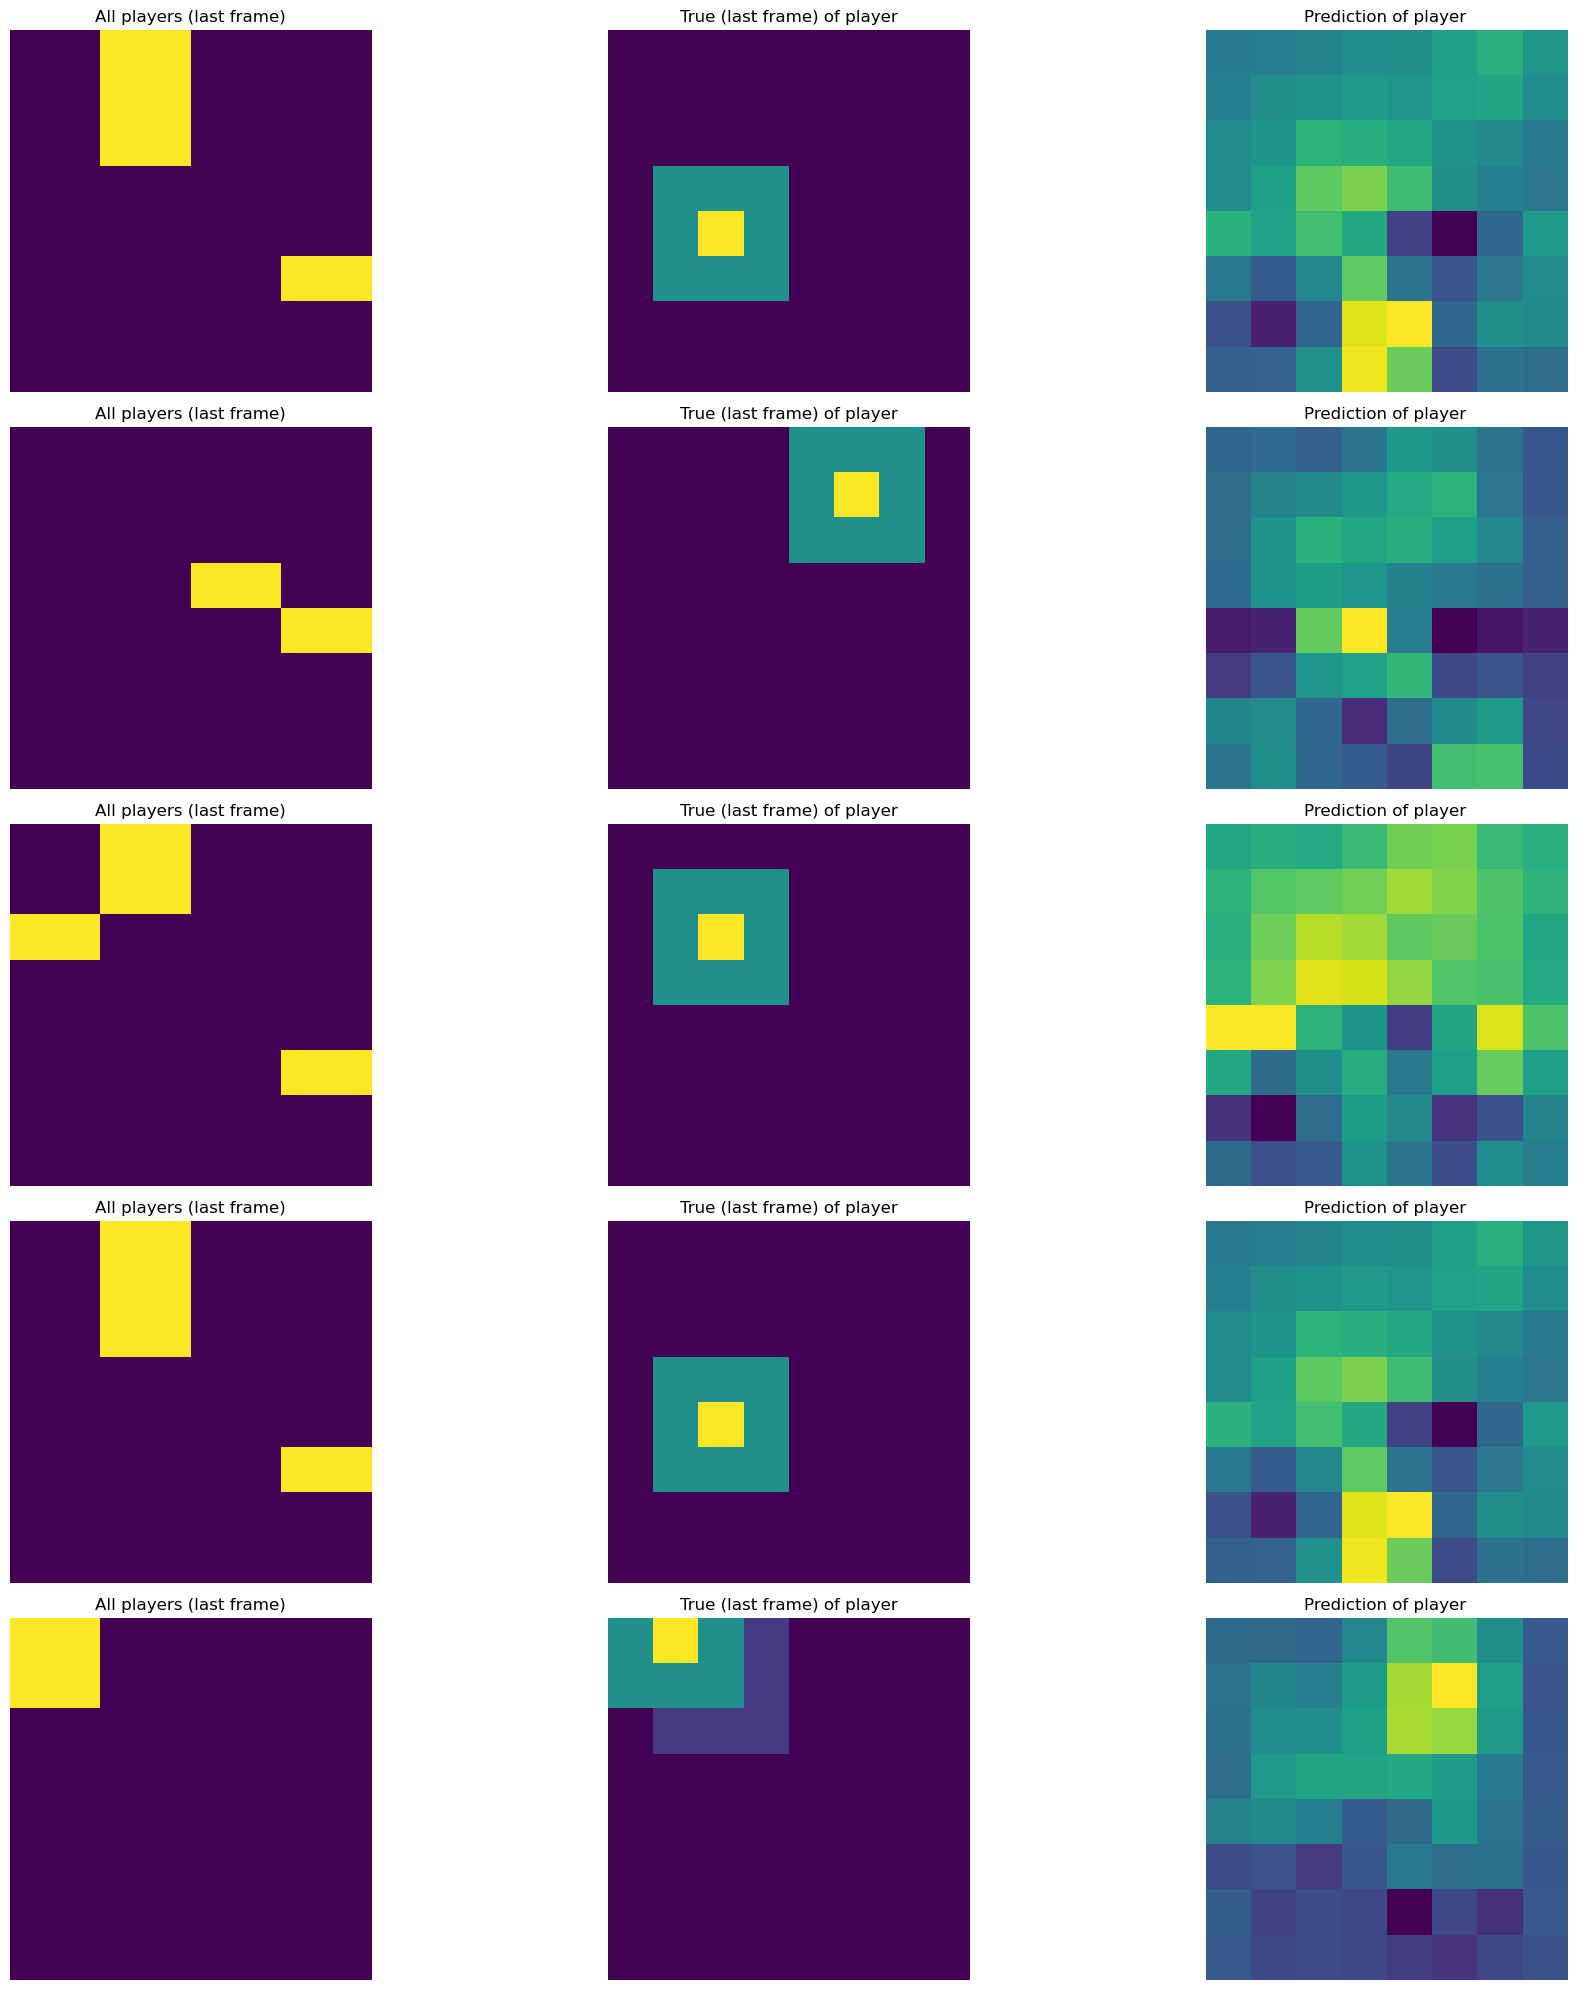

MODELO model1 - ESCENA Scene1
Epoch 1/50
71/71 [==============================] - 4s 26ms/step - loss: 0.0353 - mse: 0.0353 - mae: 0.1089 - val_loss: 0.0349 - val_mse: 0.0349 - val_mae: 0.1134
Epoch 2/50
71/71 [==============================] - 1s 18ms/step - loss: 0.0324 - mse: 0.0324 - mae: 0.1073 - val_loss: 0.0352 - val_mse: 0.0352 - val_mae: 0.1099
Epoch 3/50
71/71 [==============================] - 1s 17ms/step - loss: 0.0319 - mse: 0.0319 - mae: 0.1072 - val_loss: 0.0377 - val_mse: 0.0377 - val_mae: 0.1148
Epoch 4/50
71/71 [==============================] - 1s 17ms/step - loss: 0.0314 - mse: 0.0314 - mae: 0.1053 - val_loss: 0.0365 - val_mse: 0.0365 - val_mae: 0.1119
Epoch 5/50
71/71 [==============================] - 1s 18ms/step - loss: 0.0311 - mse: 0.0311 - mae: 0.1045 - val_loss: 0.0362 - val_mse: 0.0362 - val_mae: 0.1110
Epoch 6/50
71/71 [==============================] - 1s 18ms/step - loss: 0.0307 - mse: 0.0307 - mae: 0.1044 - val_loss: 0.0376 - val_mse: 0.0376 - val_mae:

10/10 [==============================] - 1s 8ms/step


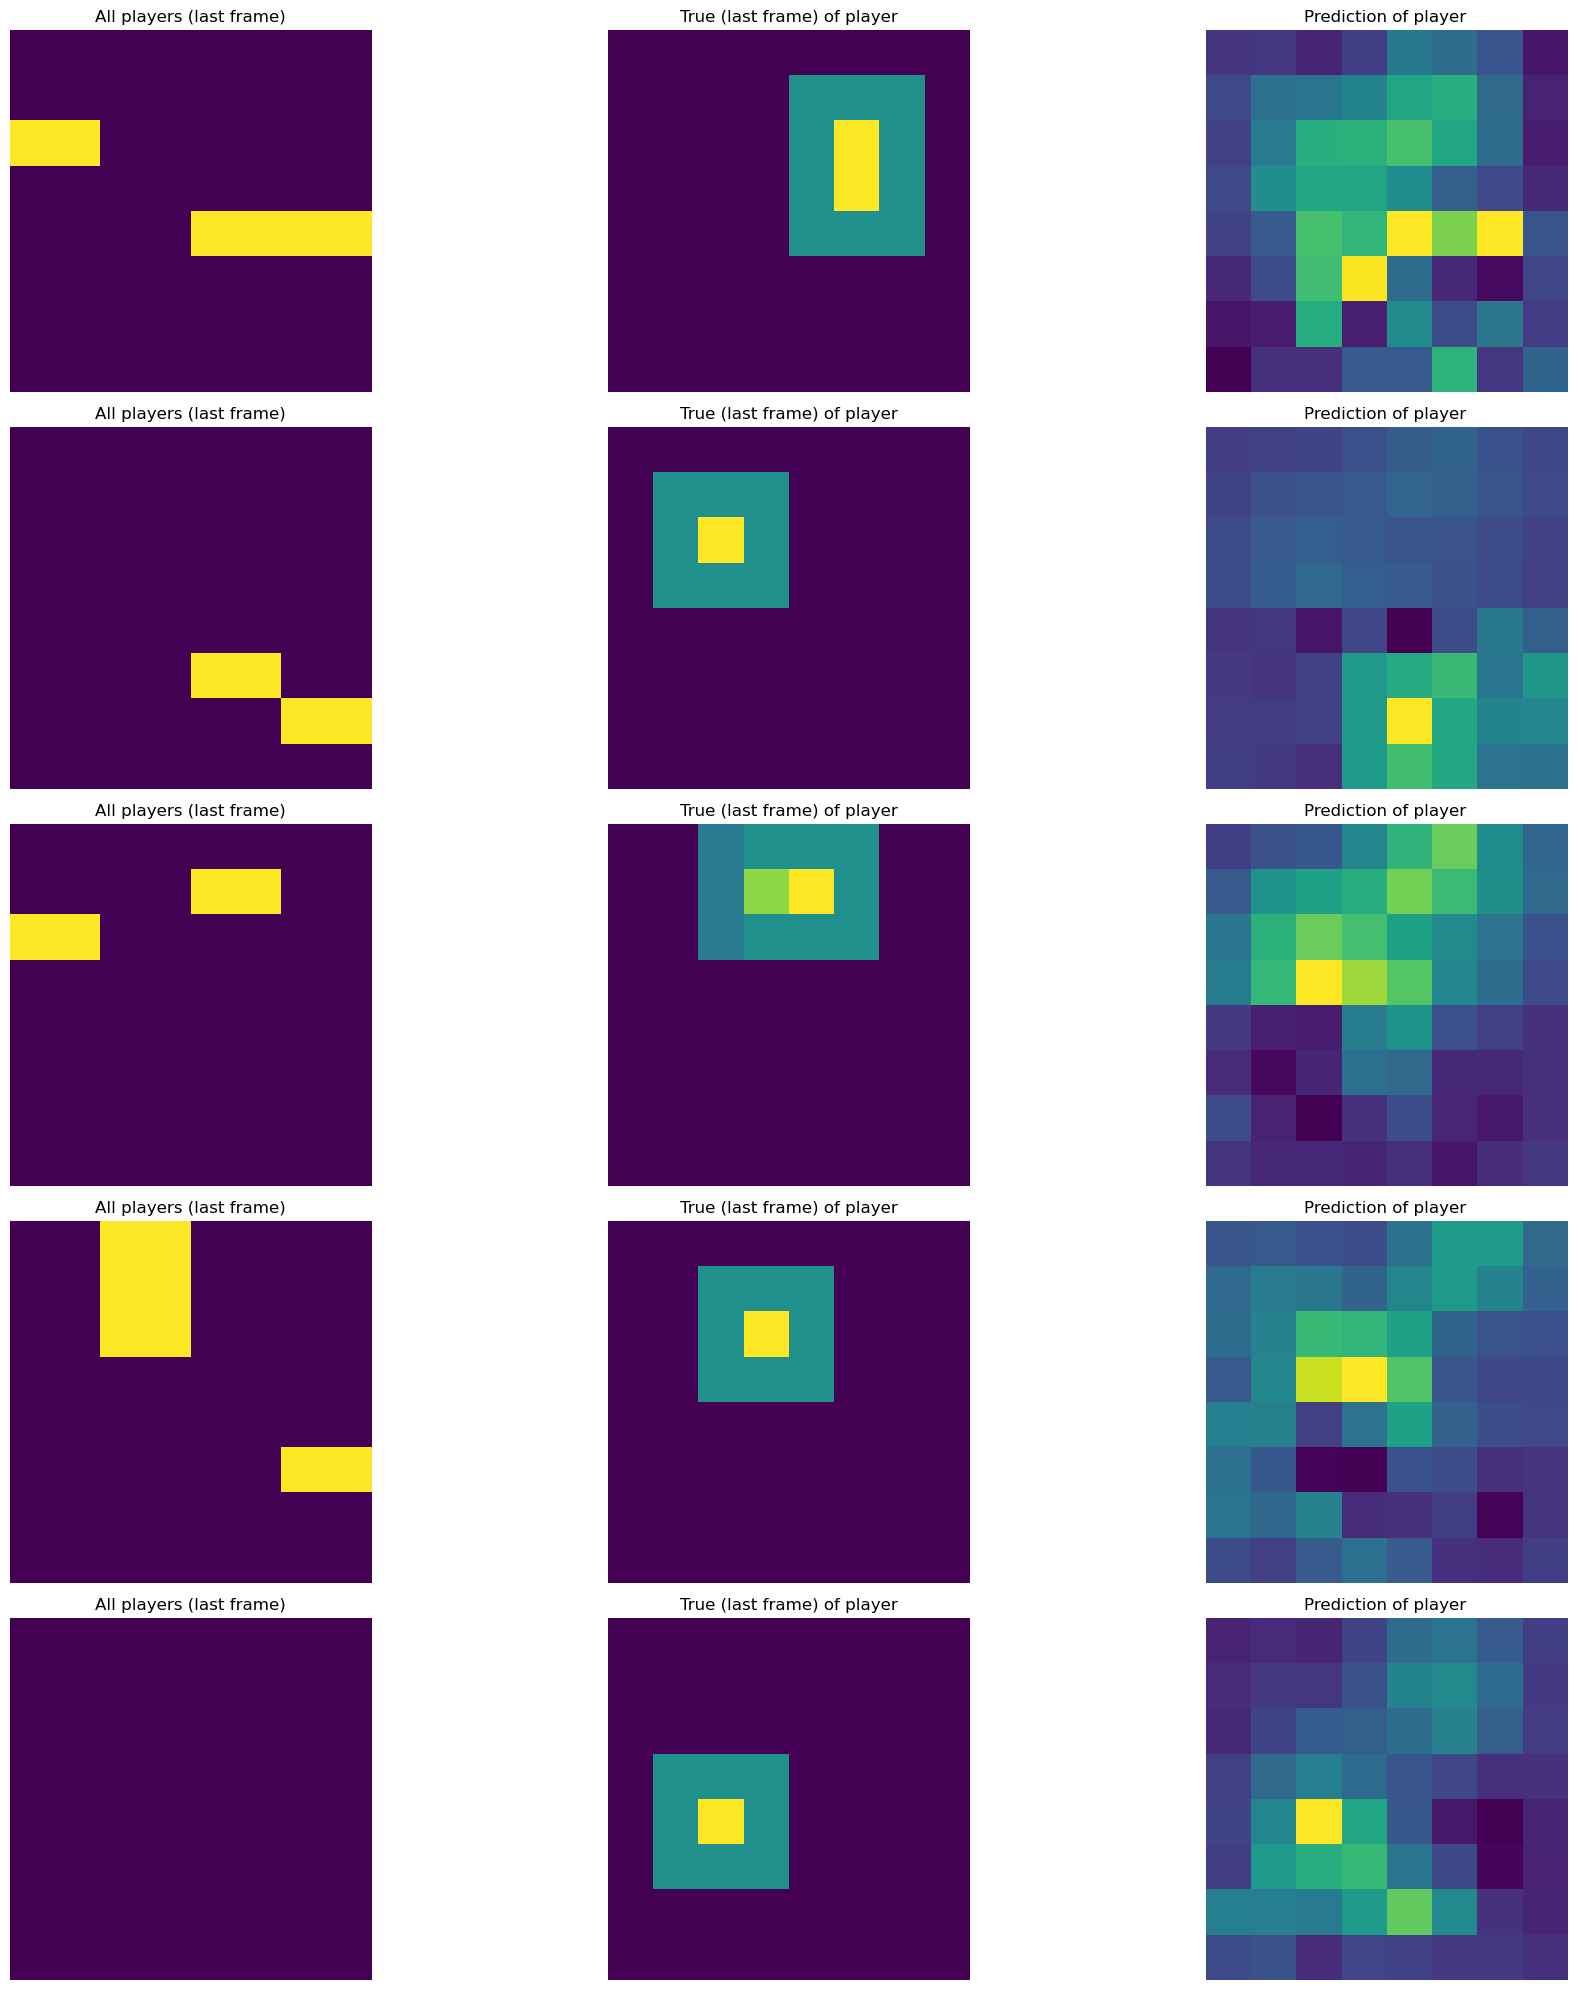

MODELO model2 - ESCENA Scene1
Epoch 1/50
71/71 [==============================] - 6s 57ms/step - loss: 0.0357 - mse: 0.0357 - mae: 0.1079 - val_loss: 0.0351 - val_mse: 0.0351 - val_mae: 0.1142
Epoch 2/50
71/71 [==============================] - 3s 44ms/step - loss: 0.0328 - mse: 0.0328 - mae: 0.1083 - val_loss: 0.0353 - val_mse: 0.0353 - val_mae: 0.1149
Epoch 3/50
71/71 [==============================] - 3s 43ms/step - loss: 0.0321 - mse: 0.0321 - mae: 0.1072 - val_loss: 0.0346 - val_mse: 0.0346 - val_mae: 0.1116
Epoch 4/50
71/71 [==============================] - 3s 43ms/step - loss: 0.0313 - mse: 0.0313 - mae: 0.1051 - val_loss: 0.0358 - val_mse: 0.0358 - val_mae: 0.1123
Epoch 5/50
71/71 [==============================] - 3s 43ms/step - loss: 0.0308 - mse: 0.0308 - mae: 0.1029 - val_loss: 0.0370 - val_mse: 0.0370 - val_mae: 0.1163
Epoch 6/50
71/71 [==============================] - 3s 43ms/step - loss: 0.0301 - mse: 0.0301 - mae: 0.1020 - val_loss: 0.0363 - val_mse: 0.0363 - val_mae:

10/10 [==============================] - 1s 14ms/step


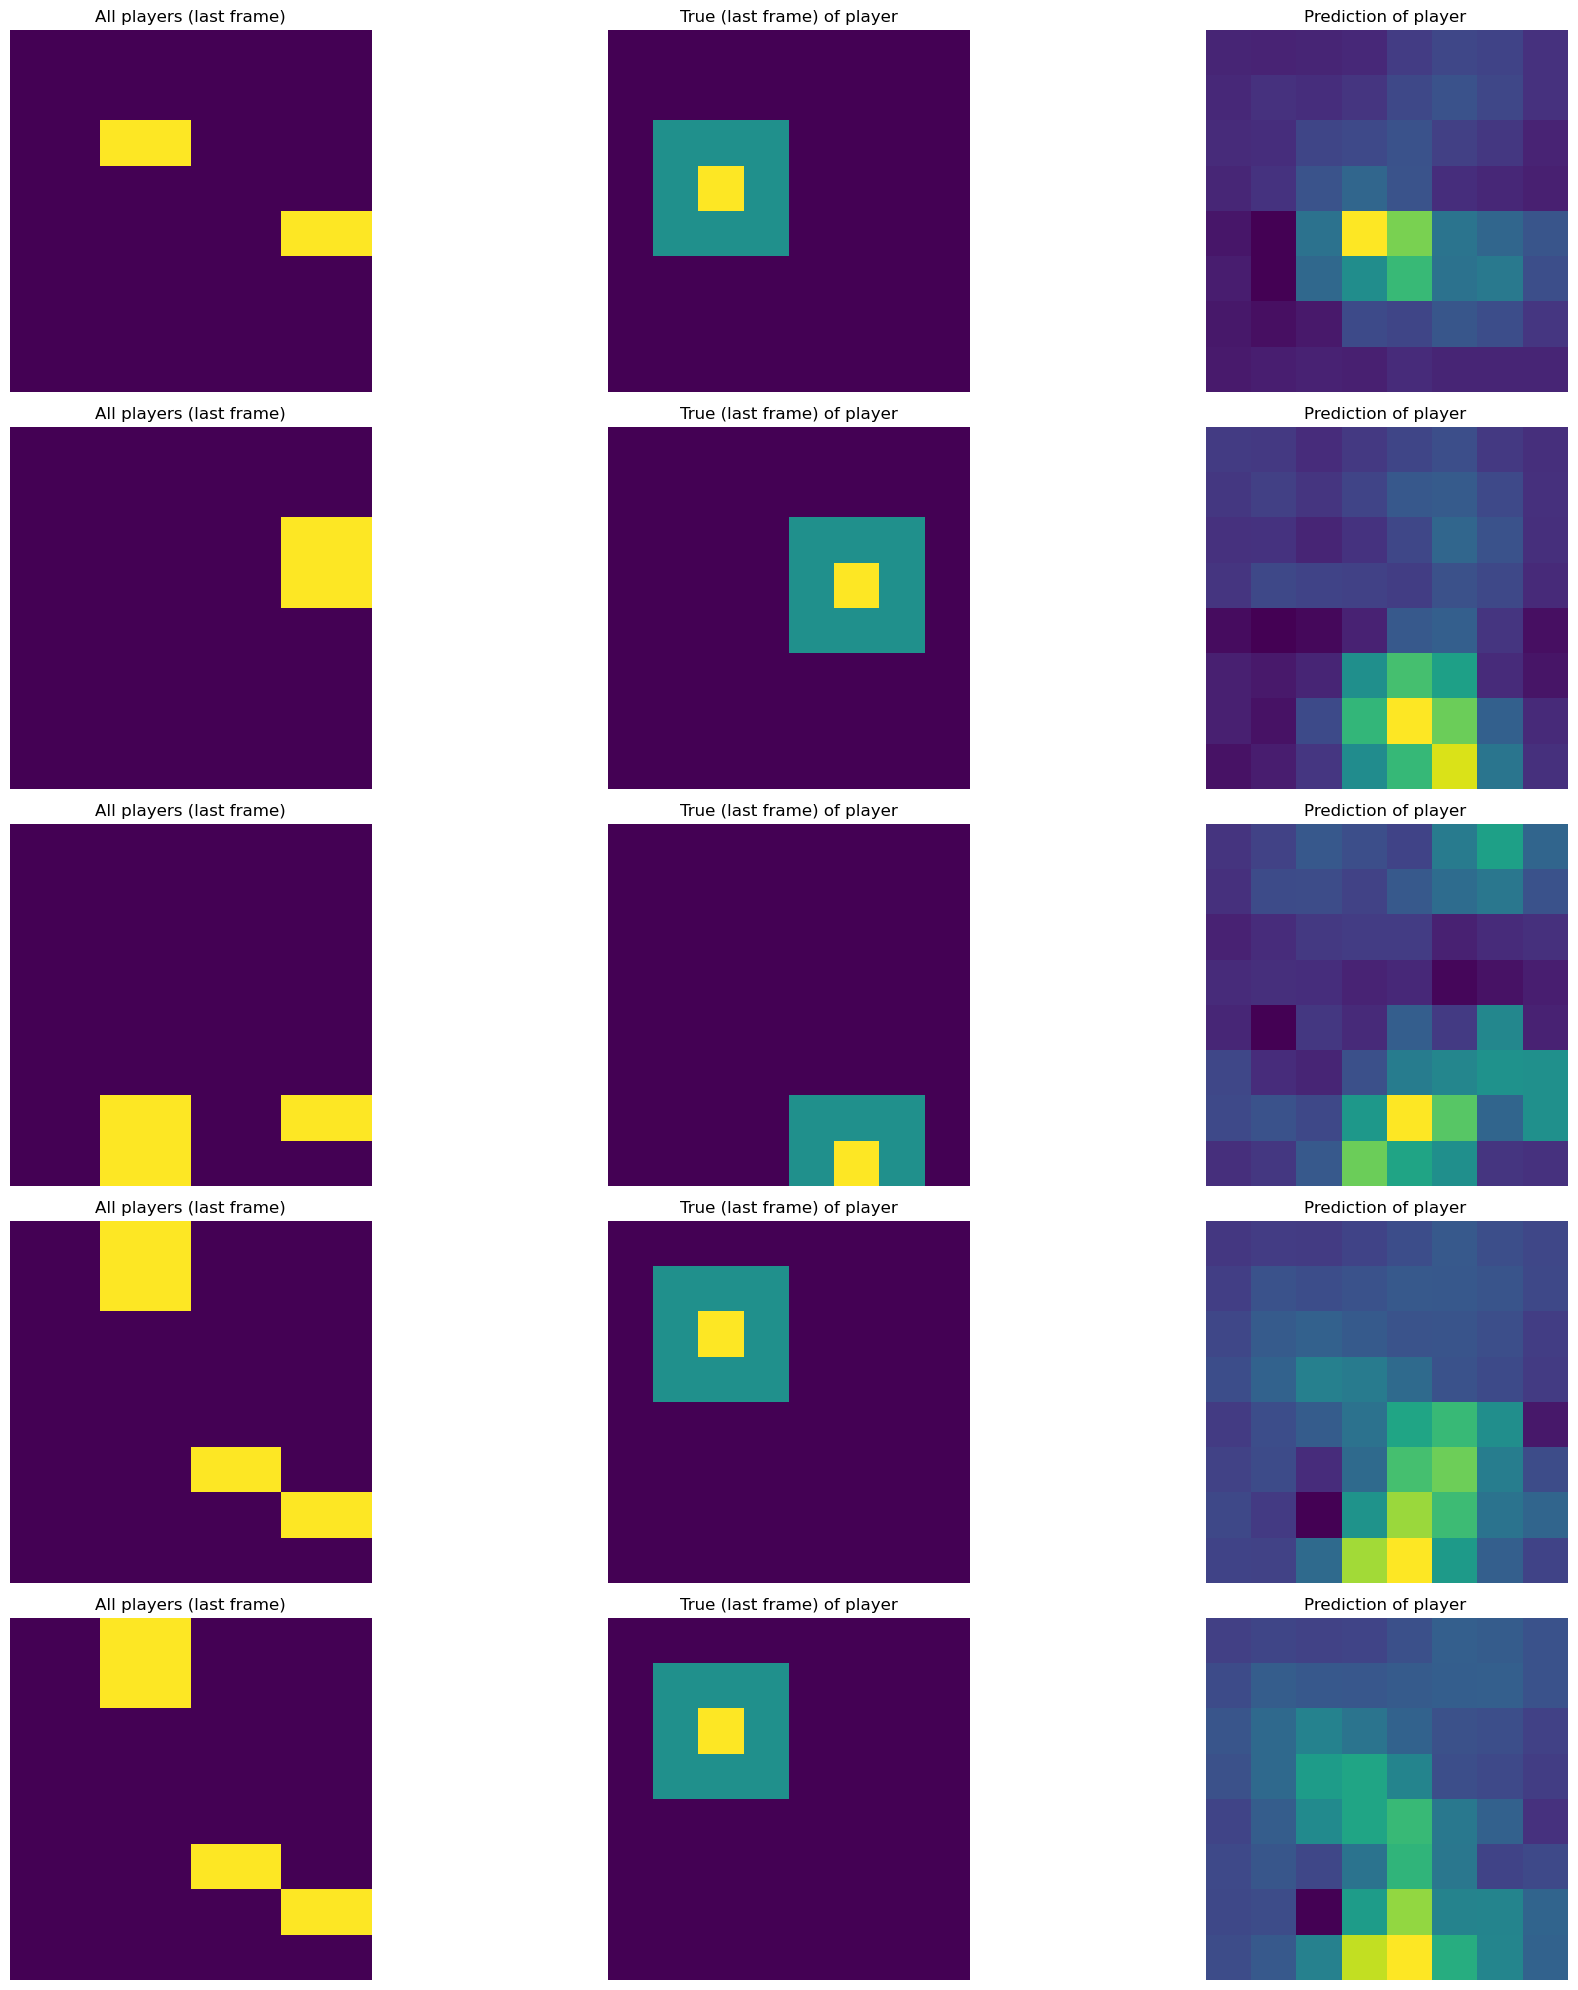

MODELO transf1 - ESCENA Scene1
Epoch 1/50
71/71 [==============================] - 43s 587ms/step - loss: 0.0393 - mse: 0.0393 - mae: 0.1223 - val_loss: 0.0361 - val_mse: 0.0361 - val_mae: 0.1211
Epoch 2/50
71/71 [==============================] - 35s 490ms/step - loss: 0.0335 - mse: 0.0335 - mae: 0.1114 - val_loss: 0.0354 - val_mse: 0.0354 - val_mae: 0.1118
Epoch 3/50
71/71 [==============================] - 36s 502ms/step - loss: 0.0321 - mse: 0.0321 - mae: 0.1077 - val_loss: 0.0364 - val_mse: 0.0364 - val_mae: 0.1153
Epoch 4/50
71/71 [==============================] - 35s 500ms/step - loss: 0.0313 - mse: 0.0313 - mae: 0.1052 - val_loss: 0.0361 - val_mse: 0.0361 - val_mae: 0.1177
Epoch 5/50
71/71 [==============================] - 35s 497ms/step - loss: 0.0308 - mse: 0.0308 - mae: 0.1046 - val_loss: 0.0368 - val_mse: 0.0368 - val_mae: 0.1169
Epoch 6/50
71/71 [==============================] - 35s 487ms/step - loss: 0.0300 - mse: 0.0300 - mae: 0.1020 - val_loss: 0.0377 - val_mse: 0.03

10/10 [==============================] - 4s 350ms/step


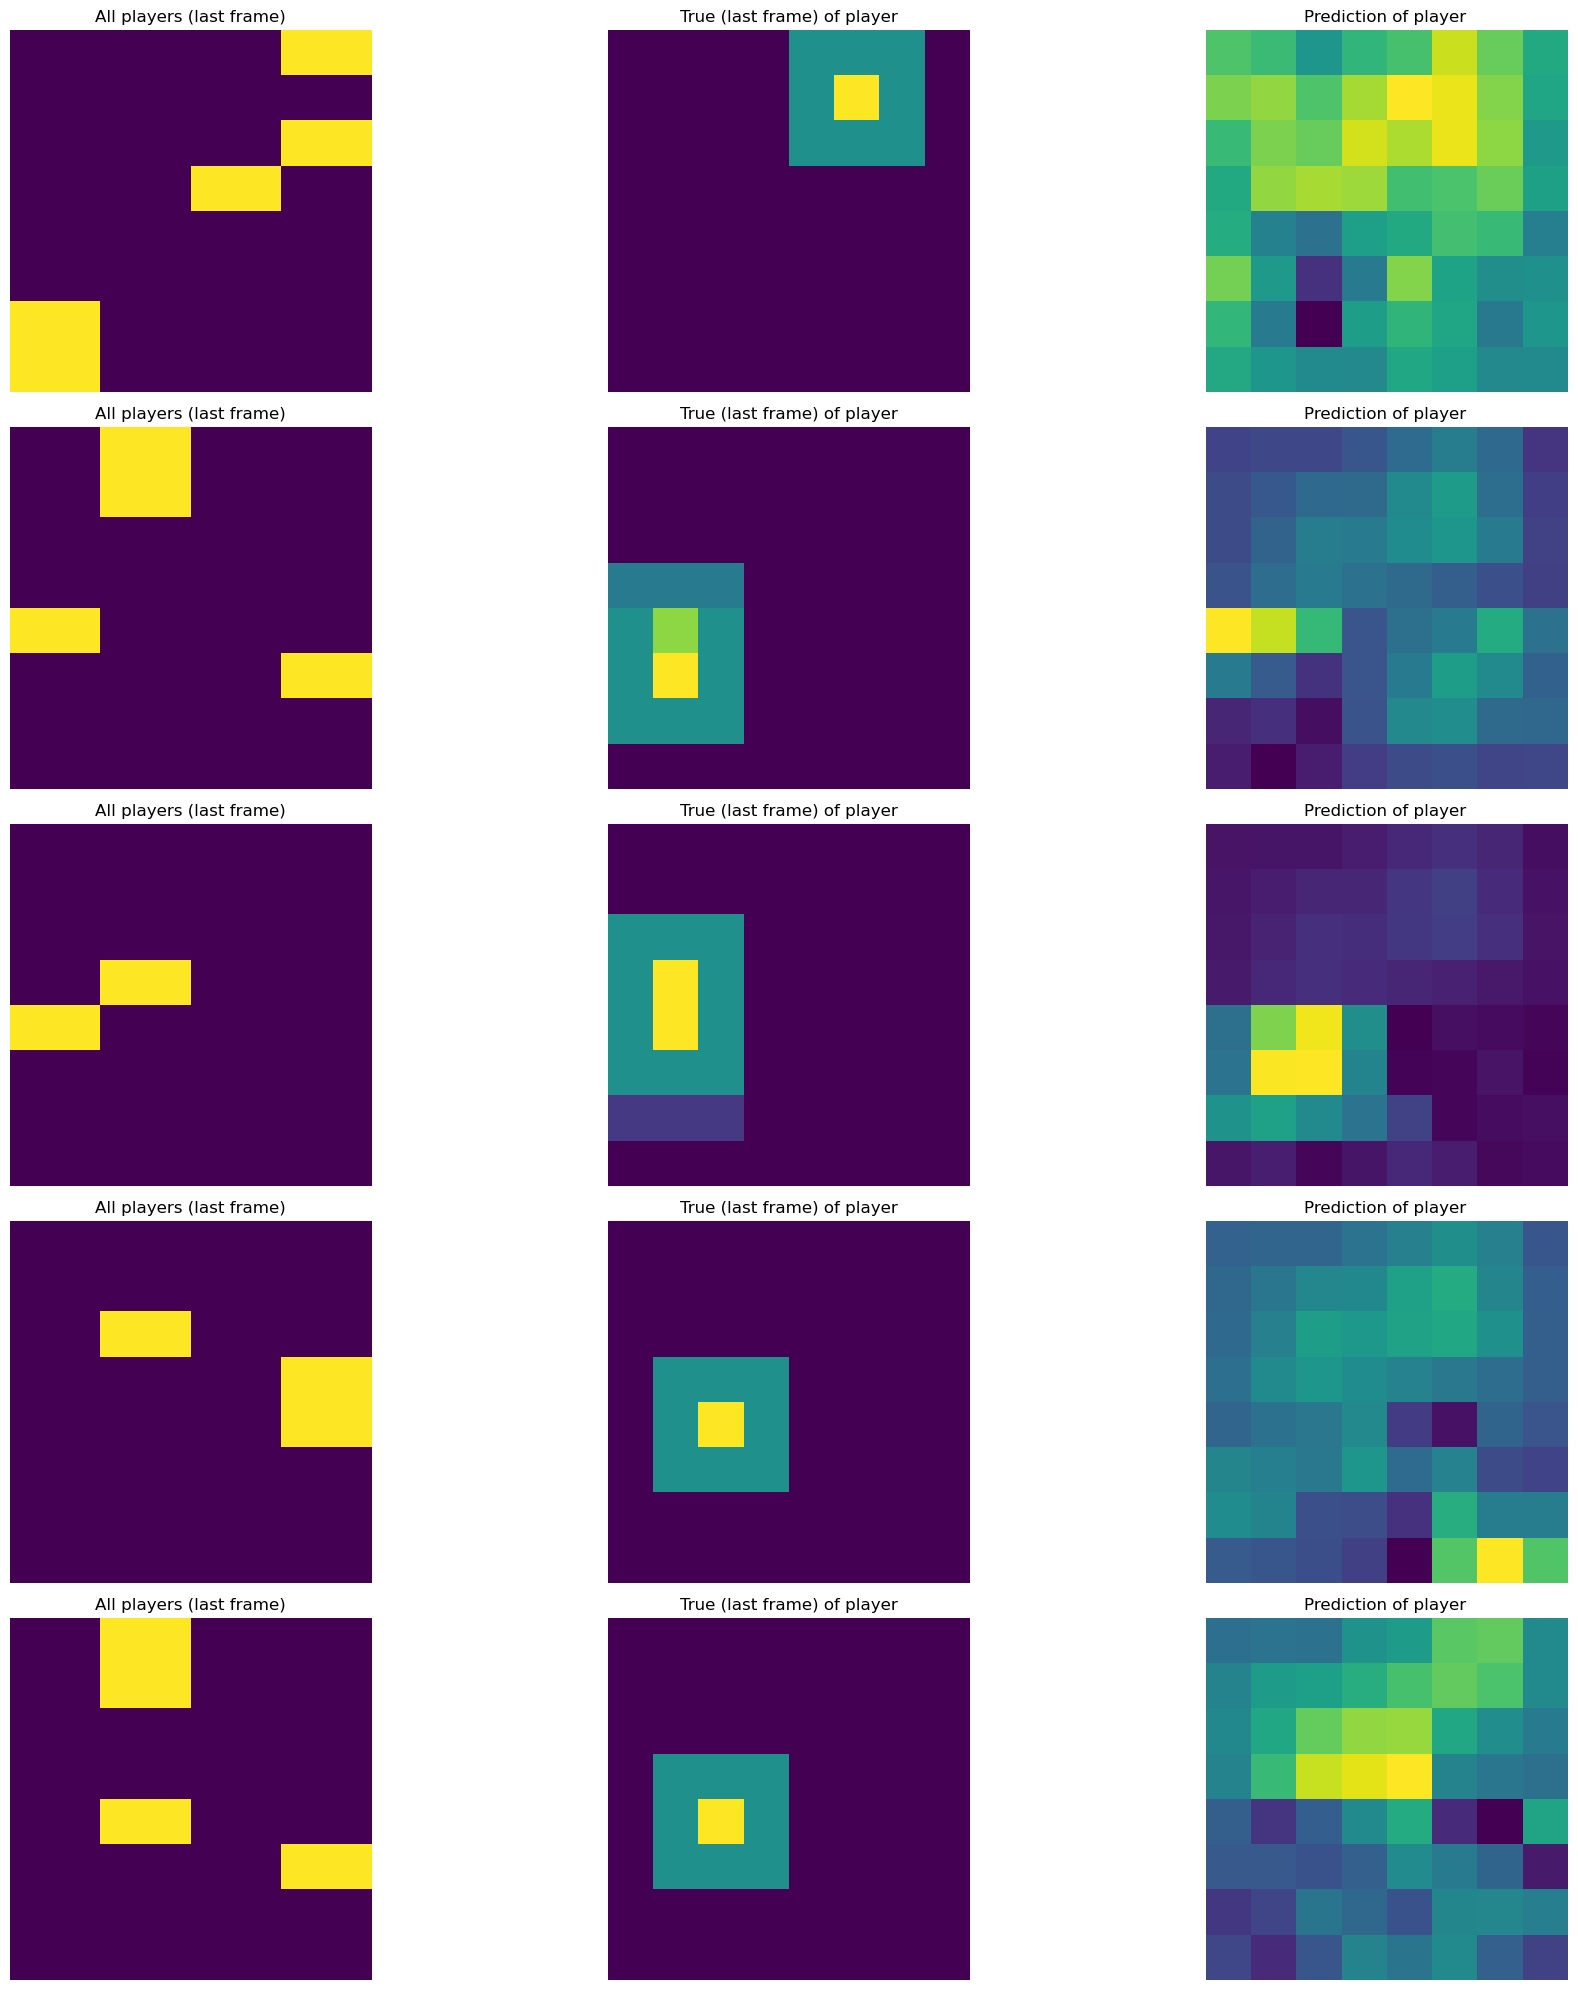

MODELO model0 - ESCENA Scene2
Epoch 1/50
67/67 [==============================] - 17s 163ms/step - loss: 0.0371 - mse: 0.0371 - mae: 0.1130 - val_loss: 0.0360 - val_mse: 0.0360 - val_mae: 0.1157
Epoch 2/50
67/67 [==============================] - 10s 149ms/step - loss: 0.0343 - mse: 0.0343 - mae: 0.1143 - val_loss: 0.0351 - val_mse: 0.0351 - val_mae: 0.1106
Epoch 3/50
67/67 [==============================] - 10s 149ms/step - loss: 0.0333 - mse: 0.0333 - mae: 0.1116 - val_loss: 0.0355 - val_mse: 0.0355 - val_mae: 0.1079
Epoch 4/50
67/67 [==============================] - 10s 149ms/step - loss: 0.0327 - mse: 0.0327 - mae: 0.1098 - val_loss: 0.0354 - val_mse: 0.0354 - val_mae: 0.1101
Epoch 5/50
67/67 [==============================] - 10s 148ms/step - loss: 0.0323 - mse: 0.0323 - mae: 0.1084 - val_loss: 0.0354 - val_mse: 0.0354 - val_mae: 0.1099
Epoch 6/50
67/67 [==============================] - 10s 146ms/step - loss: 0.0318 - mse: 0.0318 - mae: 0.1073 - val_loss: 0.0354 - val_mse: 0.035

12/12 [==============================] - 1s 65ms/step


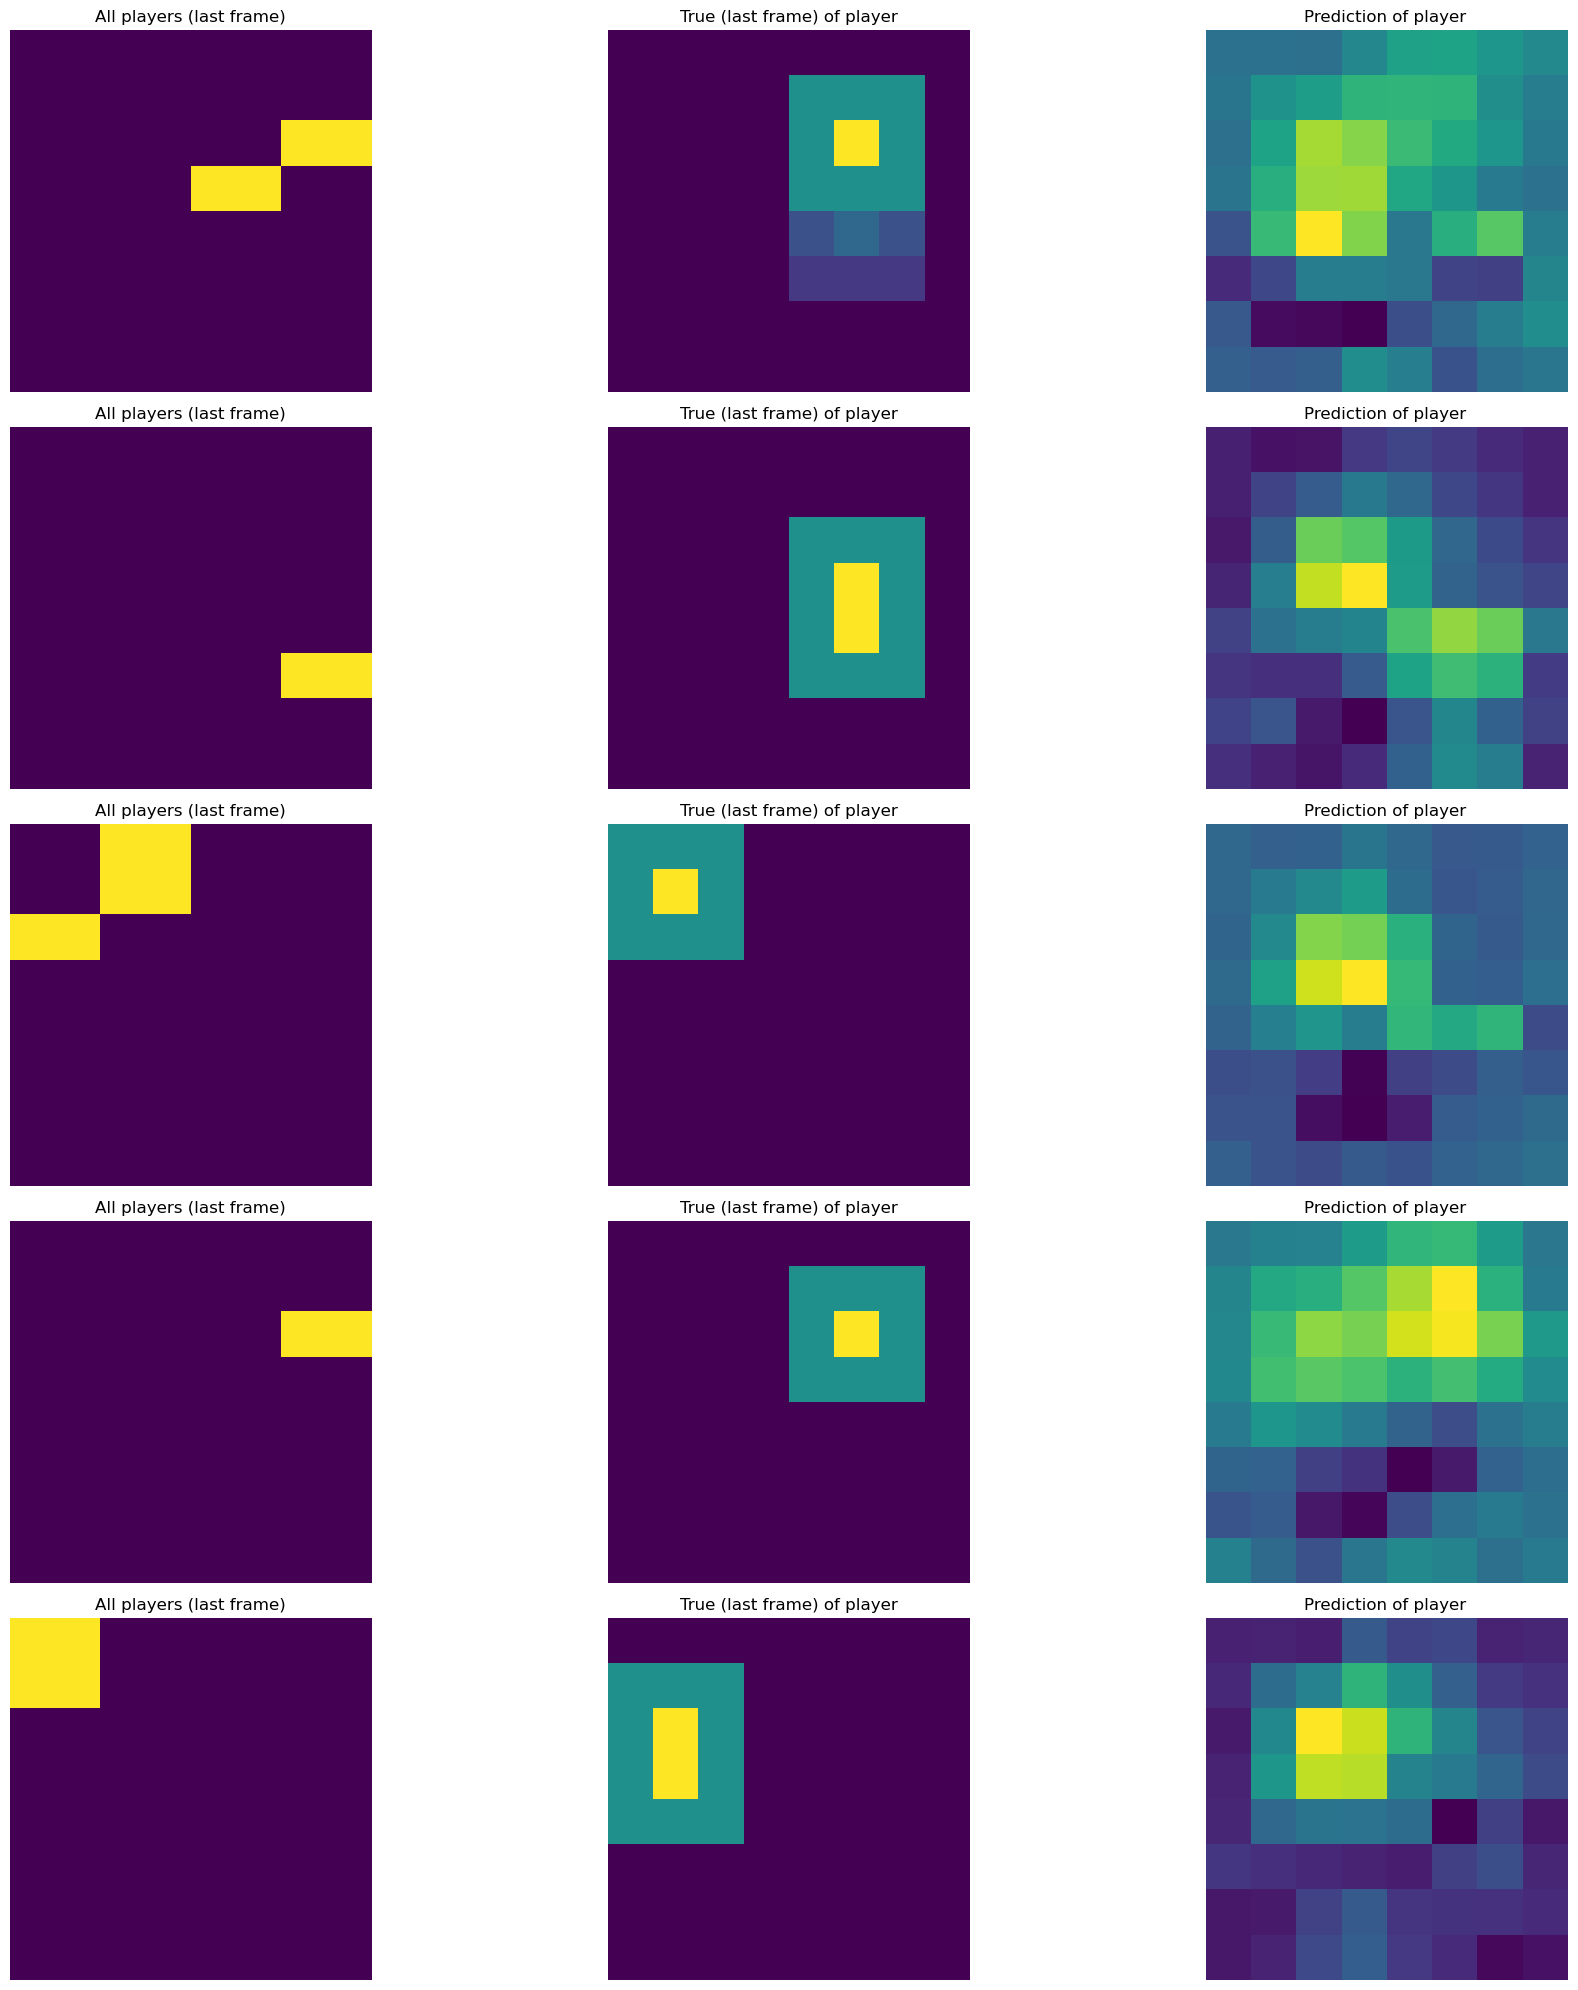

MODELO model1 - ESCENA Scene2
Epoch 1/50
67/67 [==============================] - 8s 87ms/step - loss: 0.0352 - mse: 0.0352 - mae: 0.1086 - val_loss: 0.0357 - val_mse: 0.0357 - val_mae: 0.1172
Epoch 2/50
67/67 [==============================] - 5s 72ms/step - loss: 0.0323 - mse: 0.0323 - mae: 0.1076 - val_loss: 0.0362 - val_mse: 0.0362 - val_mae: 0.1166
Epoch 3/50
67/67 [==============================] - 5s 72ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1064 - val_loss: 0.0357 - val_mse: 0.0357 - val_mae: 0.1103
Epoch 4/50
67/67 [==============================] - 5s 73ms/step - loss: 0.0312 - mse: 0.0312 - mae: 0.1058 - val_loss: 0.0364 - val_mse: 0.0364 - val_mae: 0.1138
Epoch 5/50
67/67 [==============================] - 5s 72ms/step - loss: 0.0309 - mse: 0.0309 - mae: 0.1047 - val_loss: 0.0365 - val_mse: 0.0365 - val_mae: 0.1130
Epoch 6/50
67/67 [==============================] - 5s 73ms/step - loss: 0.0303 - mse: 0.0303 - mae: 0.1039 - val_loss: 0.0369 - val_mse: 0.0369 - val_mae:

12/12 [==============================] - 1s 18ms/step


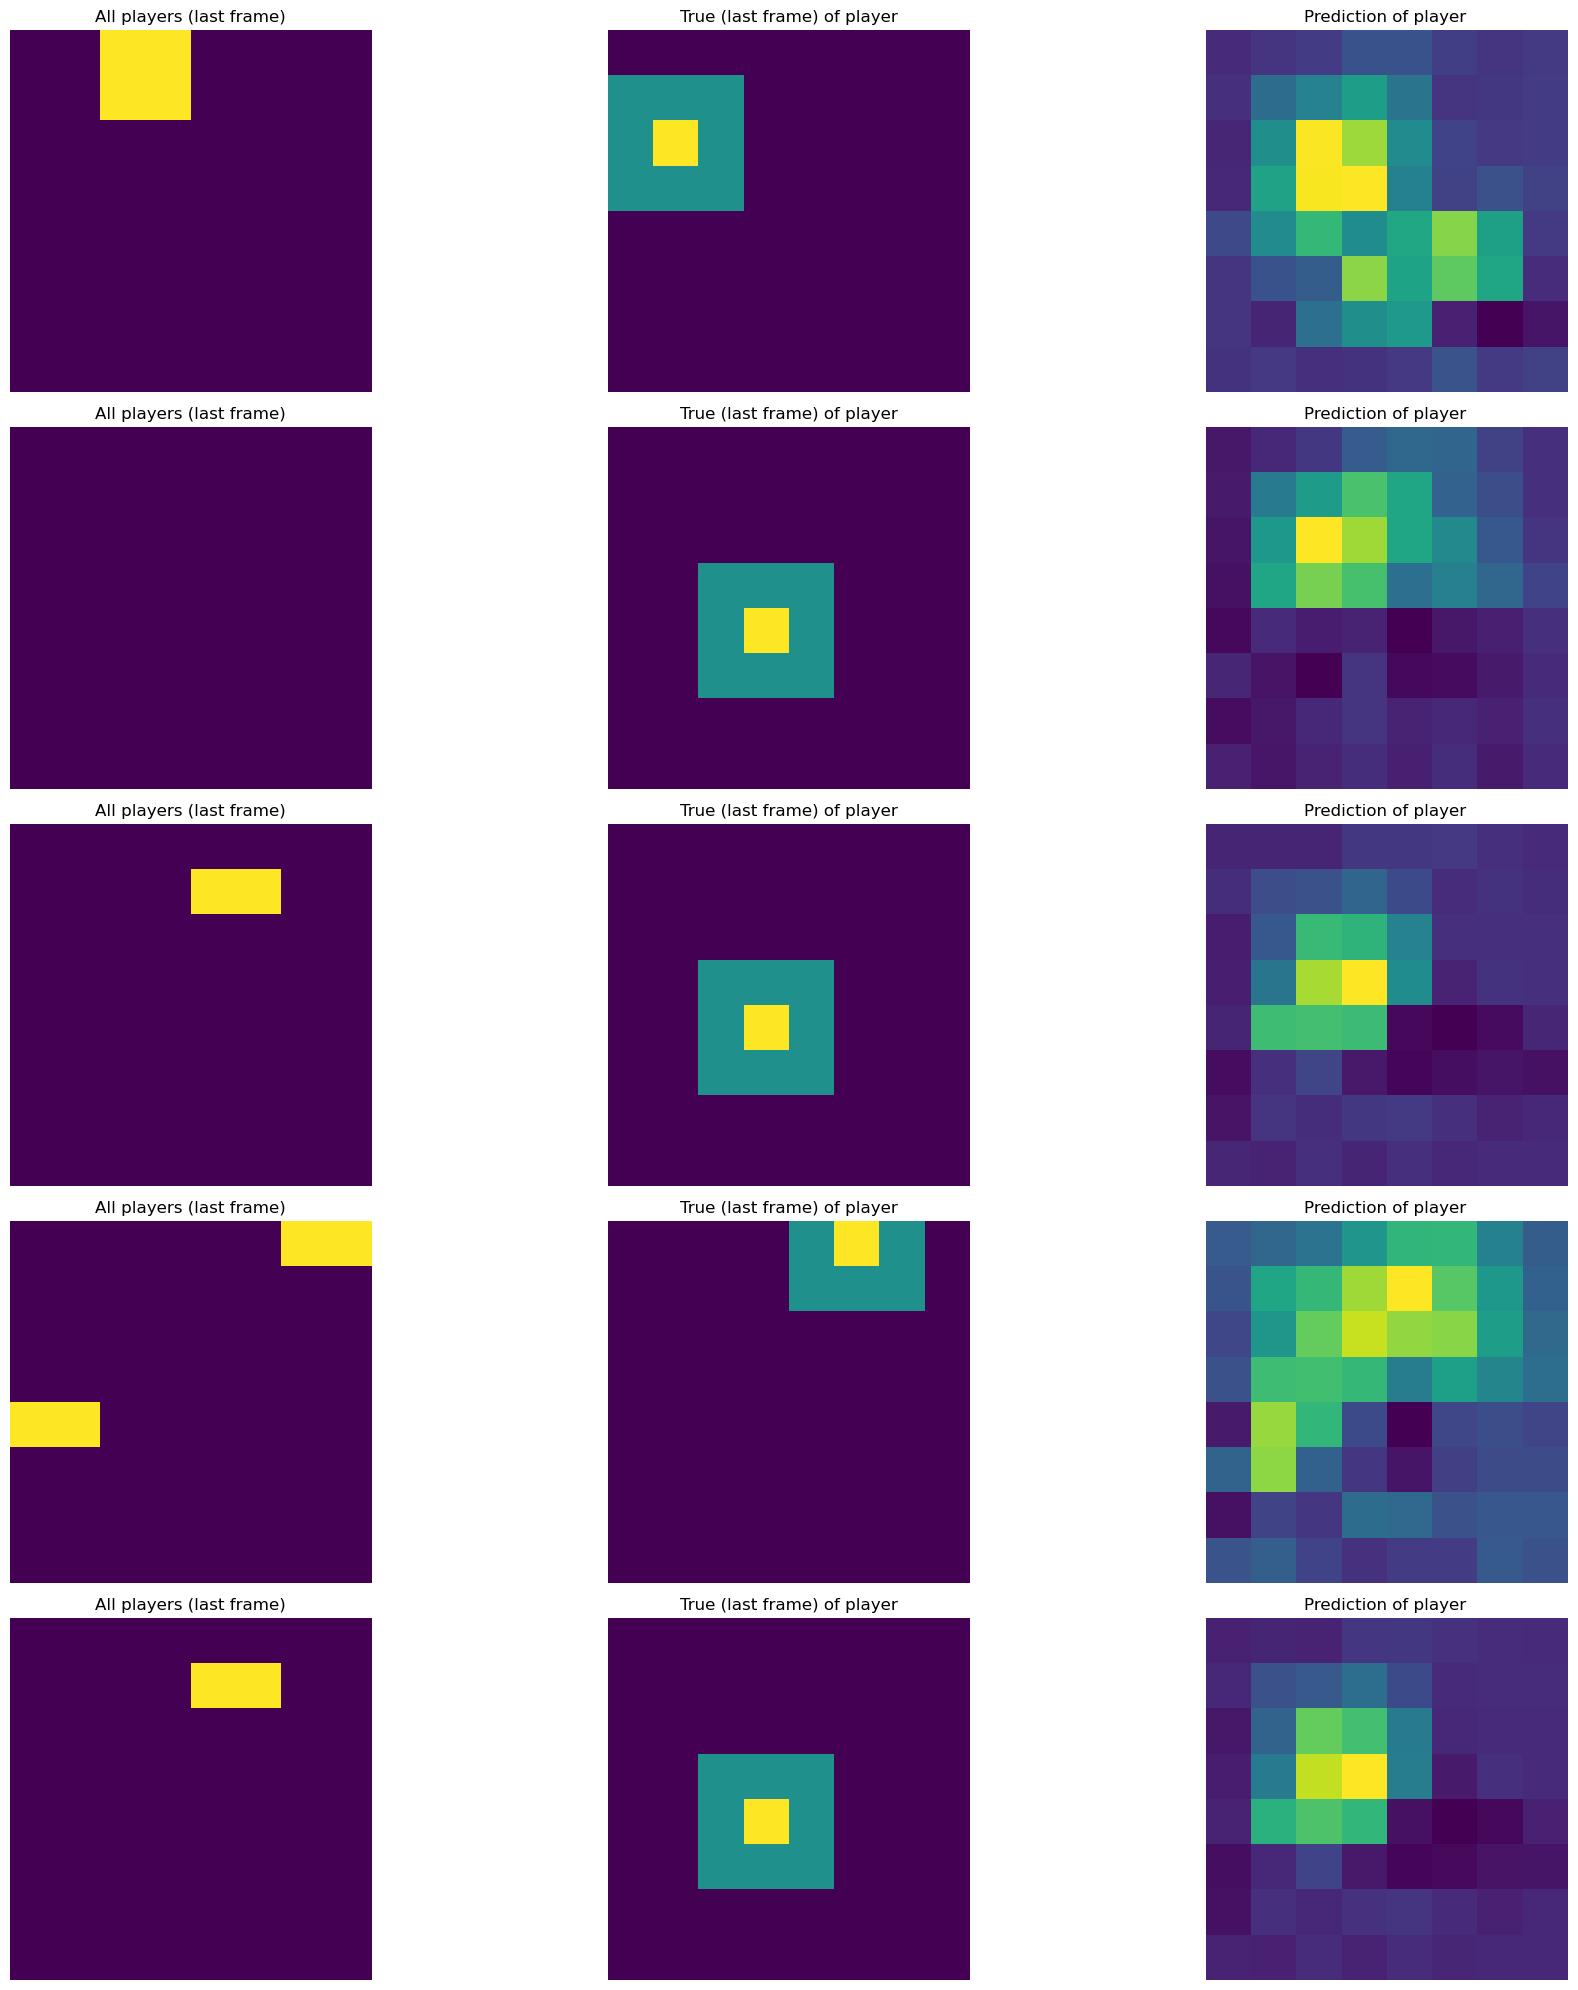

MODELO model2 - ESCENA Scene2
Epoch 1/50
67/67 [==============================] - 13s 159ms/step - loss: 0.0354 - mse: 0.0354 - mae: 0.1075 - val_loss: 0.0350 - val_mse: 0.0350 - val_mae: 0.1110
Epoch 2/50
67/67 [==============================] - 9s 138ms/step - loss: 0.0325 - mse: 0.0325 - mae: 0.1079 - val_loss: 0.0359 - val_mse: 0.0359 - val_mae: 0.1112
Epoch 3/50
67/67 [==============================] - 9s 138ms/step - loss: 0.0314 - mse: 0.0314 - mae: 0.1055 - val_loss: 0.0365 - val_mse: 0.0365 - val_mae: 0.1094
Epoch 4/50
67/67 [==============================] - 9s 138ms/step - loss: 0.0306 - mse: 0.0306 - mae: 0.1038 - val_loss: 0.0363 - val_mse: 0.0363 - val_mae: 0.1113
Epoch 5/50
67/67 [==============================] - 10s 150ms/step - loss: 0.0299 - mse: 0.0299 - mae: 0.1018 - val_loss: 0.0386 - val_mse: 0.0386 - val_mae: 0.1180
Epoch 6/50
67/67 [==============================] - 10s 147ms/step - loss: 0.0292 - mse: 0.0292 - mae: 0.0996 - val_loss: 0.0381 - val_mse: 0.0381 -

12/12 [==============================] - 1s 61ms/step


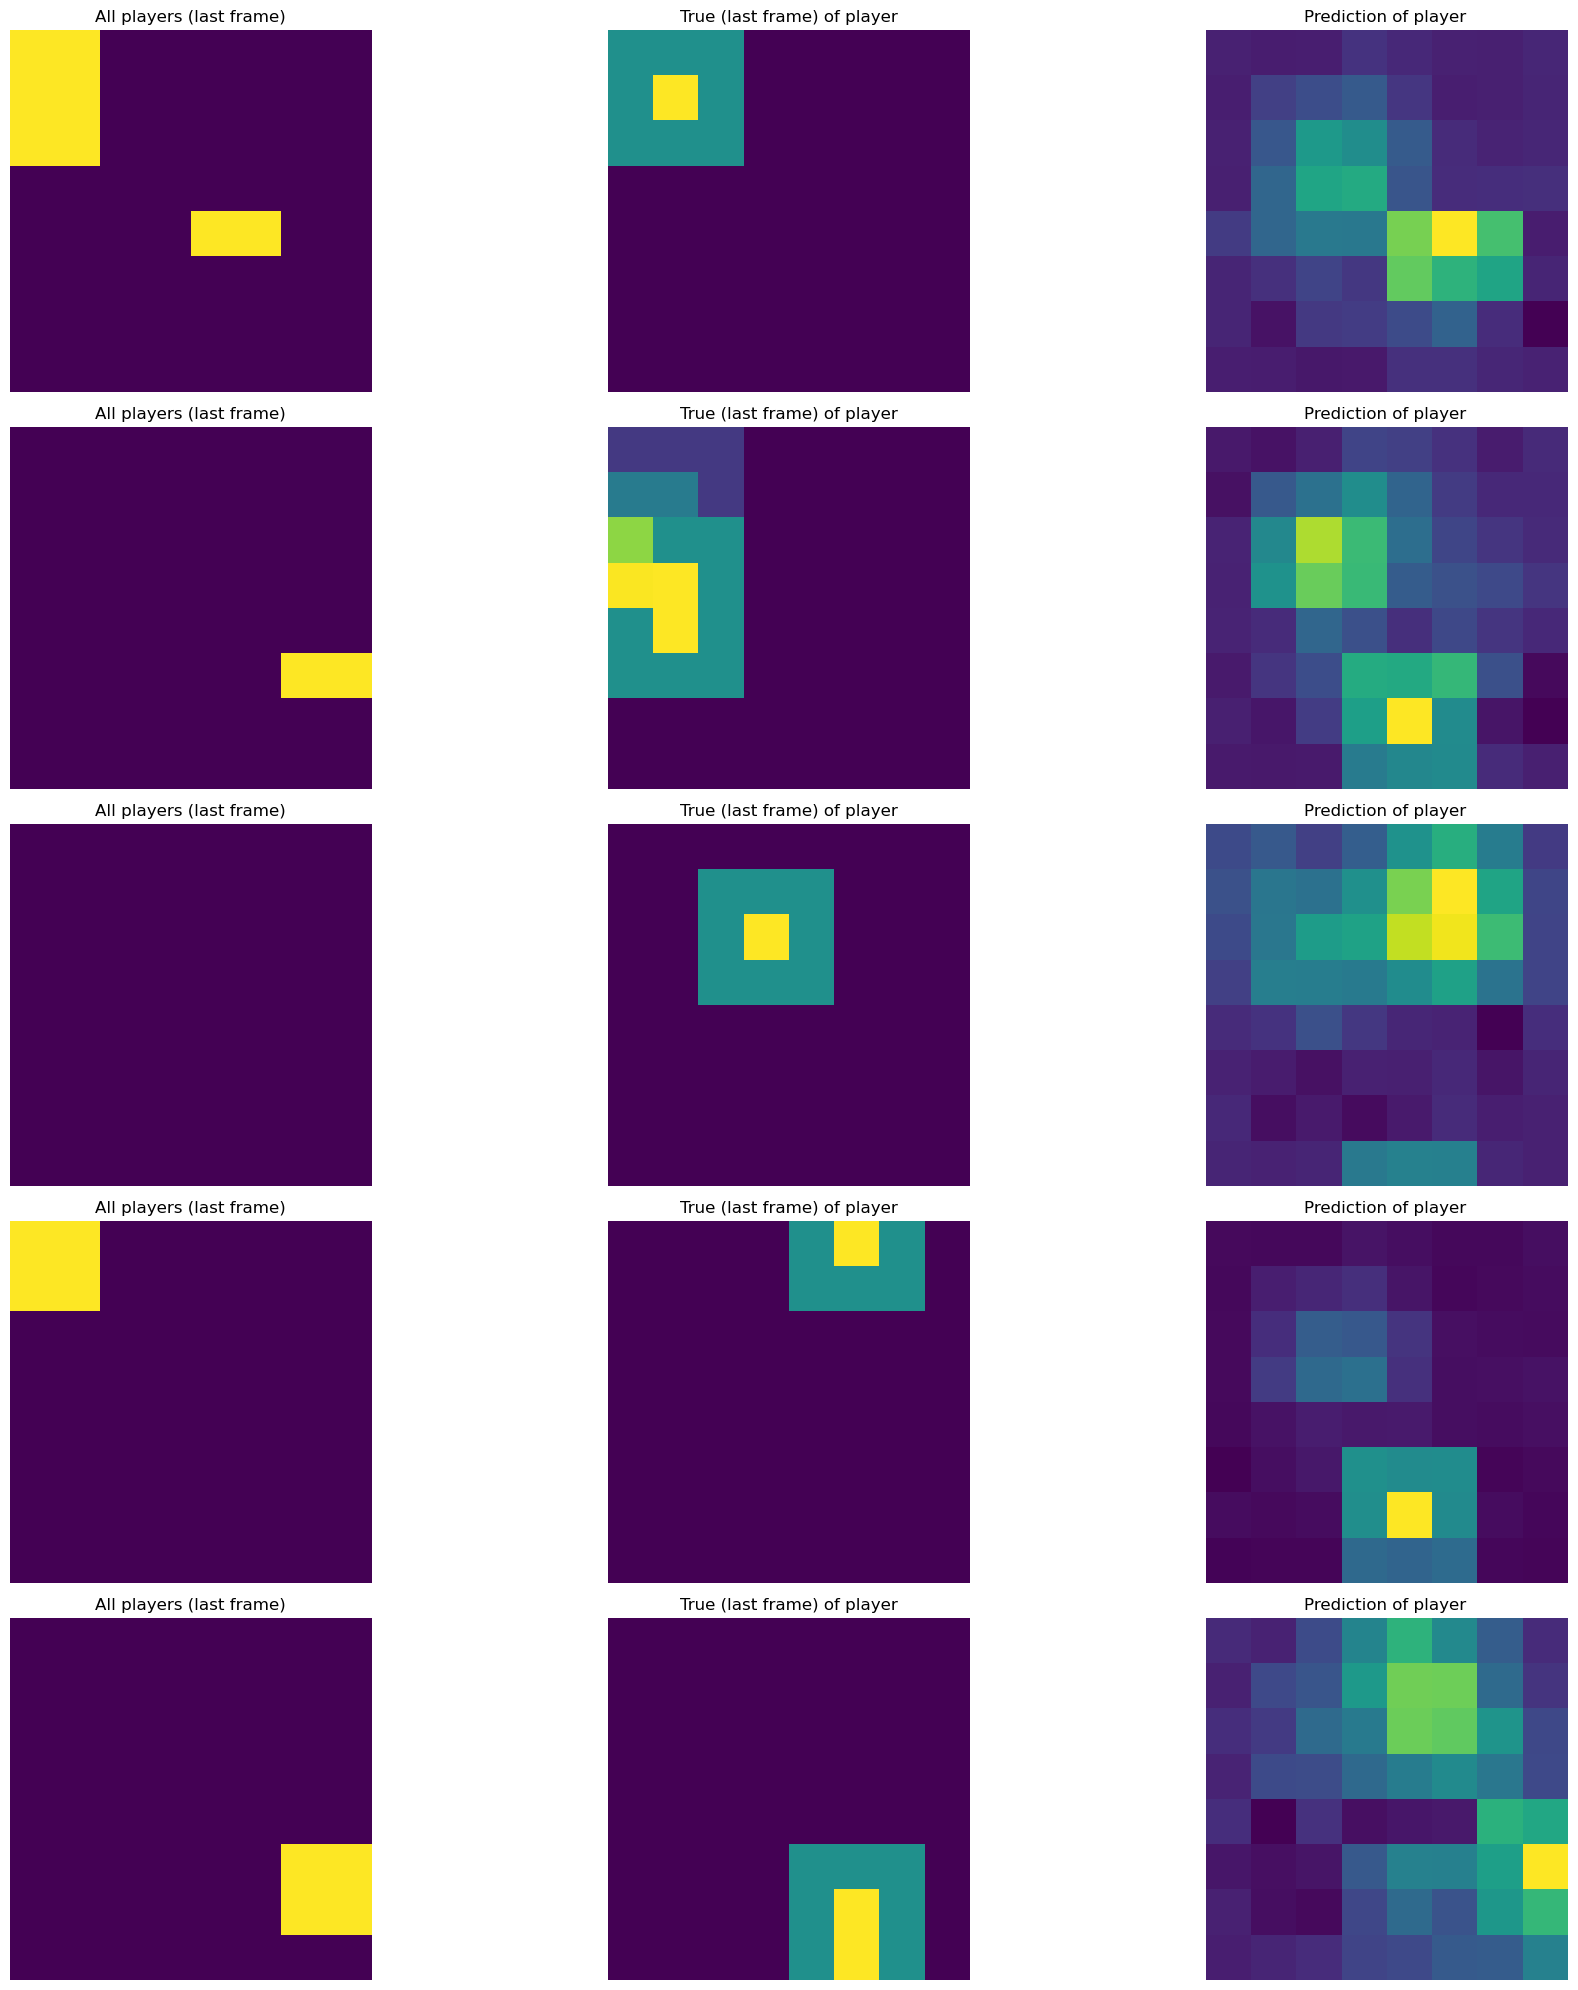

MODELO transf1 - ESCENA Scene2
Epoch 1/50
67/67 [==============================] - 93s 1s/step - loss: 0.0396 - mse: 0.0396 - mae: 0.1221 - val_loss: 0.0367 - val_mse: 0.0367 - val_mae: 0.1161
Epoch 2/50
67/67 [==============================] - 89s 1s/step - loss: 0.0338 - mse: 0.0338 - mae: 0.1127 - val_loss: 0.0360 - val_mse: 0.0360 - val_mae: 0.1173
Epoch 3/50
67/67 [==============================] - 90s 1s/step - loss: 0.0321 - mse: 0.0321 - mae: 0.1075 - val_loss: 0.0358 - val_mse: 0.0358 - val_mae: 0.1150
Epoch 4/50
67/67 [==============================] - 90s 1s/step - loss: 0.0312 - mse: 0.0312 - mae: 0.1066 - val_loss: 0.0368 - val_mse: 0.0368 - val_mae: 0.1082
Epoch 5/50
67/67 [==============================] - 90s 1s/step - loss: 0.0304 - mse: 0.0304 - mae: 0.1044 - val_loss: 0.0367 - val_mse: 0.0367 - val_mae: 0.1161
Epoch 6/50
67/67 [==============================] - 91s 1s/step - loss: 0.0296 - mse: 0.0296 - mae: 0.1030 - val_loss: 0.0373 - val_mse: 0.0373 - val_mae: 0.11

12/12 [==============================] - 10s 854ms/step


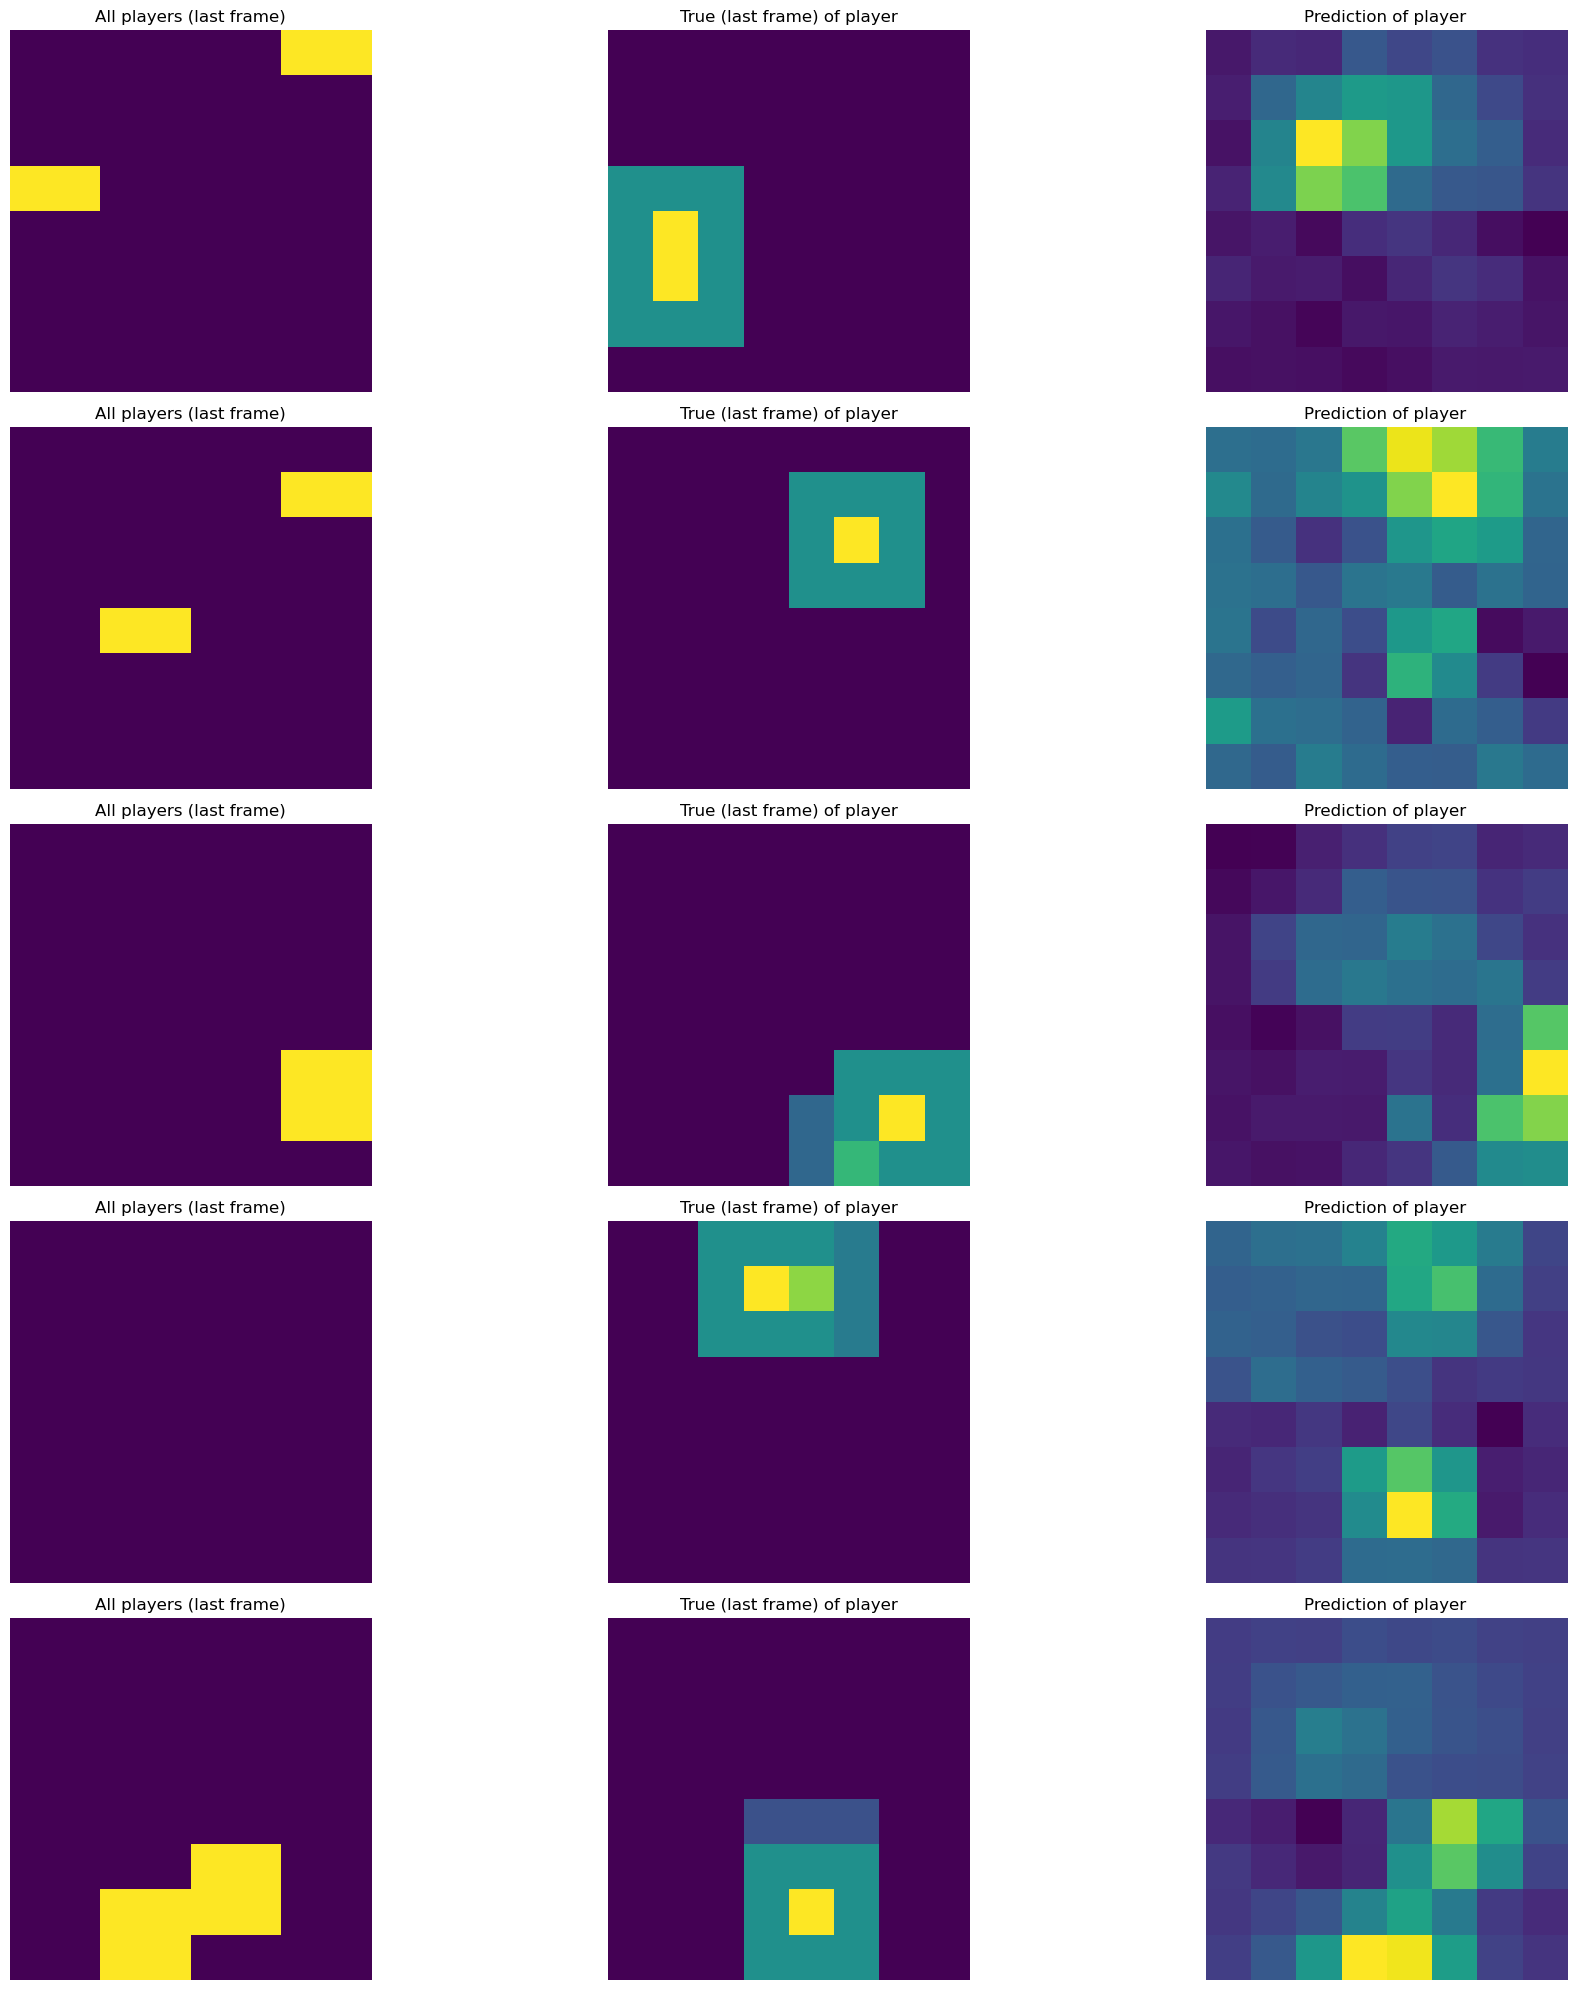

MODELO model0 - ESCENA Scene3
Epoch 1/50
67/67 [==============================] - 19s 190ms/step - loss: 0.0373 - mse: 0.0373 - mae: 0.1128 - val_loss: 0.0368 - val_mse: 0.0368 - val_mae: 0.1142
Epoch 2/50
67/67 [==============================] - 12s 178ms/step - loss: 0.0340 - mse: 0.0340 - mae: 0.1135 - val_loss: 0.0358 - val_mse: 0.0358 - val_mae: 0.1163
Epoch 3/50
67/67 [==============================] - 12s 178ms/step - loss: 0.0329 - mse: 0.0329 - mae: 0.1107 - val_loss: 0.0358 - val_mse: 0.0358 - val_mae: 0.1183
Epoch 4/50
67/67 [==============================] - 12s 178ms/step - loss: 0.0323 - mse: 0.0323 - mae: 0.1088 - val_loss: 0.0356 - val_mse: 0.0356 - val_mae: 0.1158
Epoch 5/50
67/67 [==============================] - 12s 178ms/step - loss: 0.0320 - mse: 0.0320 - mae: 0.1081 - val_loss: 0.0358 - val_mse: 0.0358 - val_mae: 0.1163
Epoch 6/50
67/67 [==============================] - 12s 179ms/step - loss: 0.0314 - mse: 0.0314 - mae: 0.1068 - val_loss: 0.0362 - val_mse: 0.036

12/12 [==============================] - 2s 77ms/step


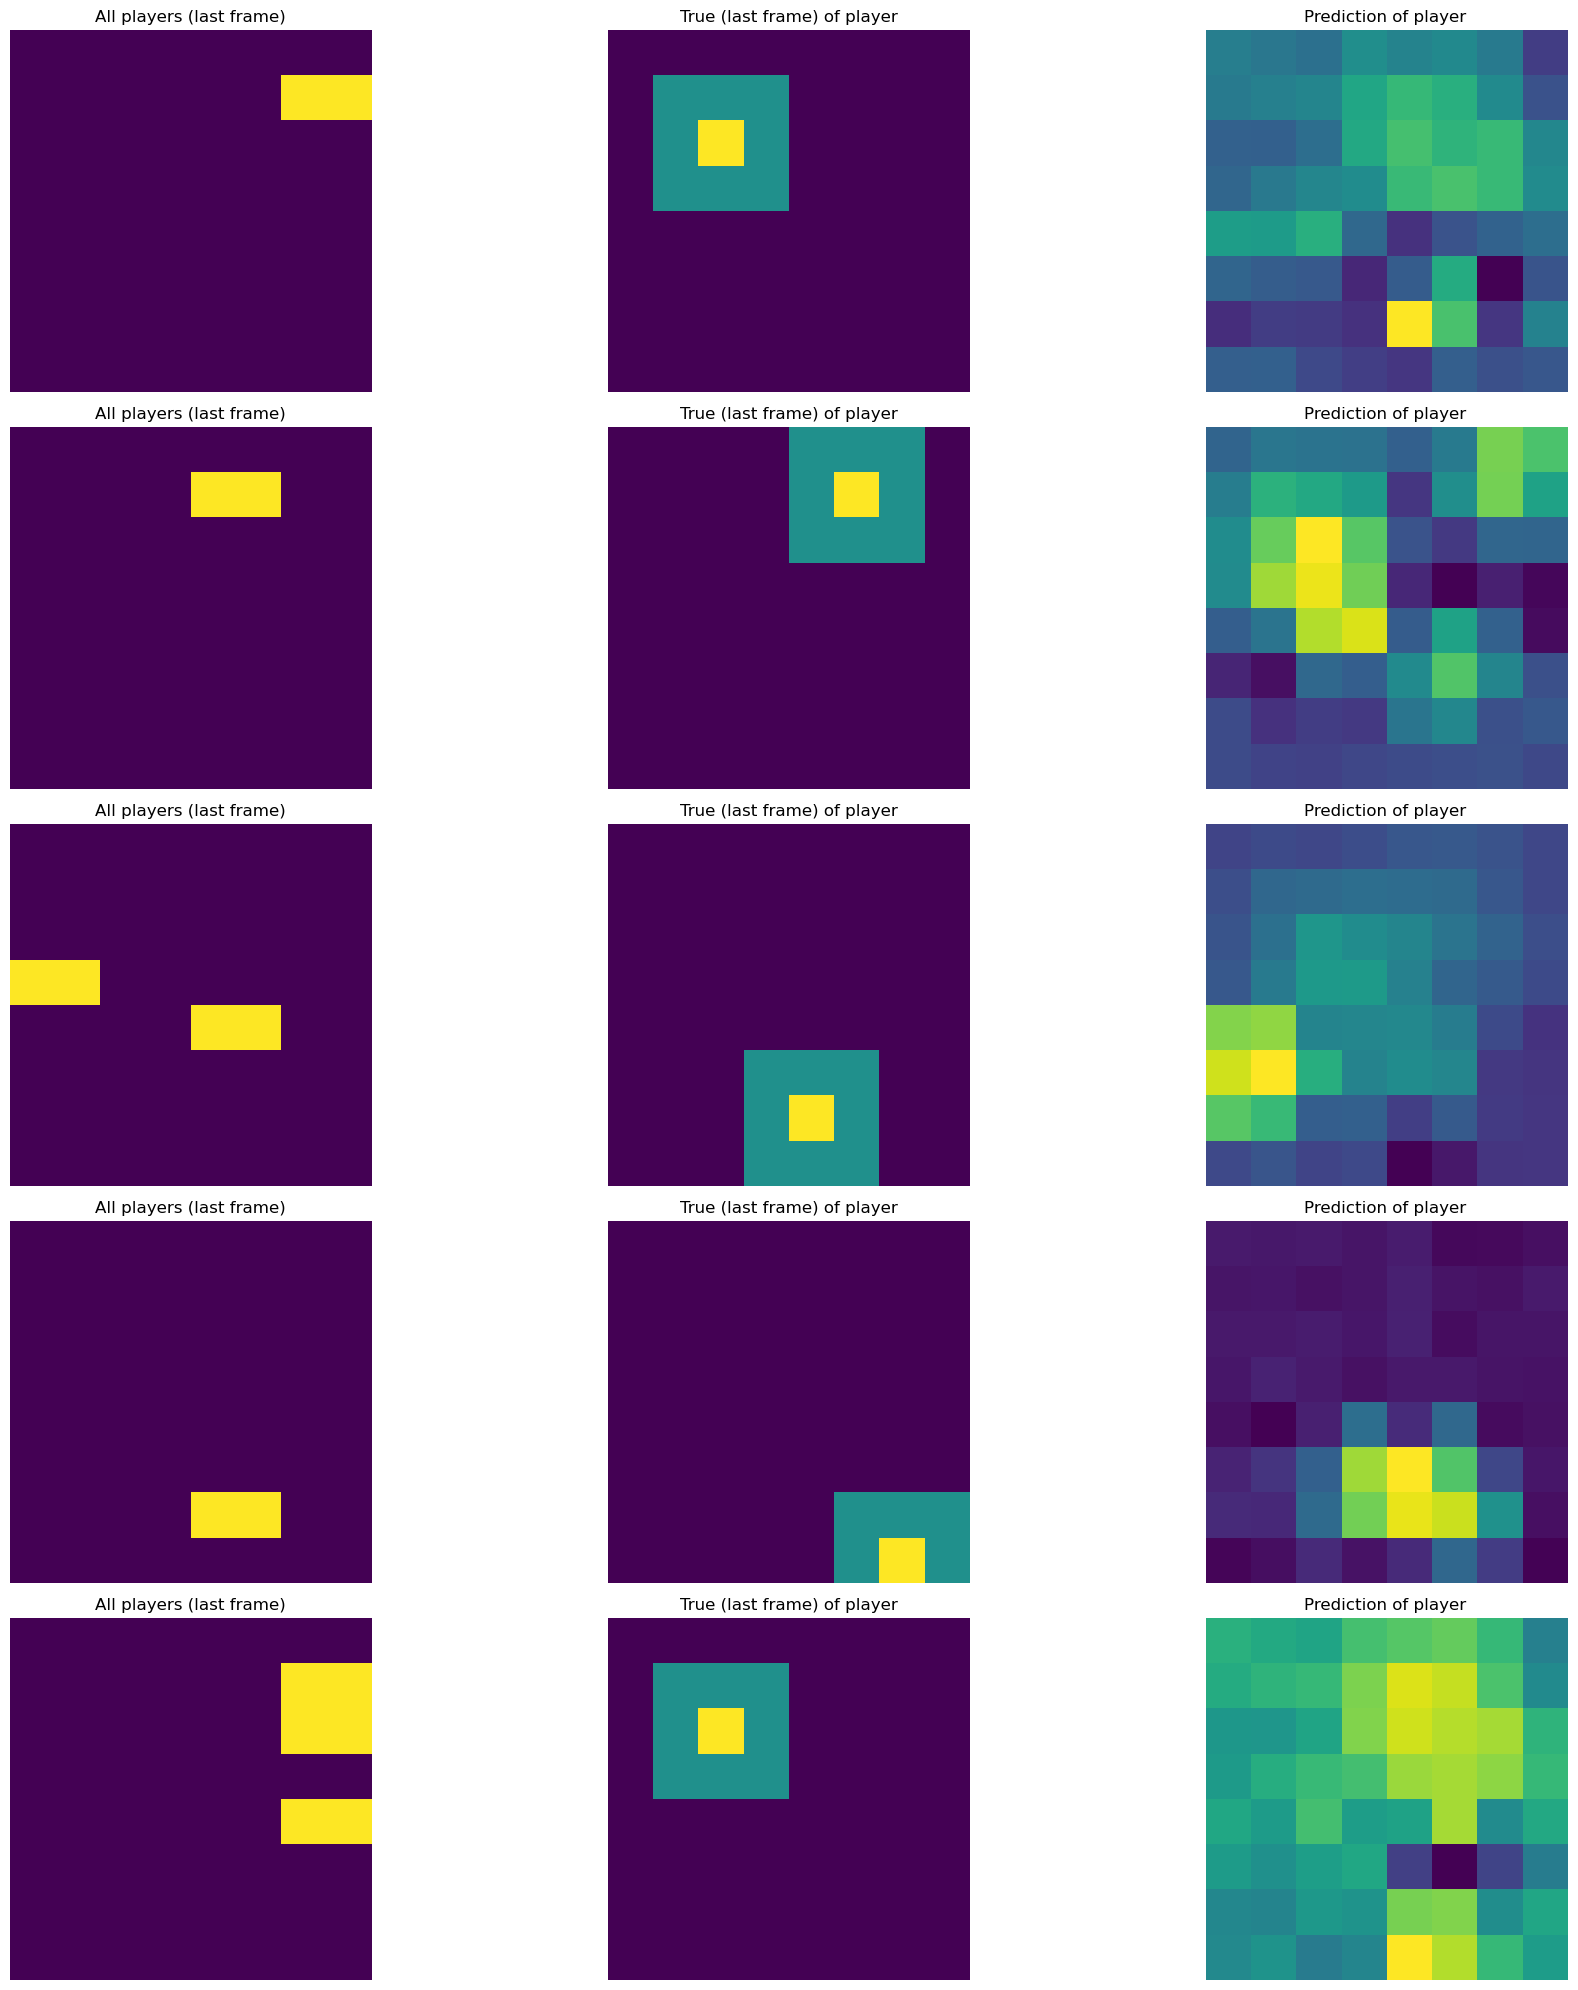

MODELO model1 - ESCENA Scene3
Epoch 1/50
67/67 [==============================] - 9s 112ms/step - loss: 0.0349 - mse: 0.0349 - mae: 0.1083 - val_loss: 0.0373 - val_mse: 0.0373 - val_mae: 0.1139
Epoch 2/50
67/67 [==============================] - 7s 104ms/step - loss: 0.0319 - mse: 0.0319 - mae: 0.1067 - val_loss: 0.0359 - val_mse: 0.0359 - val_mae: 0.1127
Epoch 3/50
67/67 [==============================] - 7s 104ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1055 - val_loss: 0.0361 - val_mse: 0.0361 - val_mae: 0.1167
Epoch 4/50
67/67 [==============================] - 7s 103ms/step - loss: 0.0312 - mse: 0.0312 - mae: 0.1058 - val_loss: 0.0364 - val_mse: 0.0364 - val_mae: 0.1103
Epoch 5/50
67/67 [==============================] - 7s 104ms/step - loss: 0.0308 - mse: 0.0308 - mae: 0.1040 - val_loss: 0.0366 - val_mse: 0.0366 - val_mae: 0.1139
Epoch 6/50
67/67 [==============================] - 7s 103ms/step - loss: 0.0304 - mse: 0.0304 - mae: 0.1034 - val_loss: 0.0367 - val_mse: 0.0367 - va

12/12 [==============================] - 1s 25ms/step


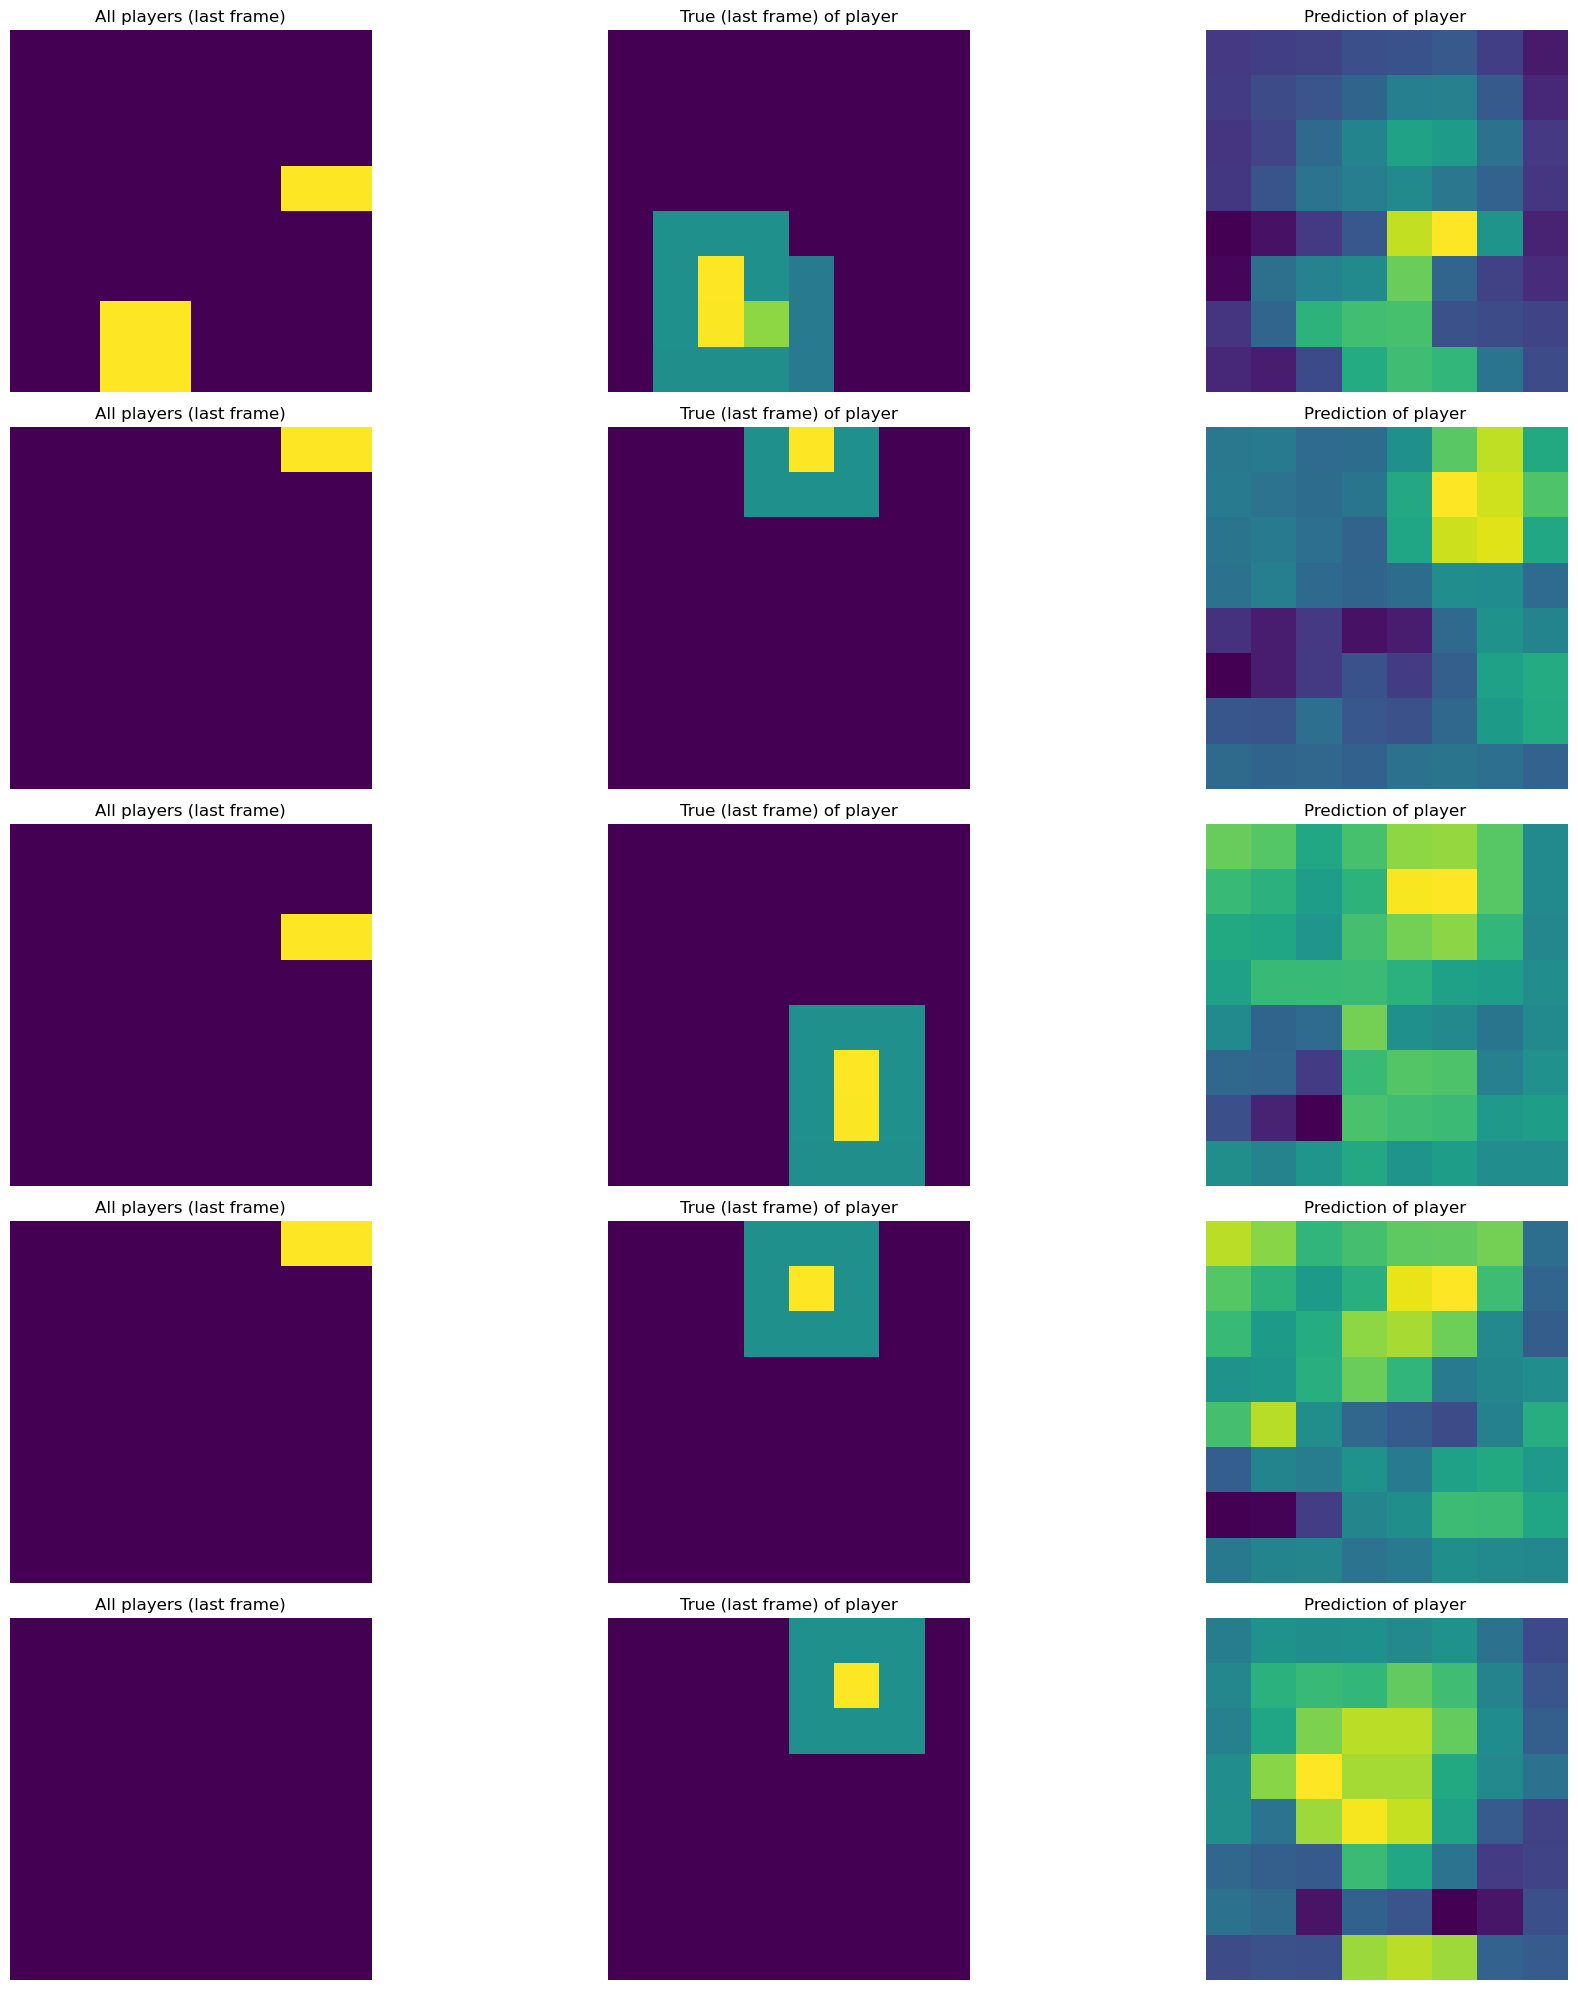

MODELO model2 - ESCENA Scene3
Epoch 1/50
67/67 [==============================] - 15s 192ms/step - loss: 0.0348 - mse: 0.0348 - mae: 0.1060 - val_loss: 0.0359 - val_mse: 0.0359 - val_mae: 0.1121
Epoch 2/50
67/67 [==============================] - 12s 179ms/step - loss: 0.0321 - mse: 0.0321 - mae: 0.1074 - val_loss: 0.0359 - val_mse: 0.0359 - val_mae: 0.1101
Epoch 3/50
67/67 [==============================] - 12s 180ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1059 - val_loss: 0.0360 - val_mse: 0.0360 - val_mae: 0.1172
Epoch 4/50
67/67 [==============================] - 12s 179ms/step - loss: 0.0306 - mse: 0.0306 - mae: 0.1040 - val_loss: 0.0372 - val_mse: 0.0372 - val_mae: 0.1178
Epoch 5/50
67/67 [==============================] - 12s 178ms/step - loss: 0.0301 - mse: 0.0301 - mae: 0.1022 - val_loss: 0.0364 - val_mse: 0.0364 - val_mae: 0.1165
Epoch 6/50
67/67 [==============================] - 11s 163ms/step - loss: 0.0295 - mse: 0.0295 - mae: 0.1012 - val_loss: 0.0363 - val_mse: 0.036

12/12 [==============================] - 1s 69ms/step


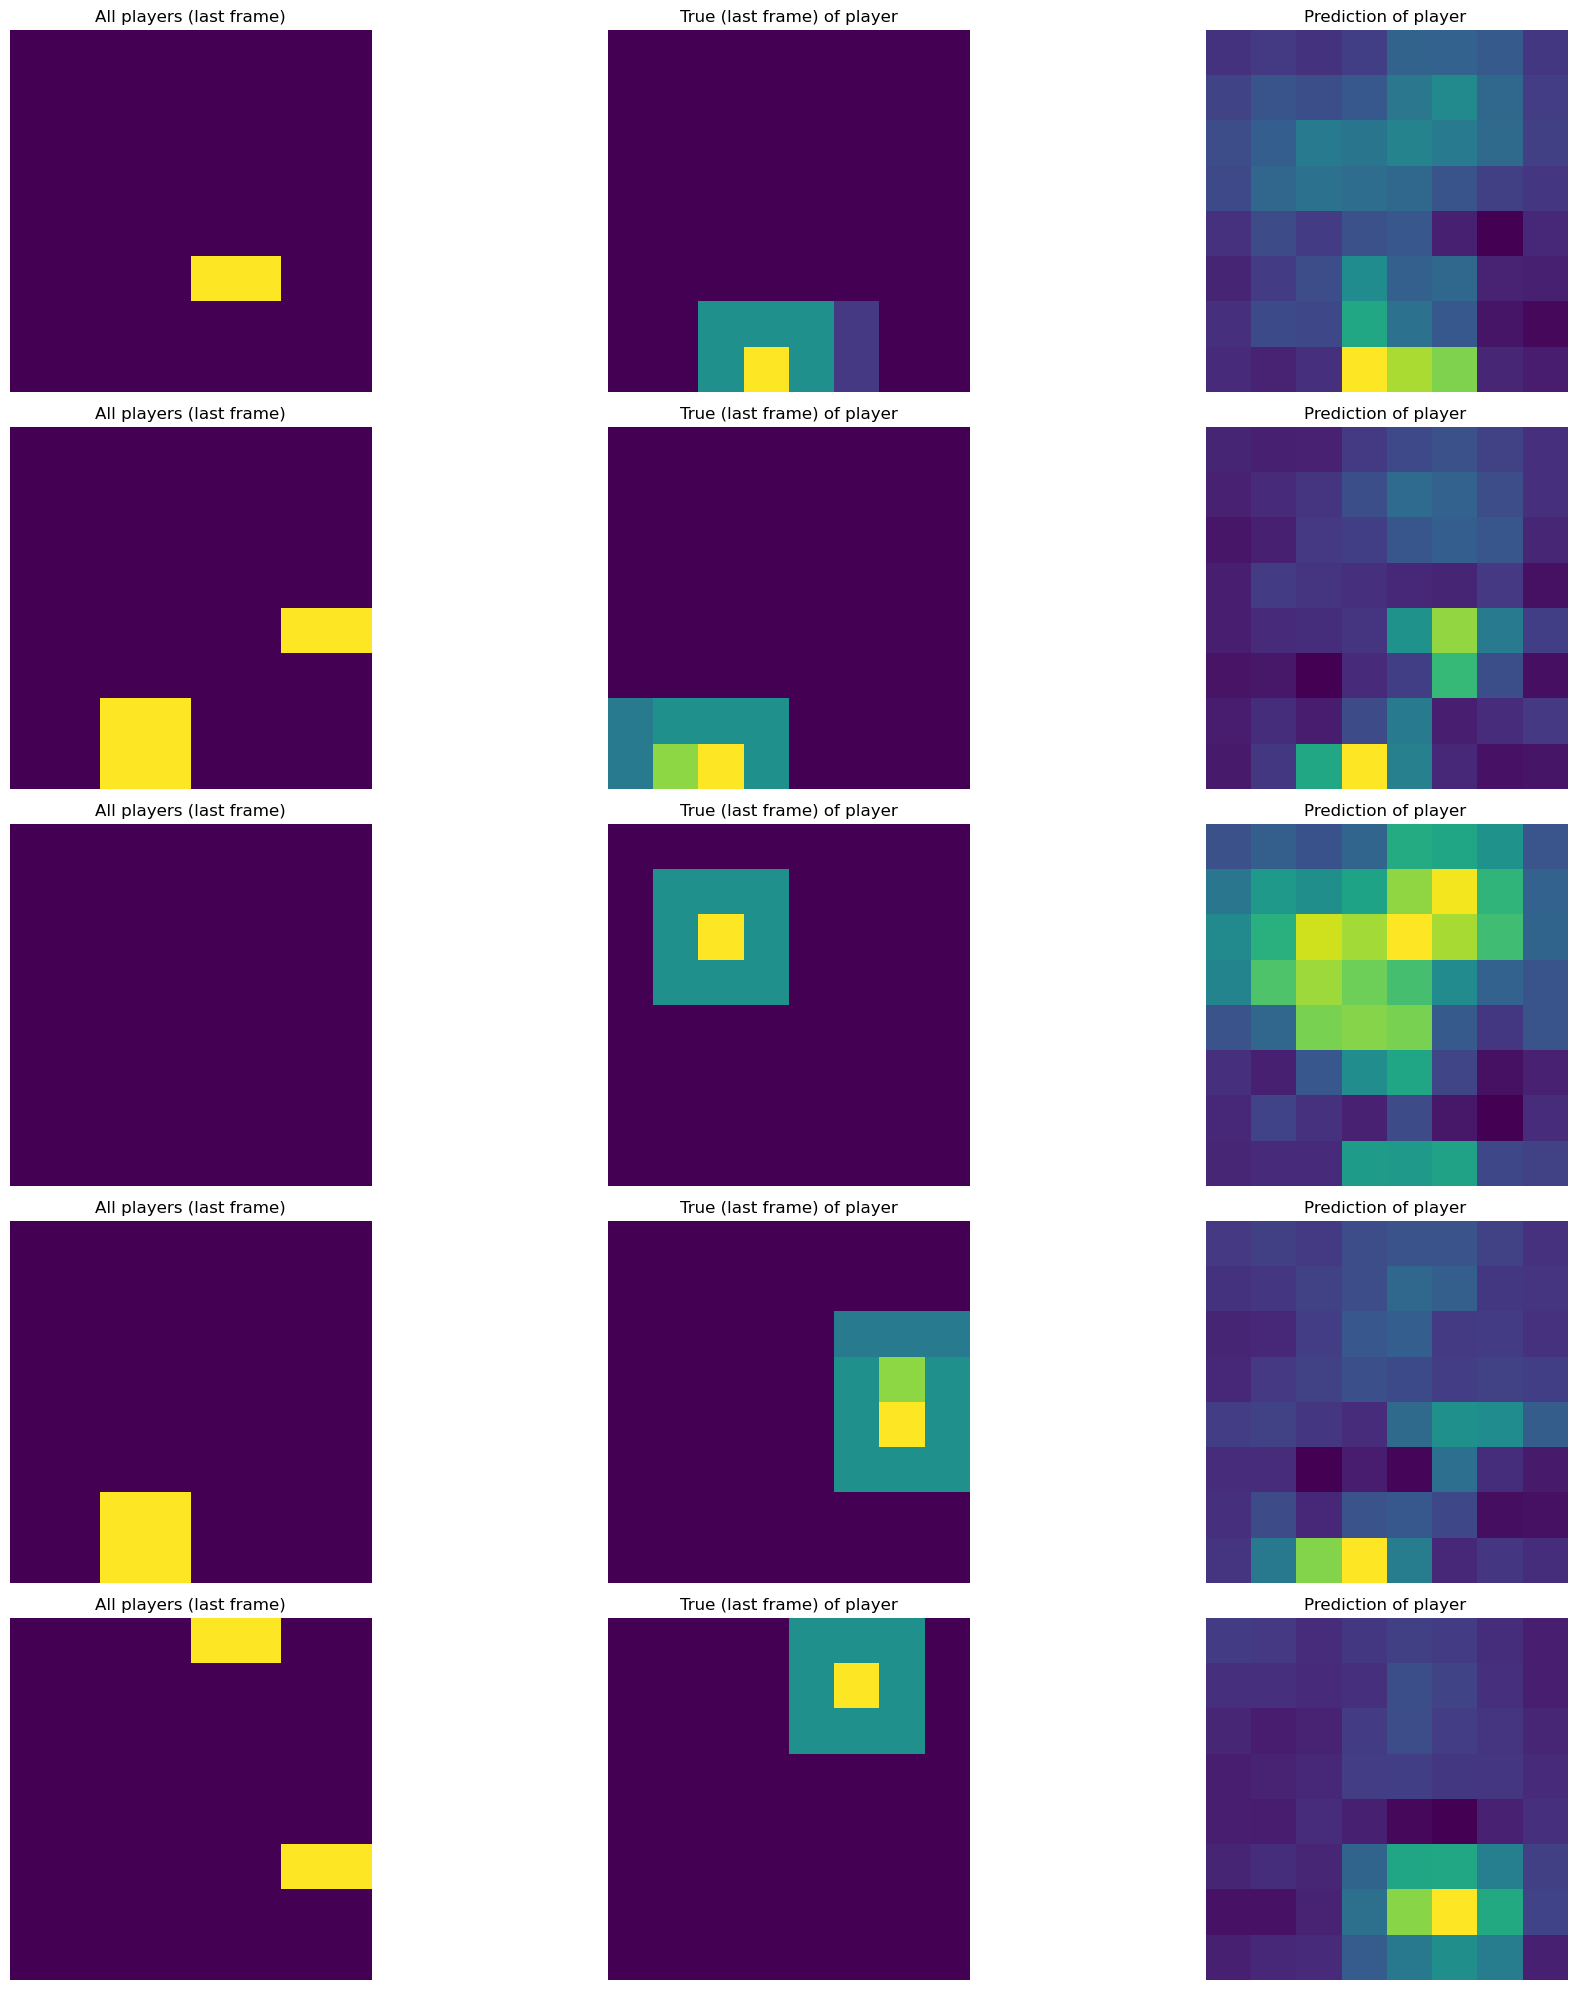

MODELO transf1 - ESCENA Scene3
Epoch 1/50
67/67 [==============================] - 98s 1s/step - loss: 0.0390 - mse: 0.0390 - mae: 0.1216 - val_loss: 0.0365 - val_mse: 0.0365 - val_mae: 0.1147
Epoch 2/50
67/67 [==============================] - 96s 1s/step - loss: 0.0332 - mse: 0.0332 - mae: 0.1108 - val_loss: 0.0369 - val_mse: 0.0369 - val_mae: 0.1092
Epoch 3/50
67/67 [==============================] - 96s 1s/step - loss: 0.0318 - mse: 0.0318 - mae: 0.1058 - val_loss: 0.0365 - val_mse: 0.0365 - val_mae: 0.1126
Epoch 4/50
67/67 [==============================] - 97s 1s/step - loss: 0.0308 - mse: 0.0308 - mae: 0.1054 - val_loss: 0.0364 - val_mse: 0.0364 - val_mae: 0.1108
Epoch 5/50
67/67 [==============================] - 97s 1s/step - loss: 0.0301 - mse: 0.0301 - mae: 0.1030 - val_loss: 0.0370 - val_mse: 0.0370 - val_mae: 0.1174
Epoch 6/50
67/67 [==============================] - 96s 1s/step - loss: 0.0293 - mse: 0.0293 - mae: 0.1012 - val_loss: 0.0380 - val_mse: 0.0380 - val_mae: 0.11

12/12 [==============================] - 11s 917ms/step


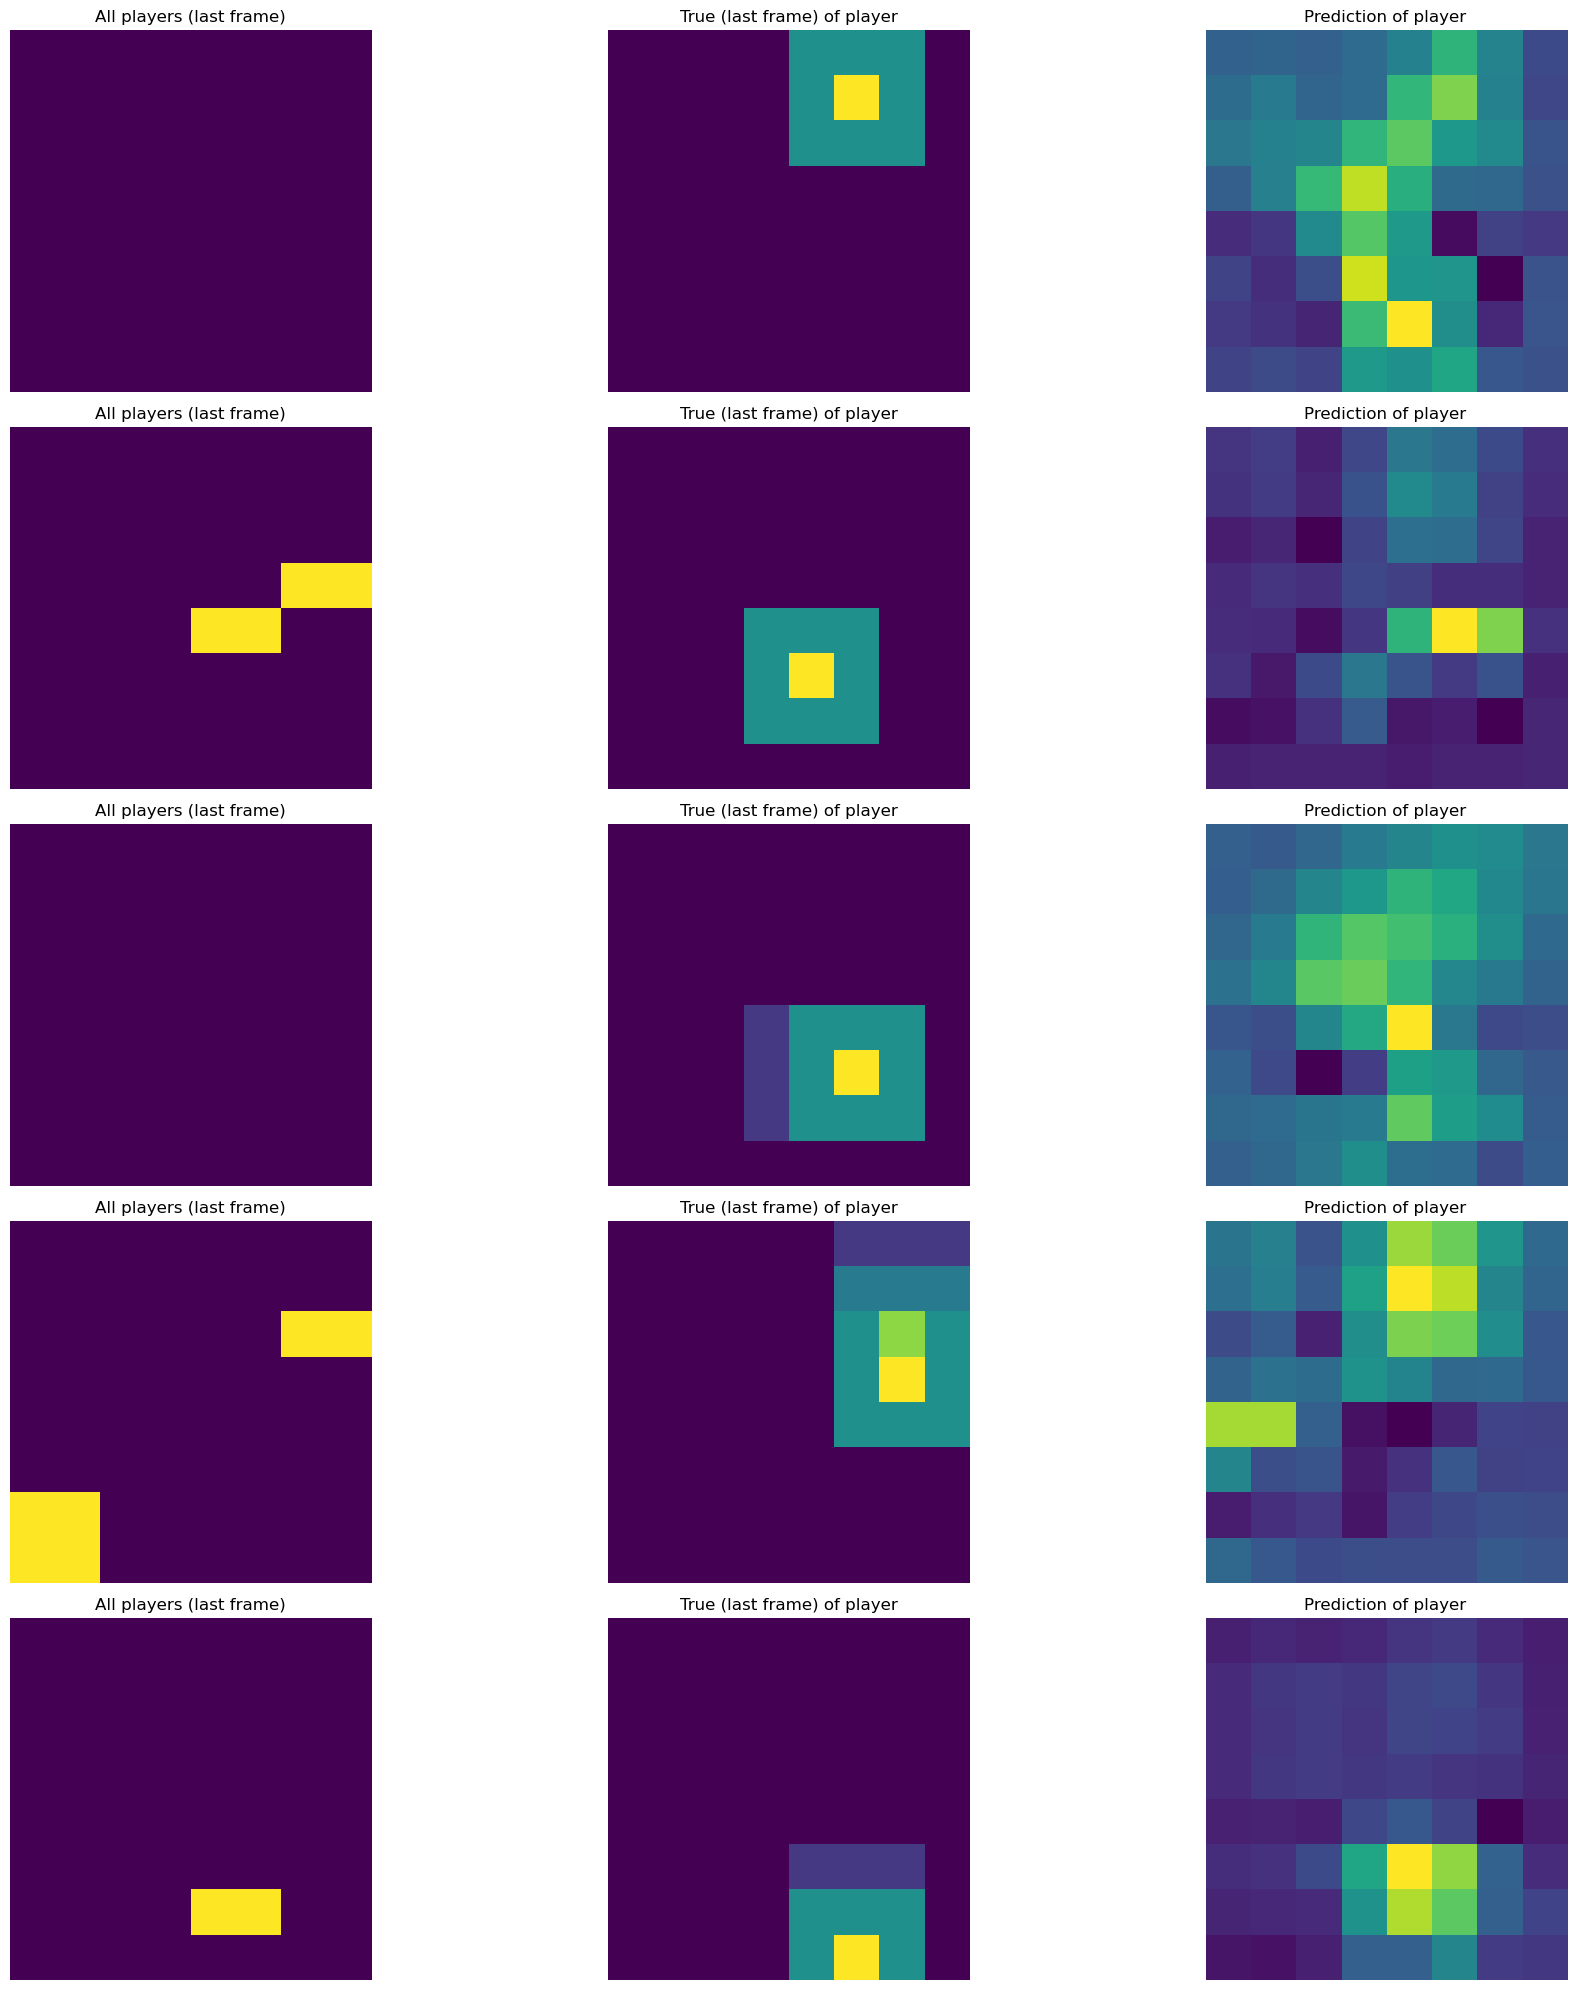

MODELO model0 - ESCENA Scene4
Epoch 1/50
88/88 [==============================] - 21s 183ms/step - loss: 0.0367 - mse: 0.0367 - mae: 0.1133 - val_loss: 0.0367 - val_mse: 0.0367 - val_mae: 0.1142
Epoch 2/50
88/88 [==============================] - 15s 173ms/step - loss: 0.0340 - mse: 0.0340 - mae: 0.1132 - val_loss: 0.0380 - val_mse: 0.0380 - val_mae: 0.1122
Epoch 3/50
88/88 [==============================] - 15s 173ms/step - loss: 0.0331 - mse: 0.0331 - mae: 0.1103 - val_loss: 0.0373 - val_mse: 0.0373 - val_mae: 0.1148
Epoch 4/50
88/88 [==============================] - 15s 174ms/step - loss: 0.0325 - mse: 0.0325 - mae: 0.1087 - val_loss: 0.0365 - val_mse: 0.0365 - val_mae: 0.1111
Epoch 5/50
88/88 [==============================] - 15s 175ms/step - loss: 0.0322 - mse: 0.0322 - mae: 0.1081 - val_loss: 0.0378 - val_mse: 0.0378 - val_mae: 0.1125
Epoch 6/50
88/88 [==============================] - 15s 176ms/step - loss: 0.0317 - mse: 0.0317 - mae: 0.1070 - val_loss: 0.0385 - val_mse: 0.038

1/1 [==============================] - 1s 729ms/step


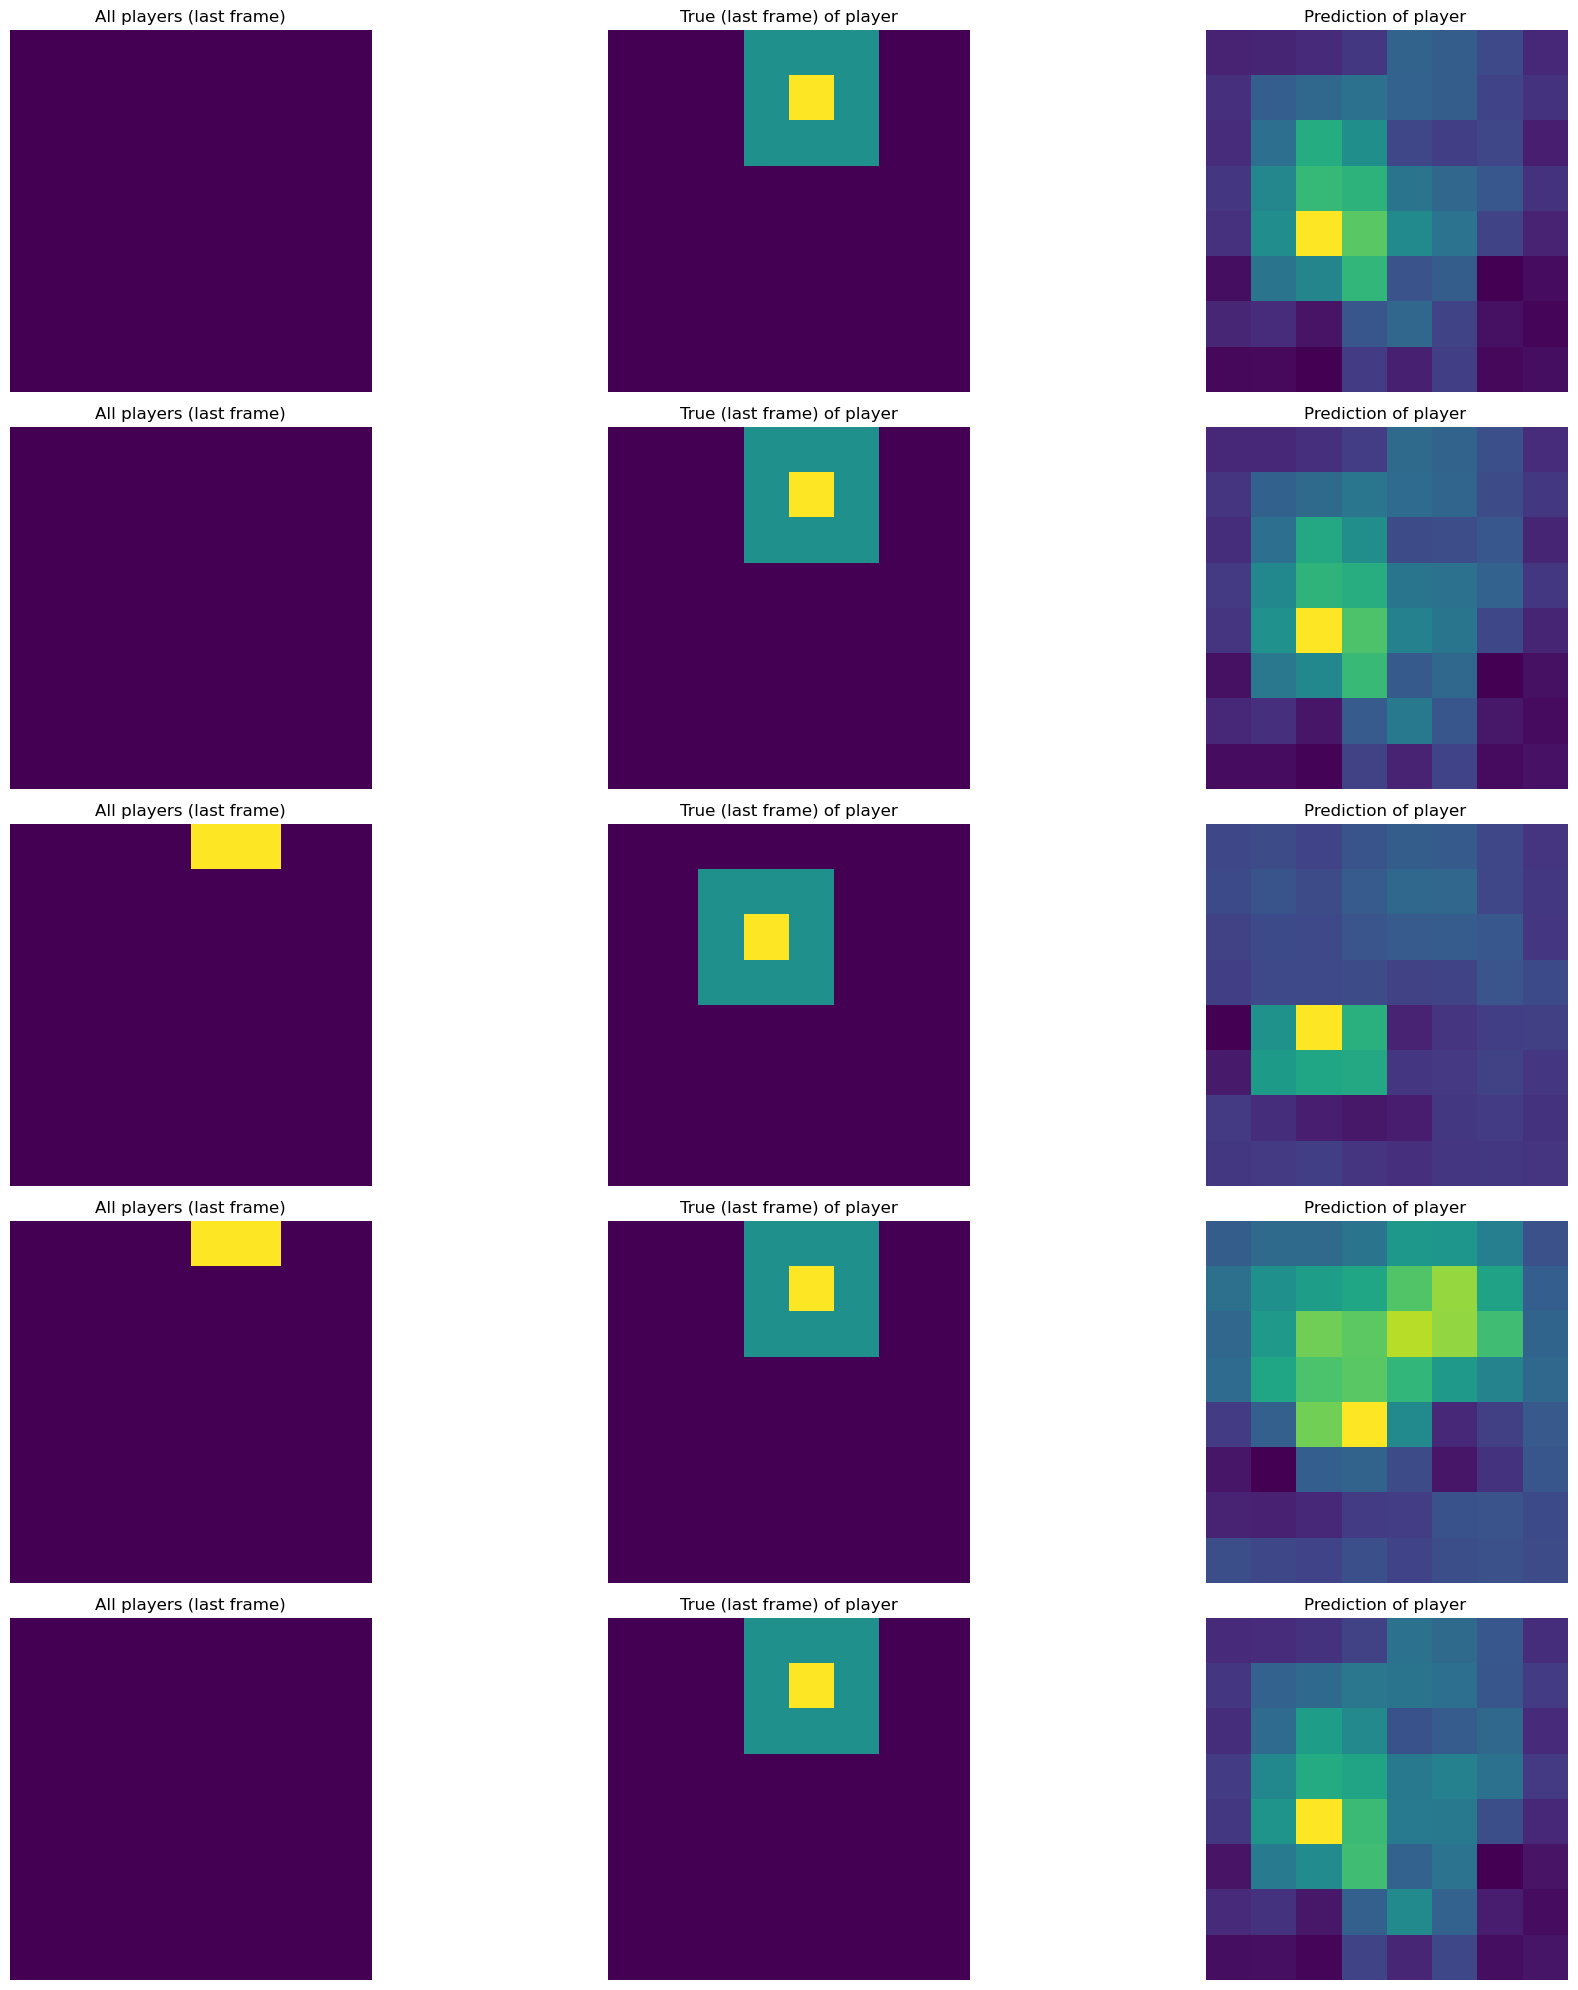

MODELO model1 - ESCENA Scene4
Epoch 1/50
88/88 [==============================] - 13s 128ms/step - loss: 0.0348 - mse: 0.0348 - mae: 0.1092 - val_loss: 0.0353 - val_mse: 0.0353 - val_mae: 0.1104
Epoch 2/50
88/88 [==============================] - 11s 120ms/step - loss: 0.0325 - mse: 0.0325 - mae: 0.1084 - val_loss: 0.0362 - val_mse: 0.0362 - val_mae: 0.1137
Epoch 3/50
88/88 [==============================] - 11s 121ms/step - loss: 0.0320 - mse: 0.0320 - mae: 0.1071 - val_loss: 0.0350 - val_mse: 0.0350 - val_mae: 0.1090
Epoch 4/50
88/88 [==============================] - 11s 120ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1062 - val_loss: 0.0354 - val_mse: 0.0354 - val_mae: 0.1094
Epoch 5/50
88/88 [==============================] - 11s 120ms/step - loss: 0.0312 - mse: 0.0312 - mae: 0.1058 - val_loss: 0.0358 - val_mse: 0.0358 - val_mae: 0.1099
Epoch 6/50
88/88 [==============================] - 11s 121ms/step - loss: 0.0306 - mse: 0.0306 - mae: 0.1041 - val_loss: 0.0351 - val_mse: 0.035

1/1 [==============================] - 1s 562ms/step


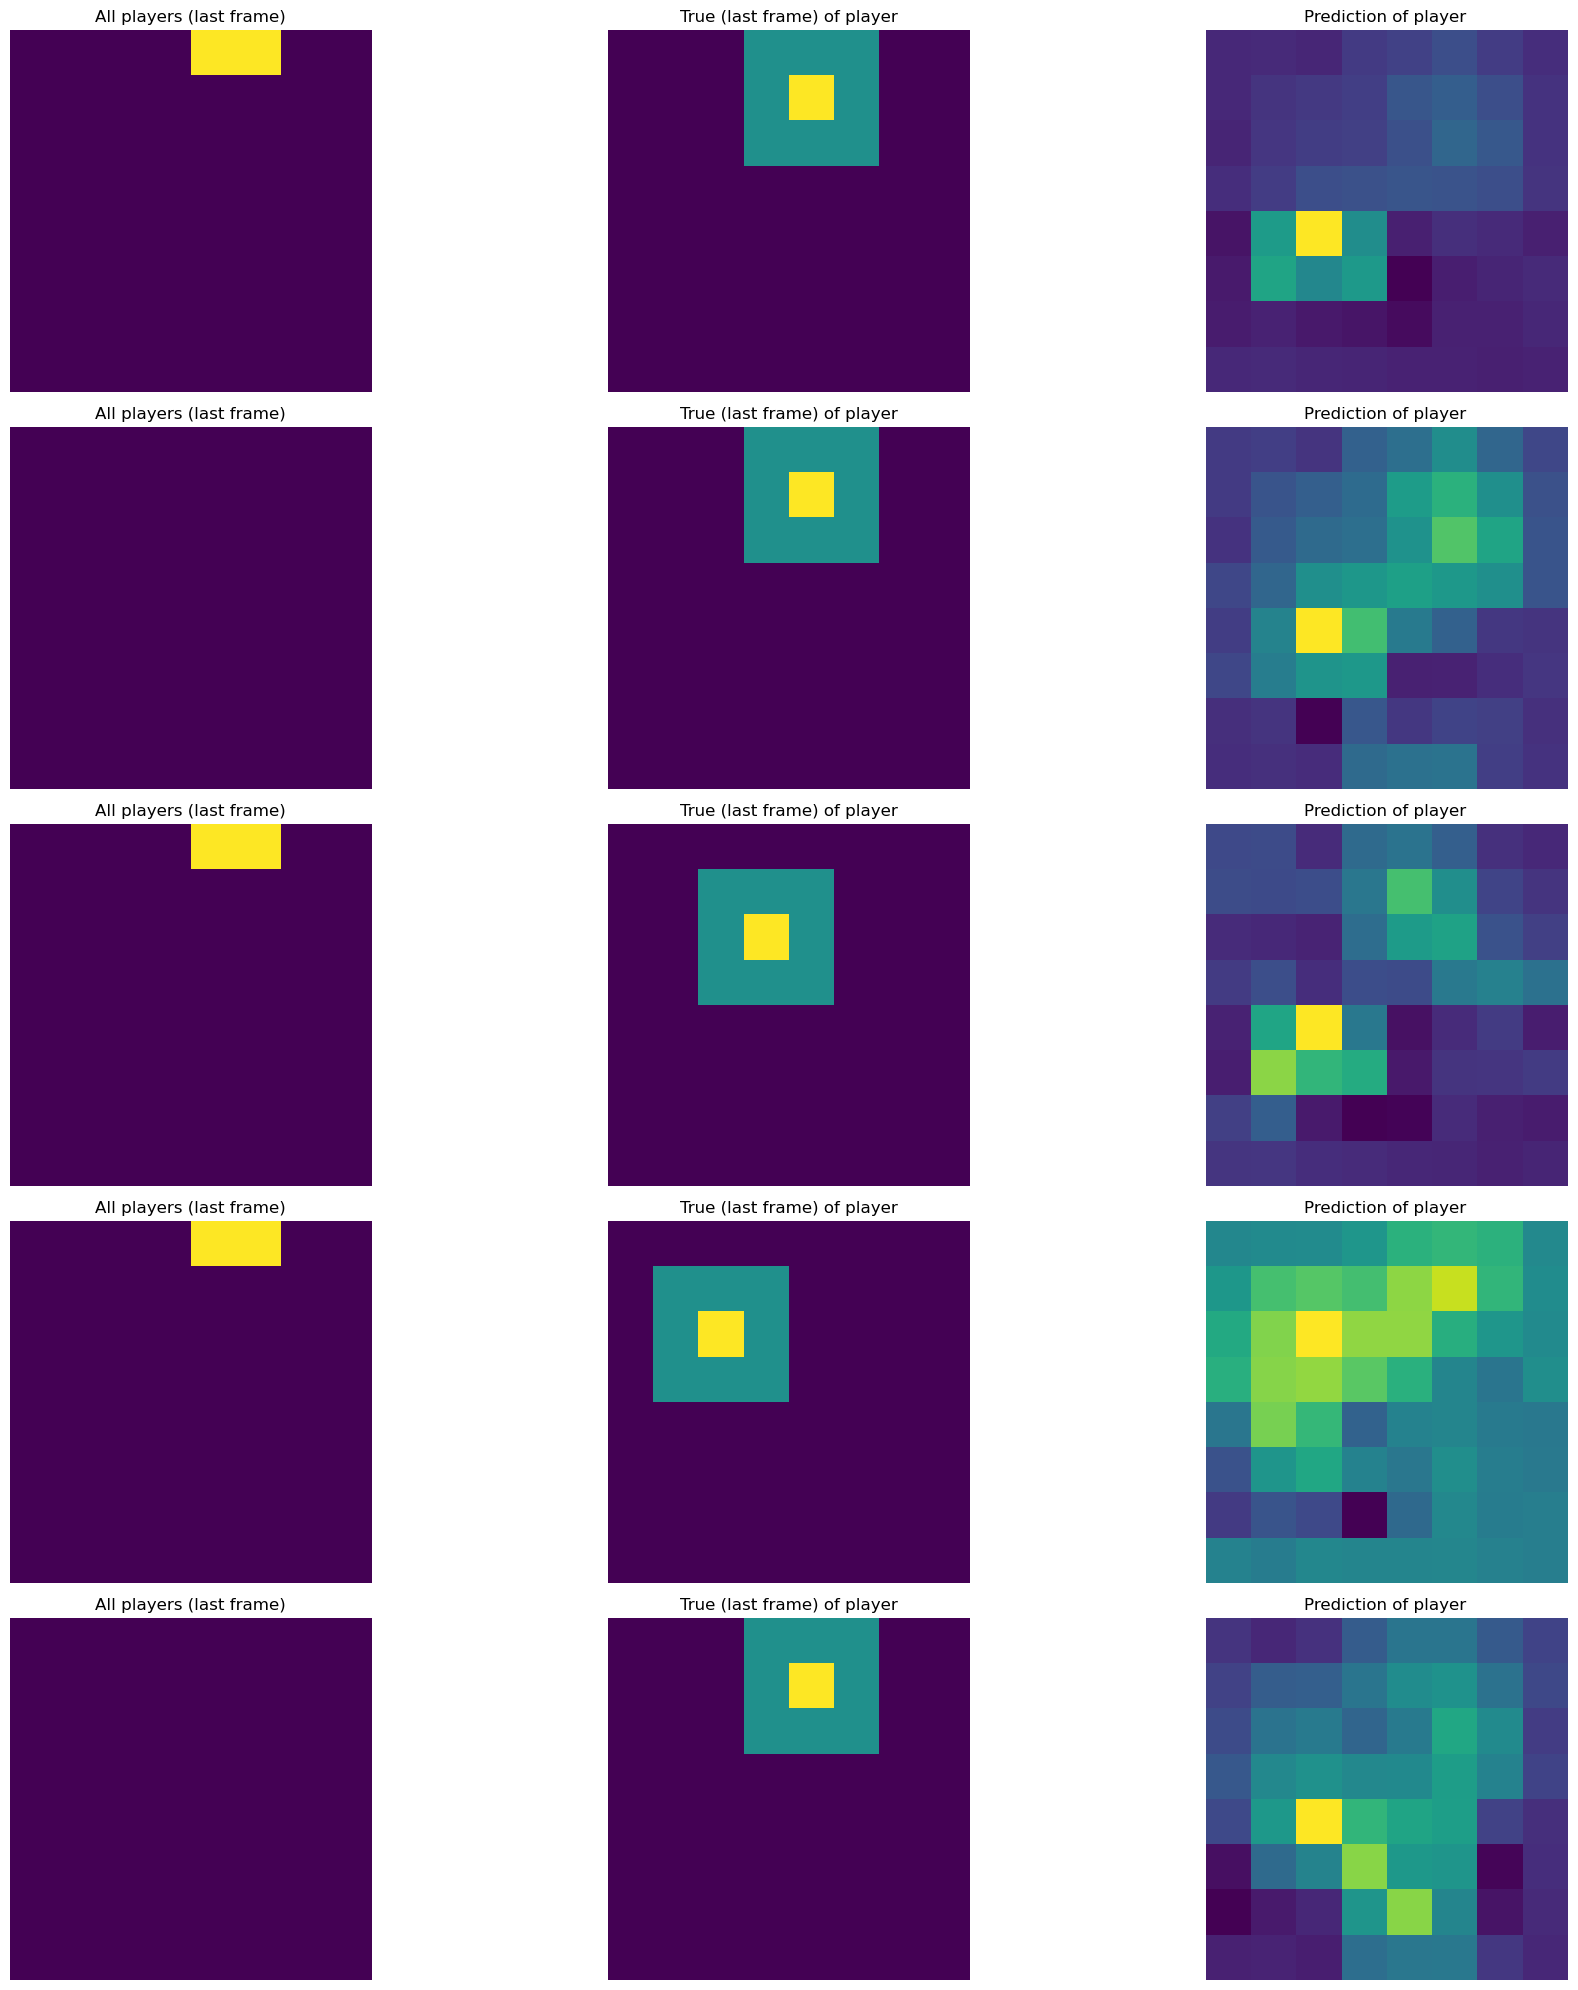

MODELO model2 - ESCENA Scene4
Epoch 1/50
88/88 [==============================] - 18s 187ms/step - loss: 0.0348 - mse: 0.0348 - mae: 0.1076 - val_loss: 0.0355 - val_mse: 0.0355 - val_mae: 0.1121
Epoch 2/50
88/88 [==============================] - 17s 196ms/step - loss: 0.0325 - mse: 0.0325 - mae: 0.1086 - val_loss: 0.0370 - val_mse: 0.0370 - val_mae: 0.1136
Epoch 3/50
88/88 [==============================] - 17s 196ms/step - loss: 0.0317 - mse: 0.0317 - mae: 0.1061 - val_loss: 0.0389 - val_mse: 0.0389 - val_mae: 0.1178
Epoch 4/50
88/88 [==============================] - 17s 197ms/step - loss: 0.0309 - mse: 0.0309 - mae: 0.1043 - val_loss: 0.0359 - val_mse: 0.0359 - val_mae: 0.1103
Epoch 5/50
88/88 [==============================] - 17s 195ms/step - loss: 0.0303 - mse: 0.0303 - mae: 0.1024 - val_loss: 0.0375 - val_mse: 0.0375 - val_mae: 0.1144
Epoch 6/50
88/88 [==============================] - 17s 197ms/step - loss: 0.0297 - mse: 0.0297 - mae: 0.1013 - val_loss: 0.0363 - val_mse: 0.036

1/1 [==============================] - 1s 923ms/step


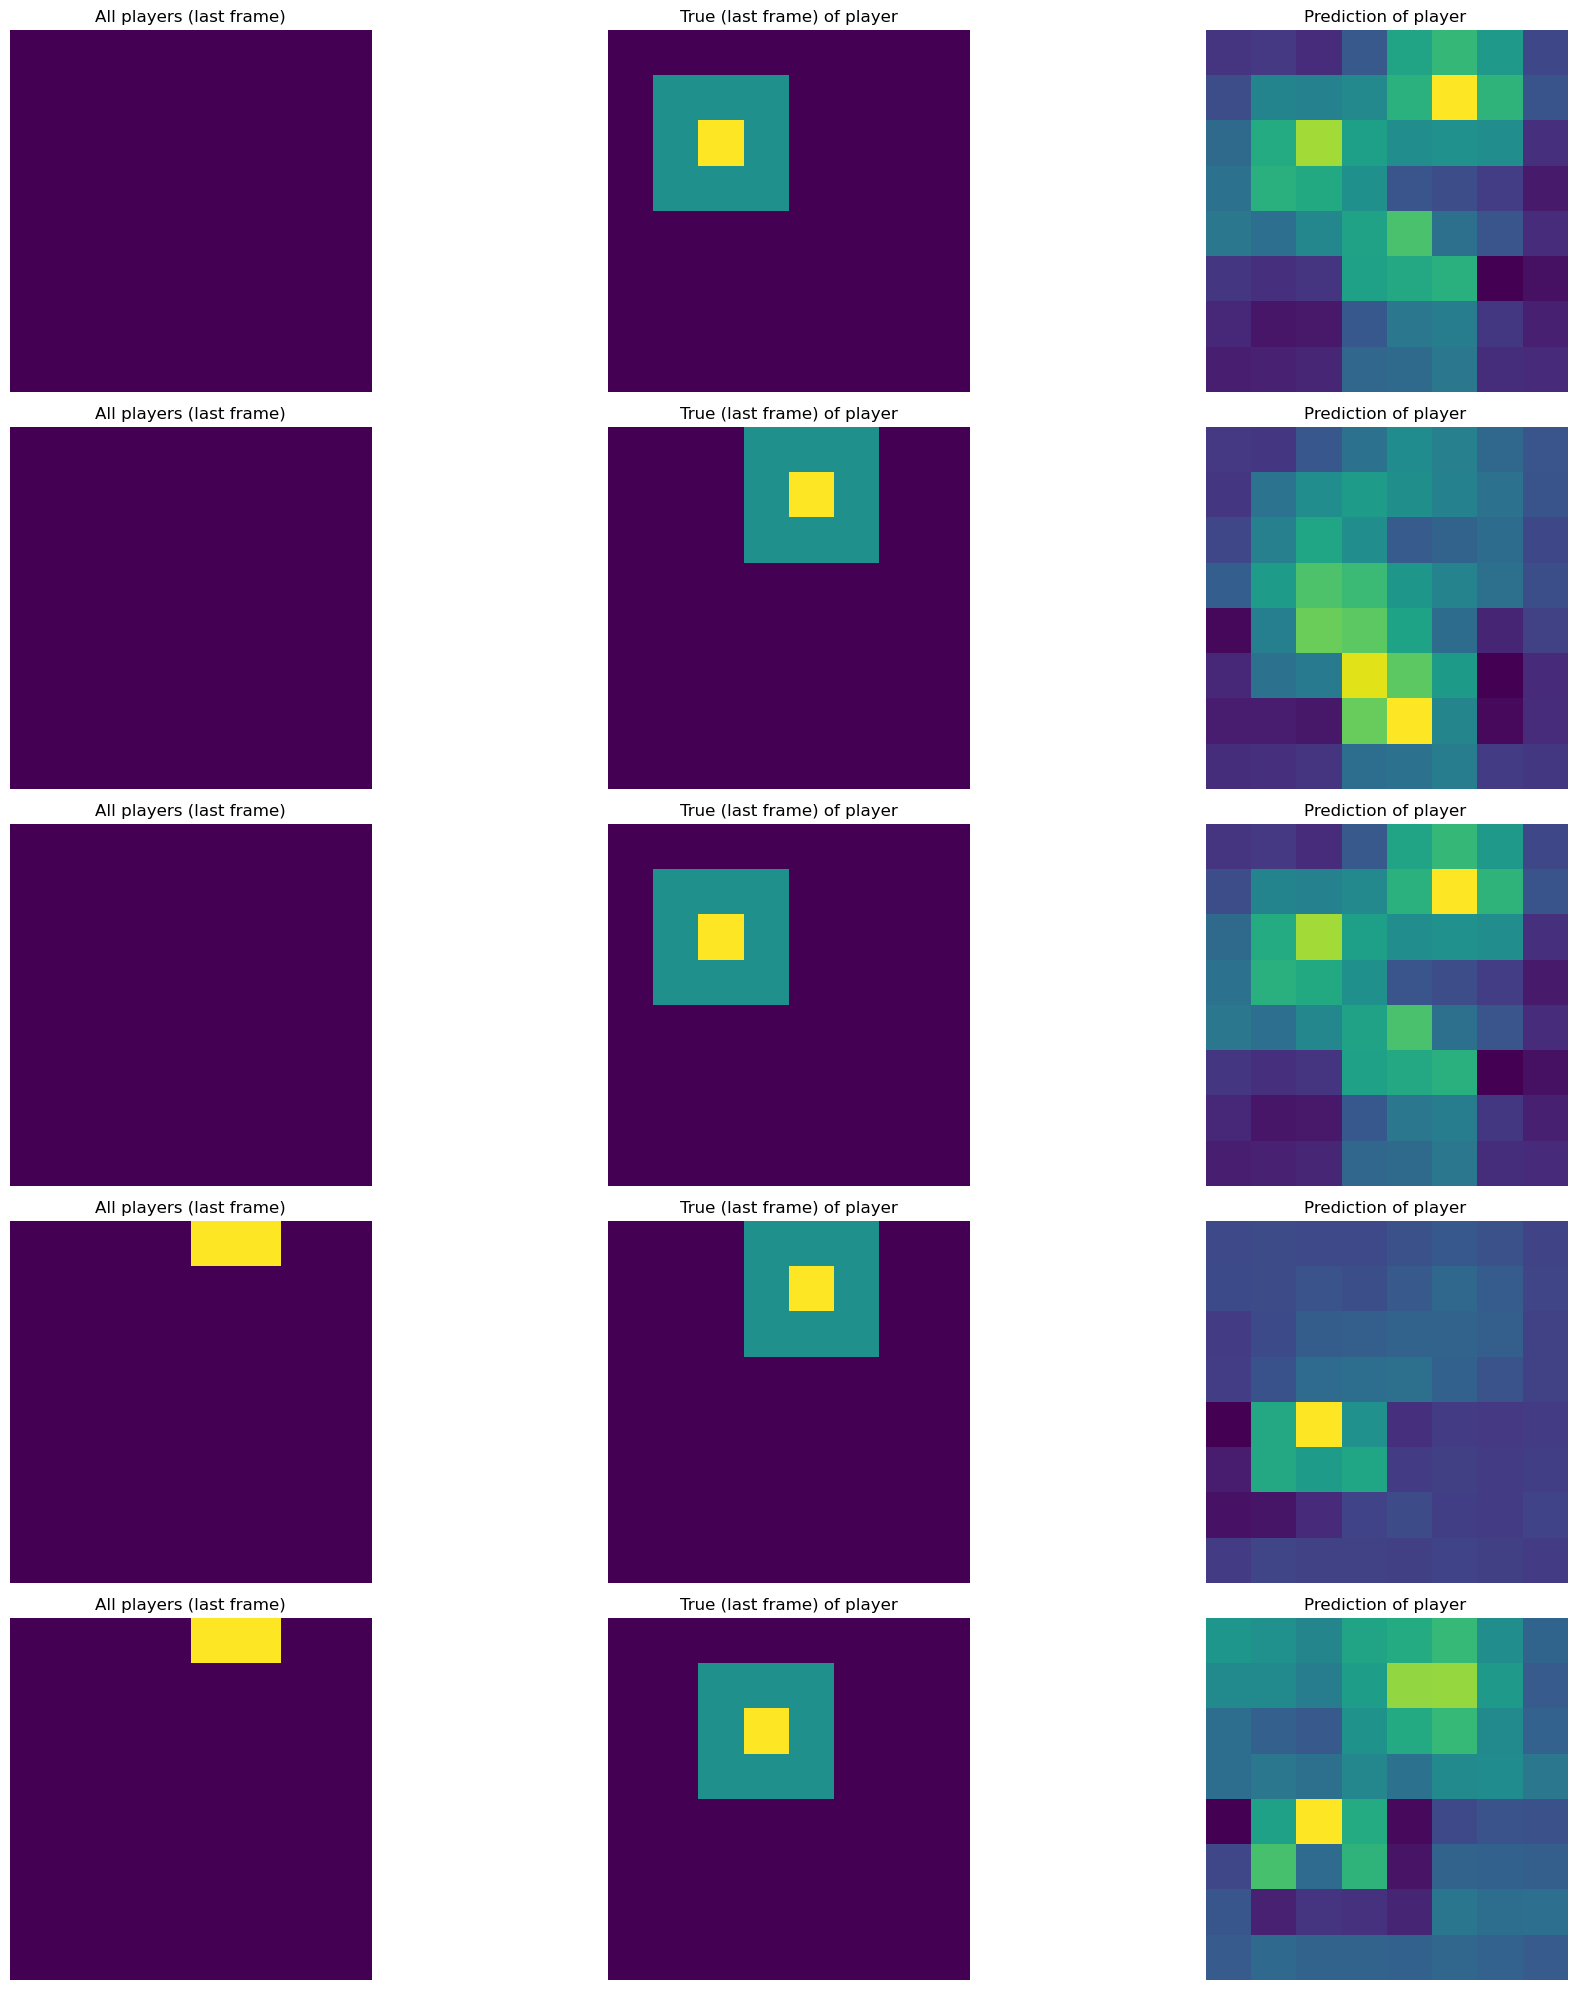

MODELO transf1 - ESCENA Scene4
Epoch 1/50
88/88 [==============================] - 157s 2s/step - loss: 0.0385 - mse: 0.0385 - mae: 0.1209 - val_loss: 0.0383 - val_mse: 0.0383 - val_mae: 0.1188
Epoch 2/50
88/88 [==============================] - 156s 2s/step - loss: 0.0334 - mse: 0.0334 - mae: 0.1104 - val_loss: 0.0378 - val_mse: 0.0378 - val_mae: 0.1100
Epoch 3/50
88/88 [==============================] - 158s 2s/step - loss: 0.0321 - mse: 0.0321 - mae: 0.1080 - val_loss: 0.0362 - val_mse: 0.0362 - val_mae: 0.1086
Epoch 4/50
88/88 [==============================] - 157s 2s/step - loss: 0.0312 - mse: 0.0312 - mae: 0.1062 - val_loss: 0.0357 - val_mse: 0.0357 - val_mae: 0.1122
Epoch 5/50
88/88 [==============================] - 157s 2s/step - loss: 0.0306 - mse: 0.0306 - mae: 0.1047 - val_loss: 0.0383 - val_mse: 0.0383 - val_mae: 0.1187
Epoch 6/50
88/88 [==============================] - 158s 2s/step - loss: 0.0301 - mse: 0.0301 - mae: 0.1035 - val_loss: 0.0362 - val_mse: 0.0362 - val_mae

1/1 [==============================] - 1s 1s/step


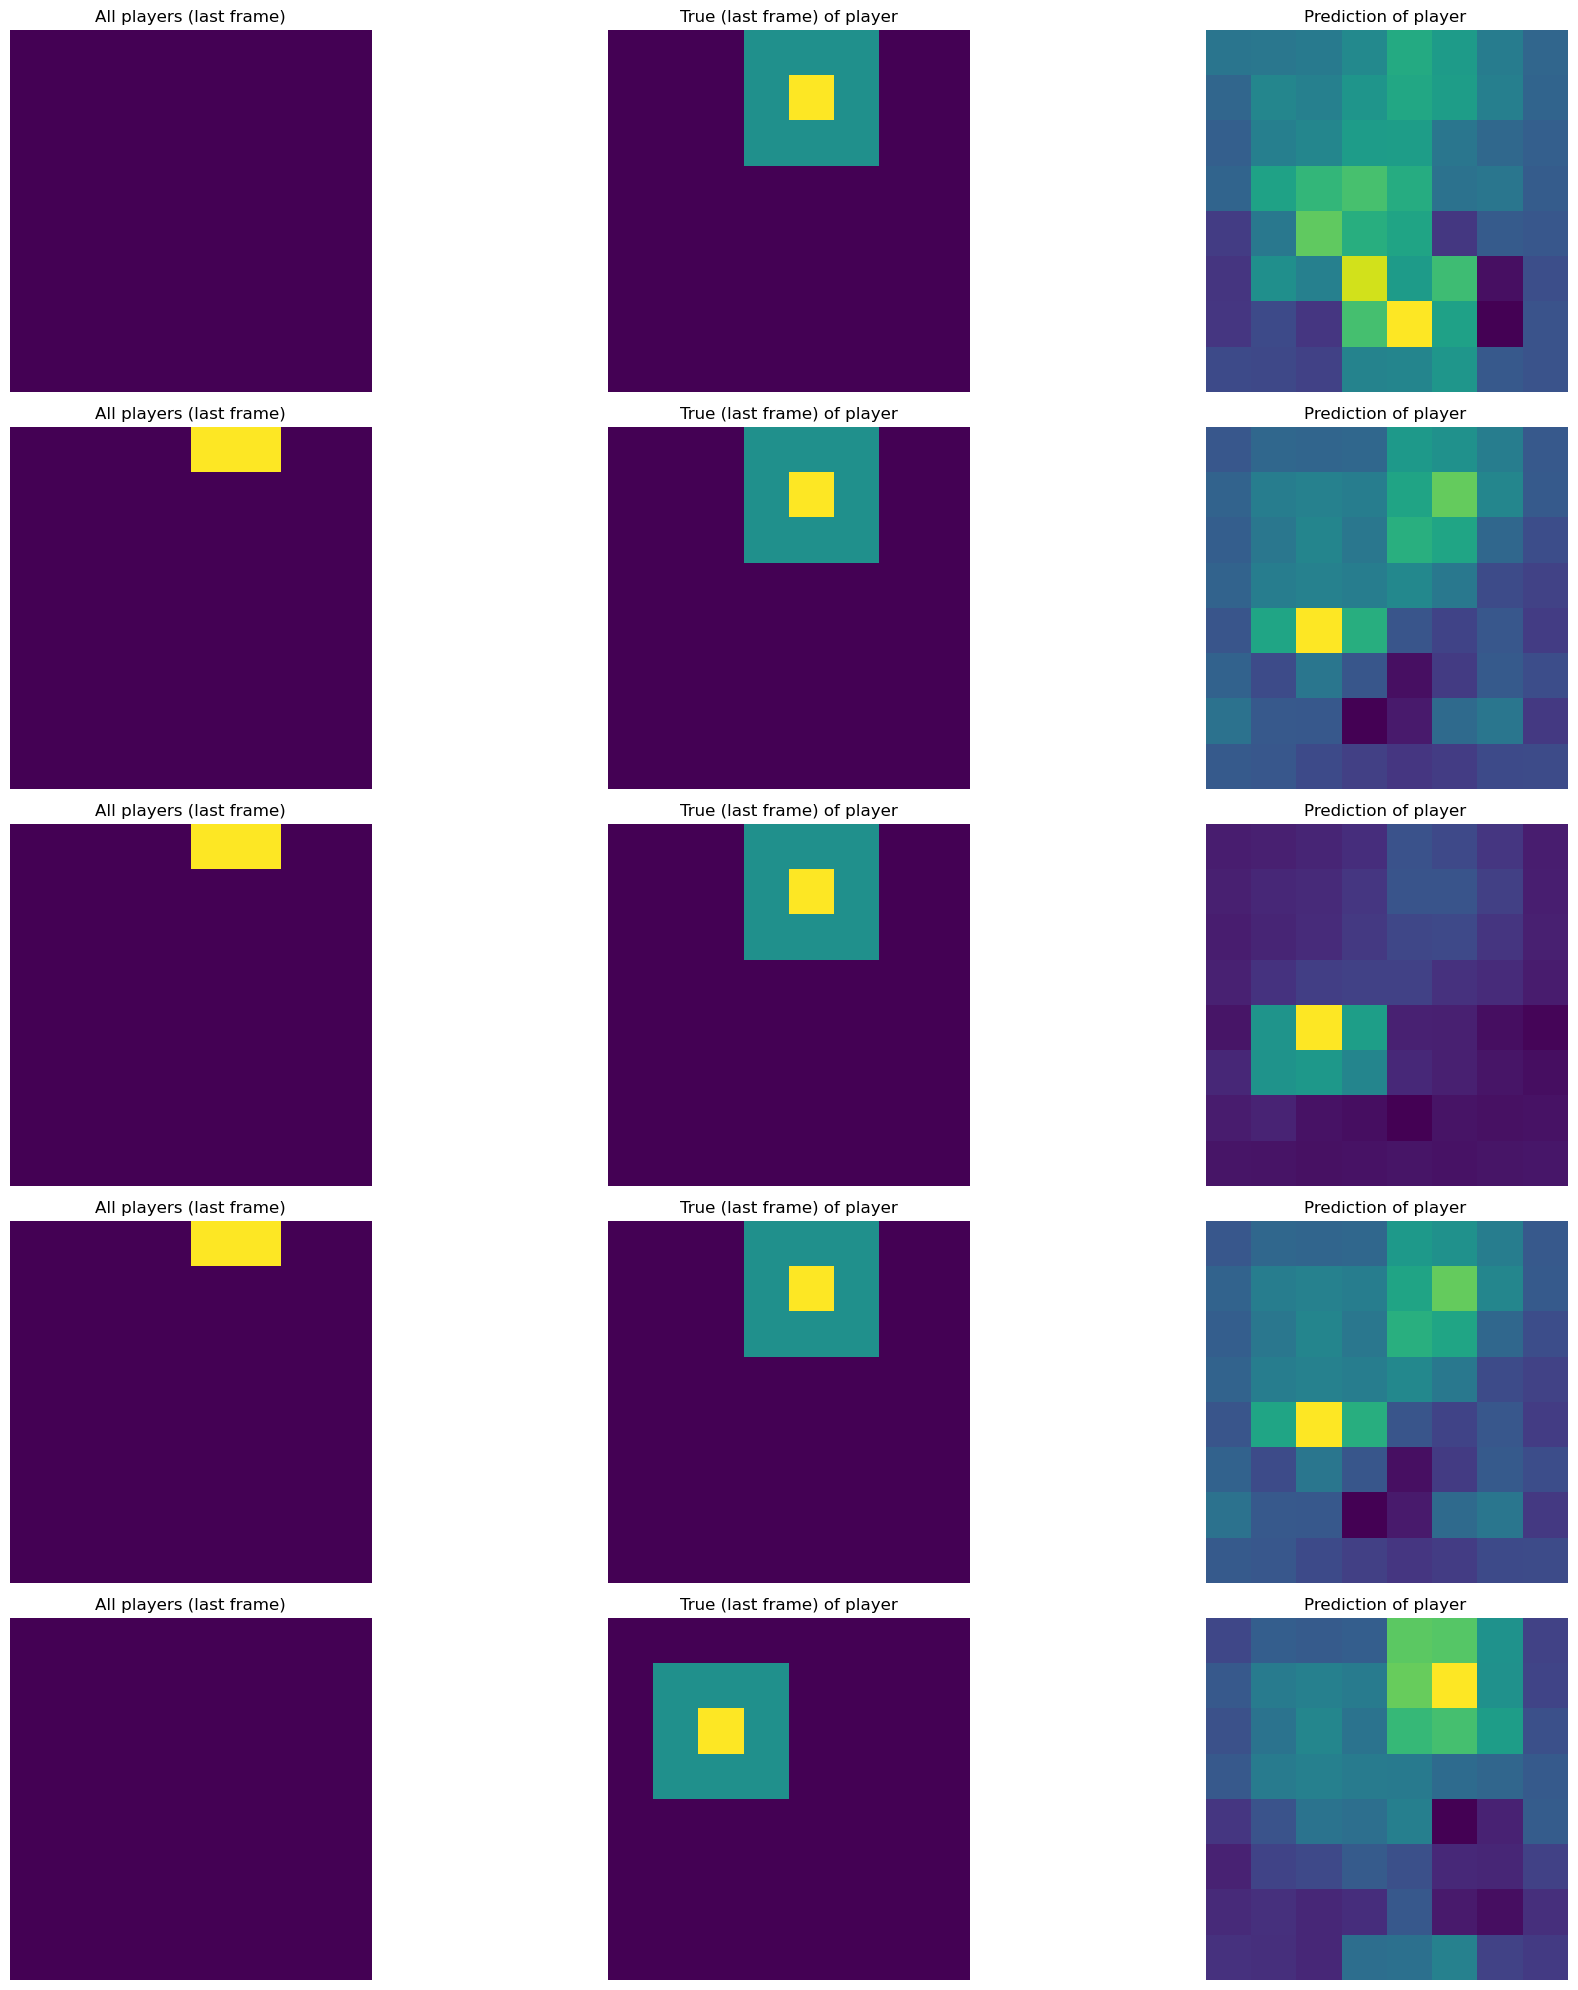

MODELO model0 - ESCENA Scene5
Epoch 1/50
76/76 [==============================] - 19s 178ms/step - loss: 0.0376 - mse: 0.0376 - mae: 0.1143 - val_loss: 0.0323 - val_mse: 0.0323 - val_mae: 0.1116
Epoch 2/50
76/76 [==============================] - 13s 167ms/step - loss: 0.0344 - mse: 0.0344 - mae: 0.1146 - val_loss: 0.0327 - val_mse: 0.0327 - val_mae: 0.1181
Epoch 3/50
76/76 [==============================] - 13s 167ms/step - loss: 0.0335 - mse: 0.0335 - mae: 0.1119 - val_loss: 0.0323 - val_mse: 0.0323 - val_mae: 0.1120
Epoch 4/50
76/76 [==============================] - 13s 167ms/step - loss: 0.0330 - mse: 0.0330 - mae: 0.1099 - val_loss: 0.0324 - val_mse: 0.0324 - val_mae: 0.1131
Epoch 5/50
76/76 [==============================] - 13s 168ms/step - loss: 0.0325 - mse: 0.0325 - mae: 0.1091 - val_loss: 0.0329 - val_mse: 0.0329 - val_mae: 0.1115
Epoch 6/50
76/76 [==============================] - 13s 168ms/step - loss: 0.0321 - mse: 0.0321 - mae: 0.1079 - val_loss: 0.0323 - val_mse: 0.032

7/7 [==============================] - 1s 76ms/step


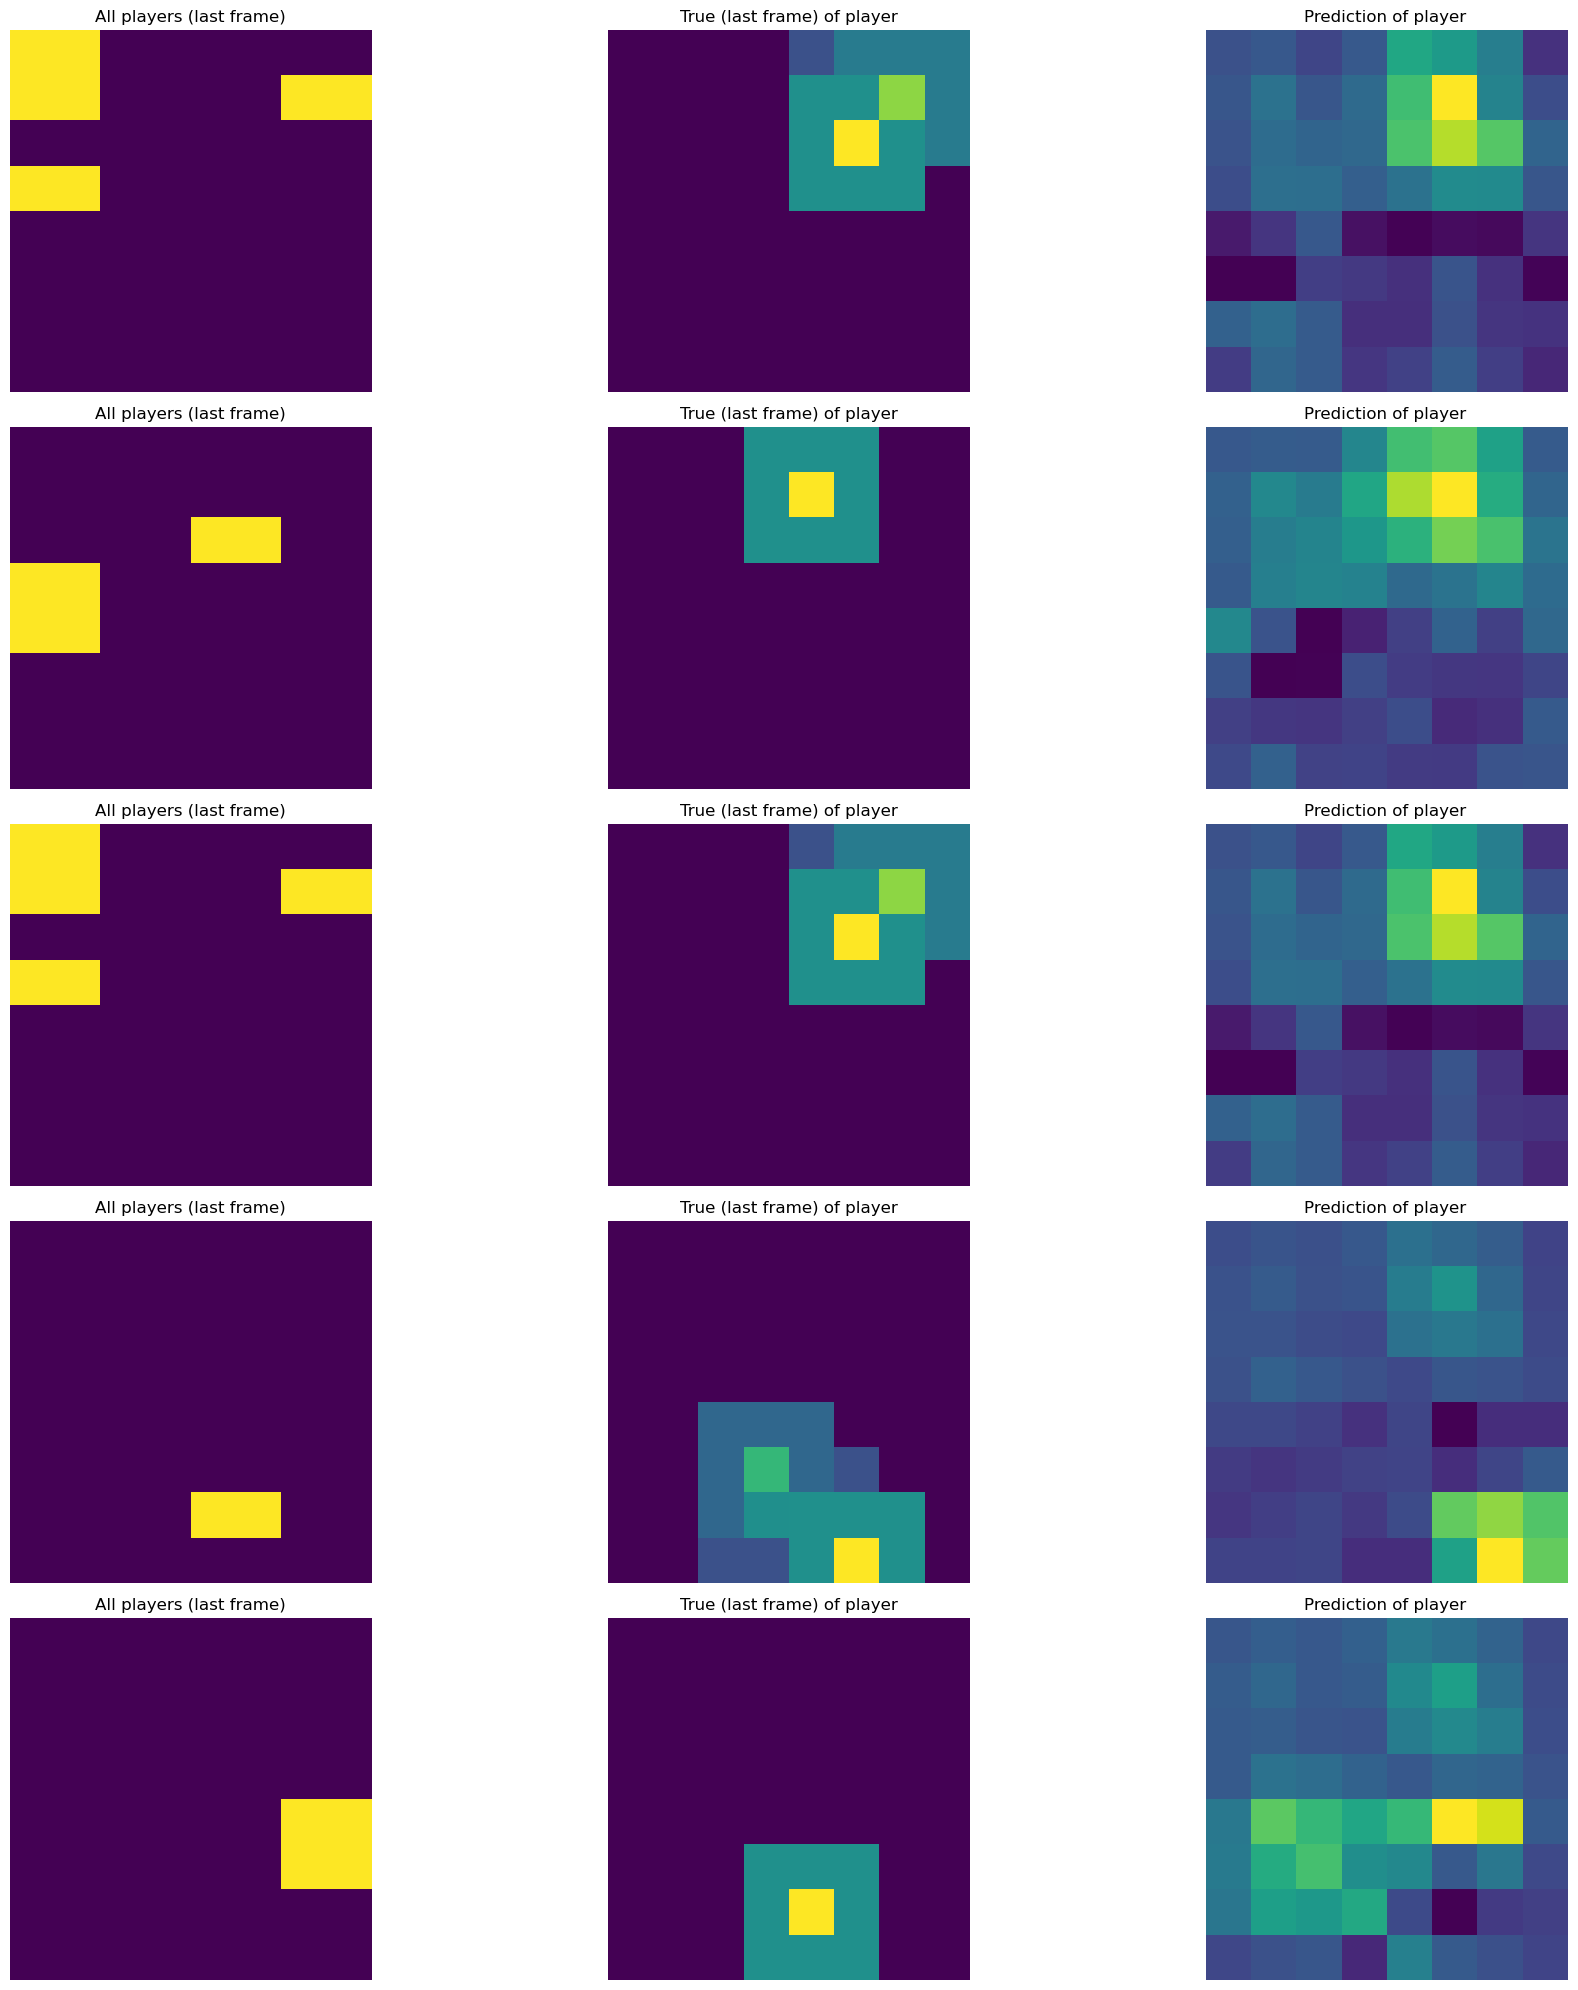

MODELO model1 - ESCENA Scene5
Epoch 1/50
76/76 [==============================] - 10s 113ms/step - loss: 0.0354 - mse: 0.0354 - mae: 0.1095 - val_loss: 0.0326 - val_mse: 0.0326 - val_mae: 0.1128
Epoch 2/50
76/76 [==============================] - 8s 104ms/step - loss: 0.0329 - mse: 0.0329 - mae: 0.1091 - val_loss: 0.0323 - val_mse: 0.0323 - val_mae: 0.1106
Epoch 3/50
76/76 [==============================] - 8s 104ms/step - loss: 0.0323 - mse: 0.0323 - mae: 0.1077 - val_loss: 0.0332 - val_mse: 0.0332 - val_mae: 0.1160
Epoch 4/50
76/76 [==============================] - 8s 104ms/step - loss: 0.0317 - mse: 0.0317 - mae: 0.1070 - val_loss: 0.0329 - val_mse: 0.0329 - val_mae: 0.1150
Epoch 5/50
76/76 [==============================] - 8s 105ms/step - loss: 0.0313 - mse: 0.0313 - mae: 0.1058 - val_loss: 0.0323 - val_mse: 0.0323 - val_mae: 0.1135
Epoch 6/50
76/76 [==============================] - 8s 105ms/step - loss: 0.0310 - mse: 0.0310 - mae: 0.1051 - val_loss: 0.0335 - val_mse: 0.0335 - v

7/7 [==============================] - 1s 27ms/step


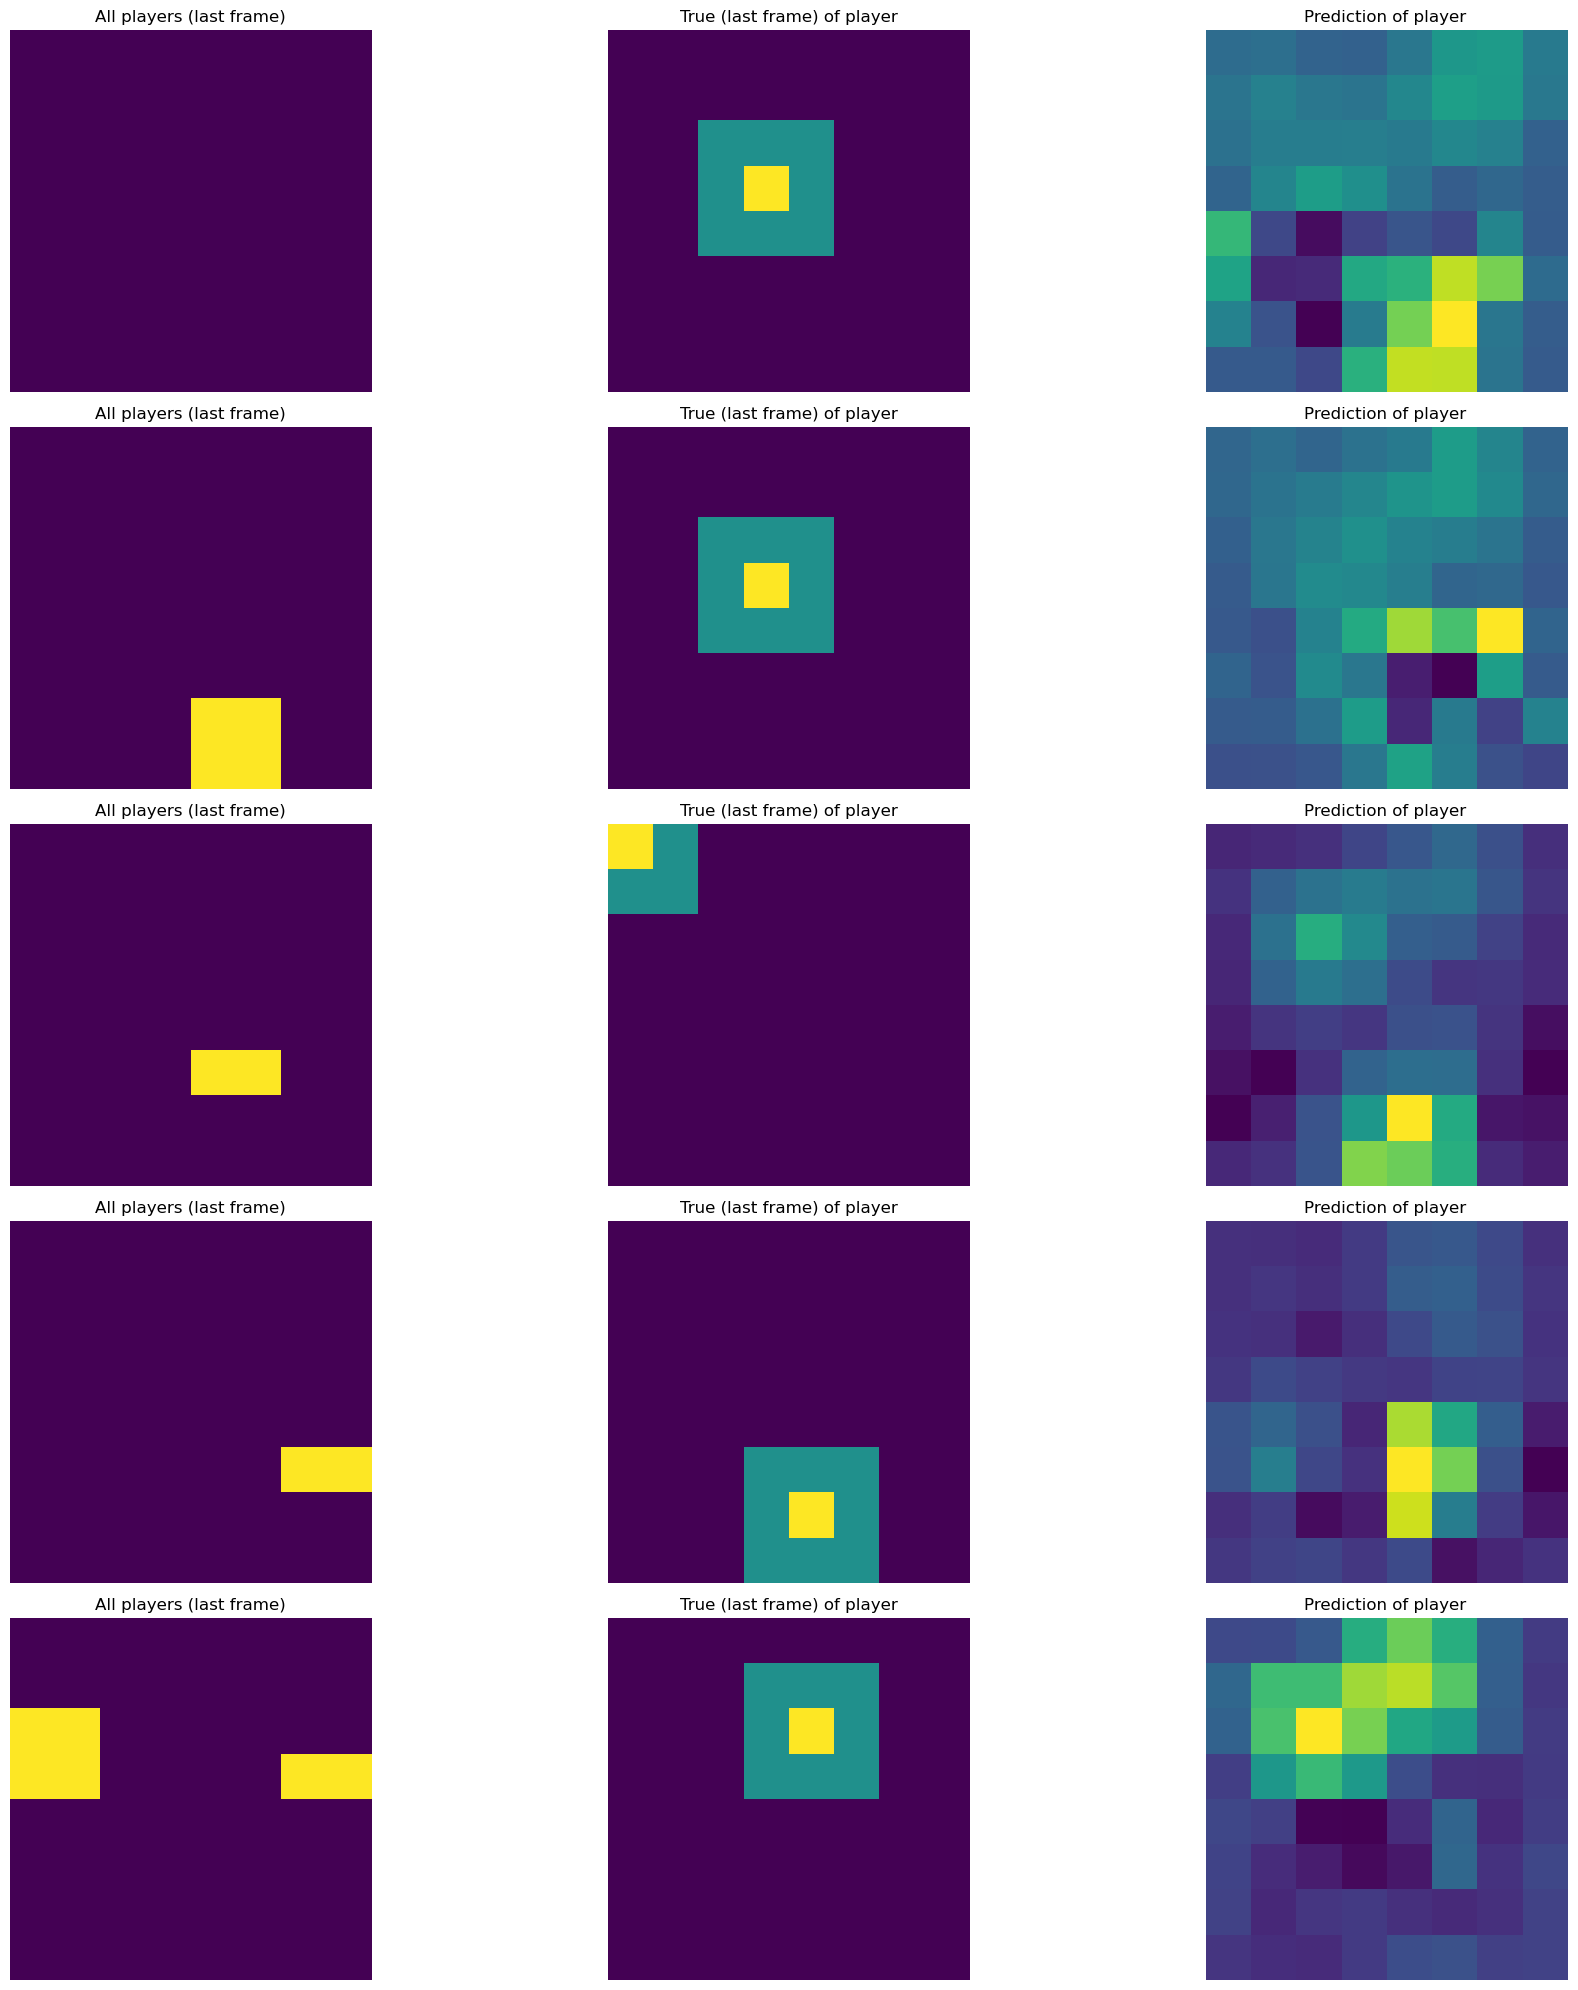

MODELO model2 - ESCENA Scene5
Epoch 1/50
76/76 [==============================] - 17s 197ms/step - loss: 0.0357 - mse: 0.0357 - mae: 0.1085 - val_loss: 0.0323 - val_mse: 0.0323 - val_mae: 0.1079
Epoch 2/50
76/76 [==============================] - 14s 189ms/step - loss: 0.0327 - mse: 0.0327 - mae: 0.1093 - val_loss: 0.0336 - val_mse: 0.0336 - val_mae: 0.1126
Epoch 3/50
76/76 [==============================] - 14s 189ms/step - loss: 0.0319 - mse: 0.0319 - mae: 0.1063 - val_loss: 0.0343 - val_mse: 0.0343 - val_mae: 0.1117
Epoch 4/50
76/76 [==============================] - 14s 190ms/step - loss: 0.0312 - mse: 0.0312 - mae: 0.1047 - val_loss: 0.0328 - val_mse: 0.0328 - val_mae: 0.1116
Epoch 5/50
76/76 [==============================] - 14s 189ms/step - loss: 0.0304 - mse: 0.0304 - mae: 0.1036 - val_loss: 0.0347 - val_mse: 0.0347 - val_mae: 0.1191
Epoch 6/50
76/76 [==============================] - 14s 189ms/step - loss: 0.0301 - mse: 0.0301 - mae: 0.1030 - val_loss: 0.0351 - val_mse: 0.035

7/7 [==============================] - 1s 88ms/step


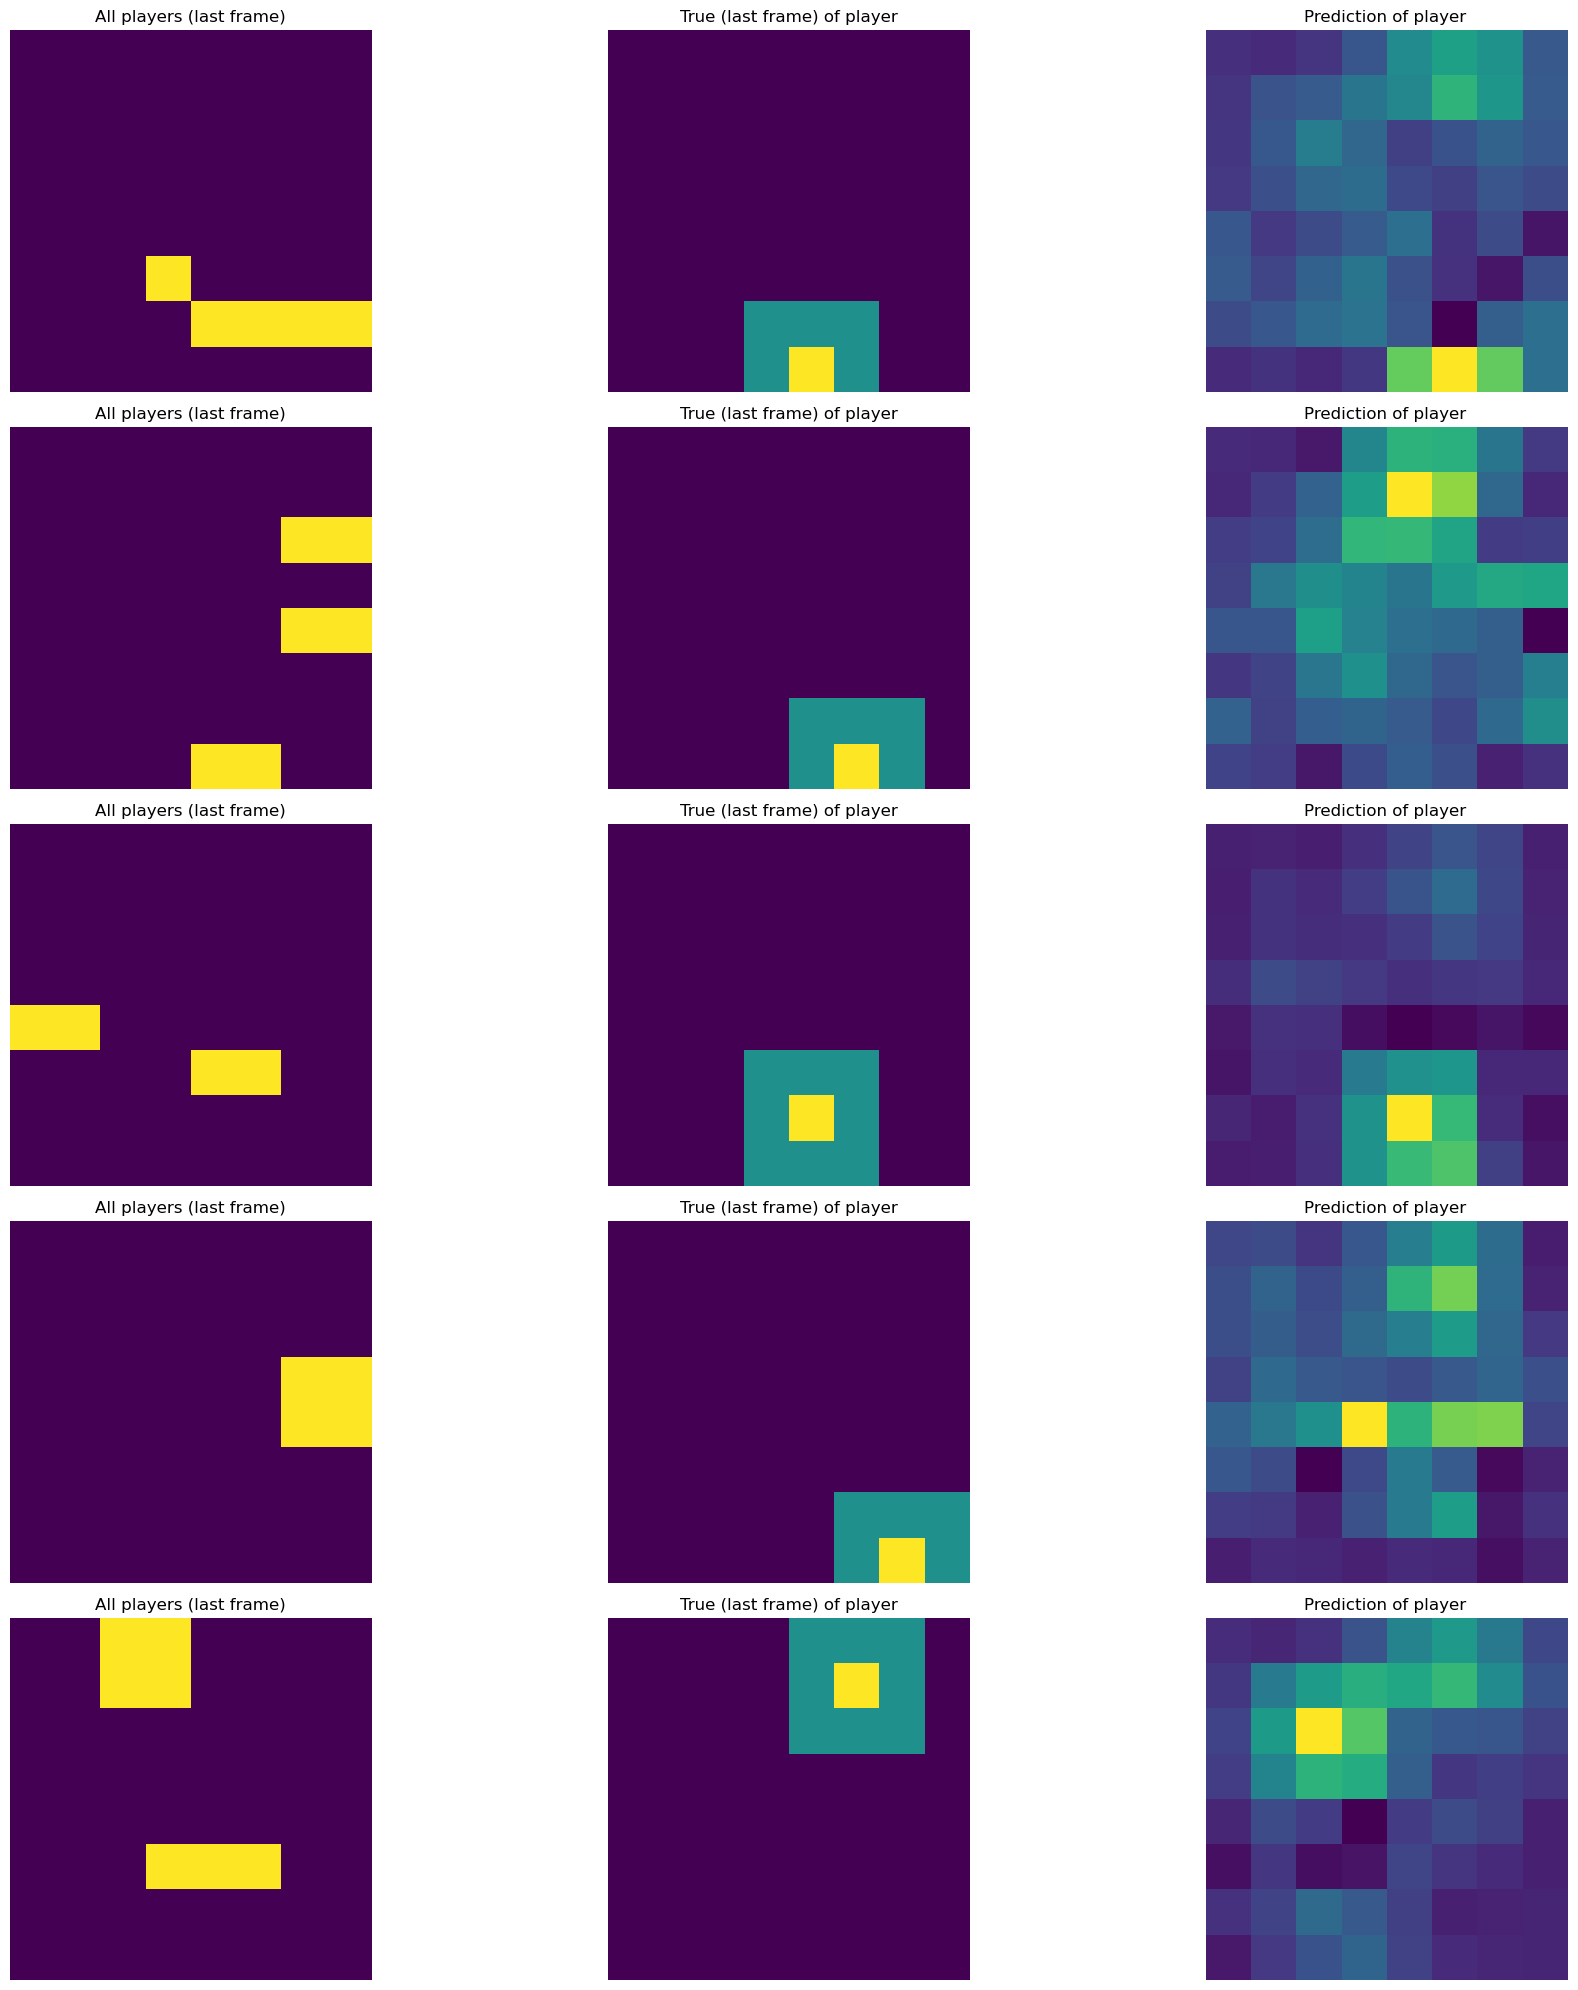

MODELO transf1 - ESCENA Scene5
Epoch 1/50
76/76 [==============================] - 133s 2s/step - loss: 0.0397 - mse: 0.0397 - mae: 0.1228 - val_loss: 0.0326 - val_mse: 0.0326 - val_mae: 0.1129
Epoch 2/50
76/76 [==============================] - 132s 2s/step - loss: 0.0340 - mse: 0.0340 - mae: 0.1122 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae: 0.1133
Epoch 3/50
76/76 [==============================] - 133s 2s/step - loss: 0.0326 - mse: 0.0326 - mae: 0.1098 - val_loss: 0.0317 - val_mse: 0.0317 - val_mae: 0.1091
Epoch 4/50
76/76 [==============================] - 133s 2s/step - loss: 0.0320 - mse: 0.0320 - mae: 0.1077 - val_loss: 0.0322 - val_mse: 0.0322 - val_mae: 0.1126
Epoch 5/50
76/76 [==============================] - 132s 2s/step - loss: 0.0312 - mse: 0.0312 - mae: 0.1066 - val_loss: 0.0334 - val_mse: 0.0334 - val_mae: 0.1130
Epoch 6/50
76/76 [==============================] - 133s 2s/step - loss: 0.0307 - mse: 0.0307 - mae: 0.1048 - val_loss: 0.0325 - val_mse: 0.0325 - val_mae

7/7 [==============================] - 9s 1s/step


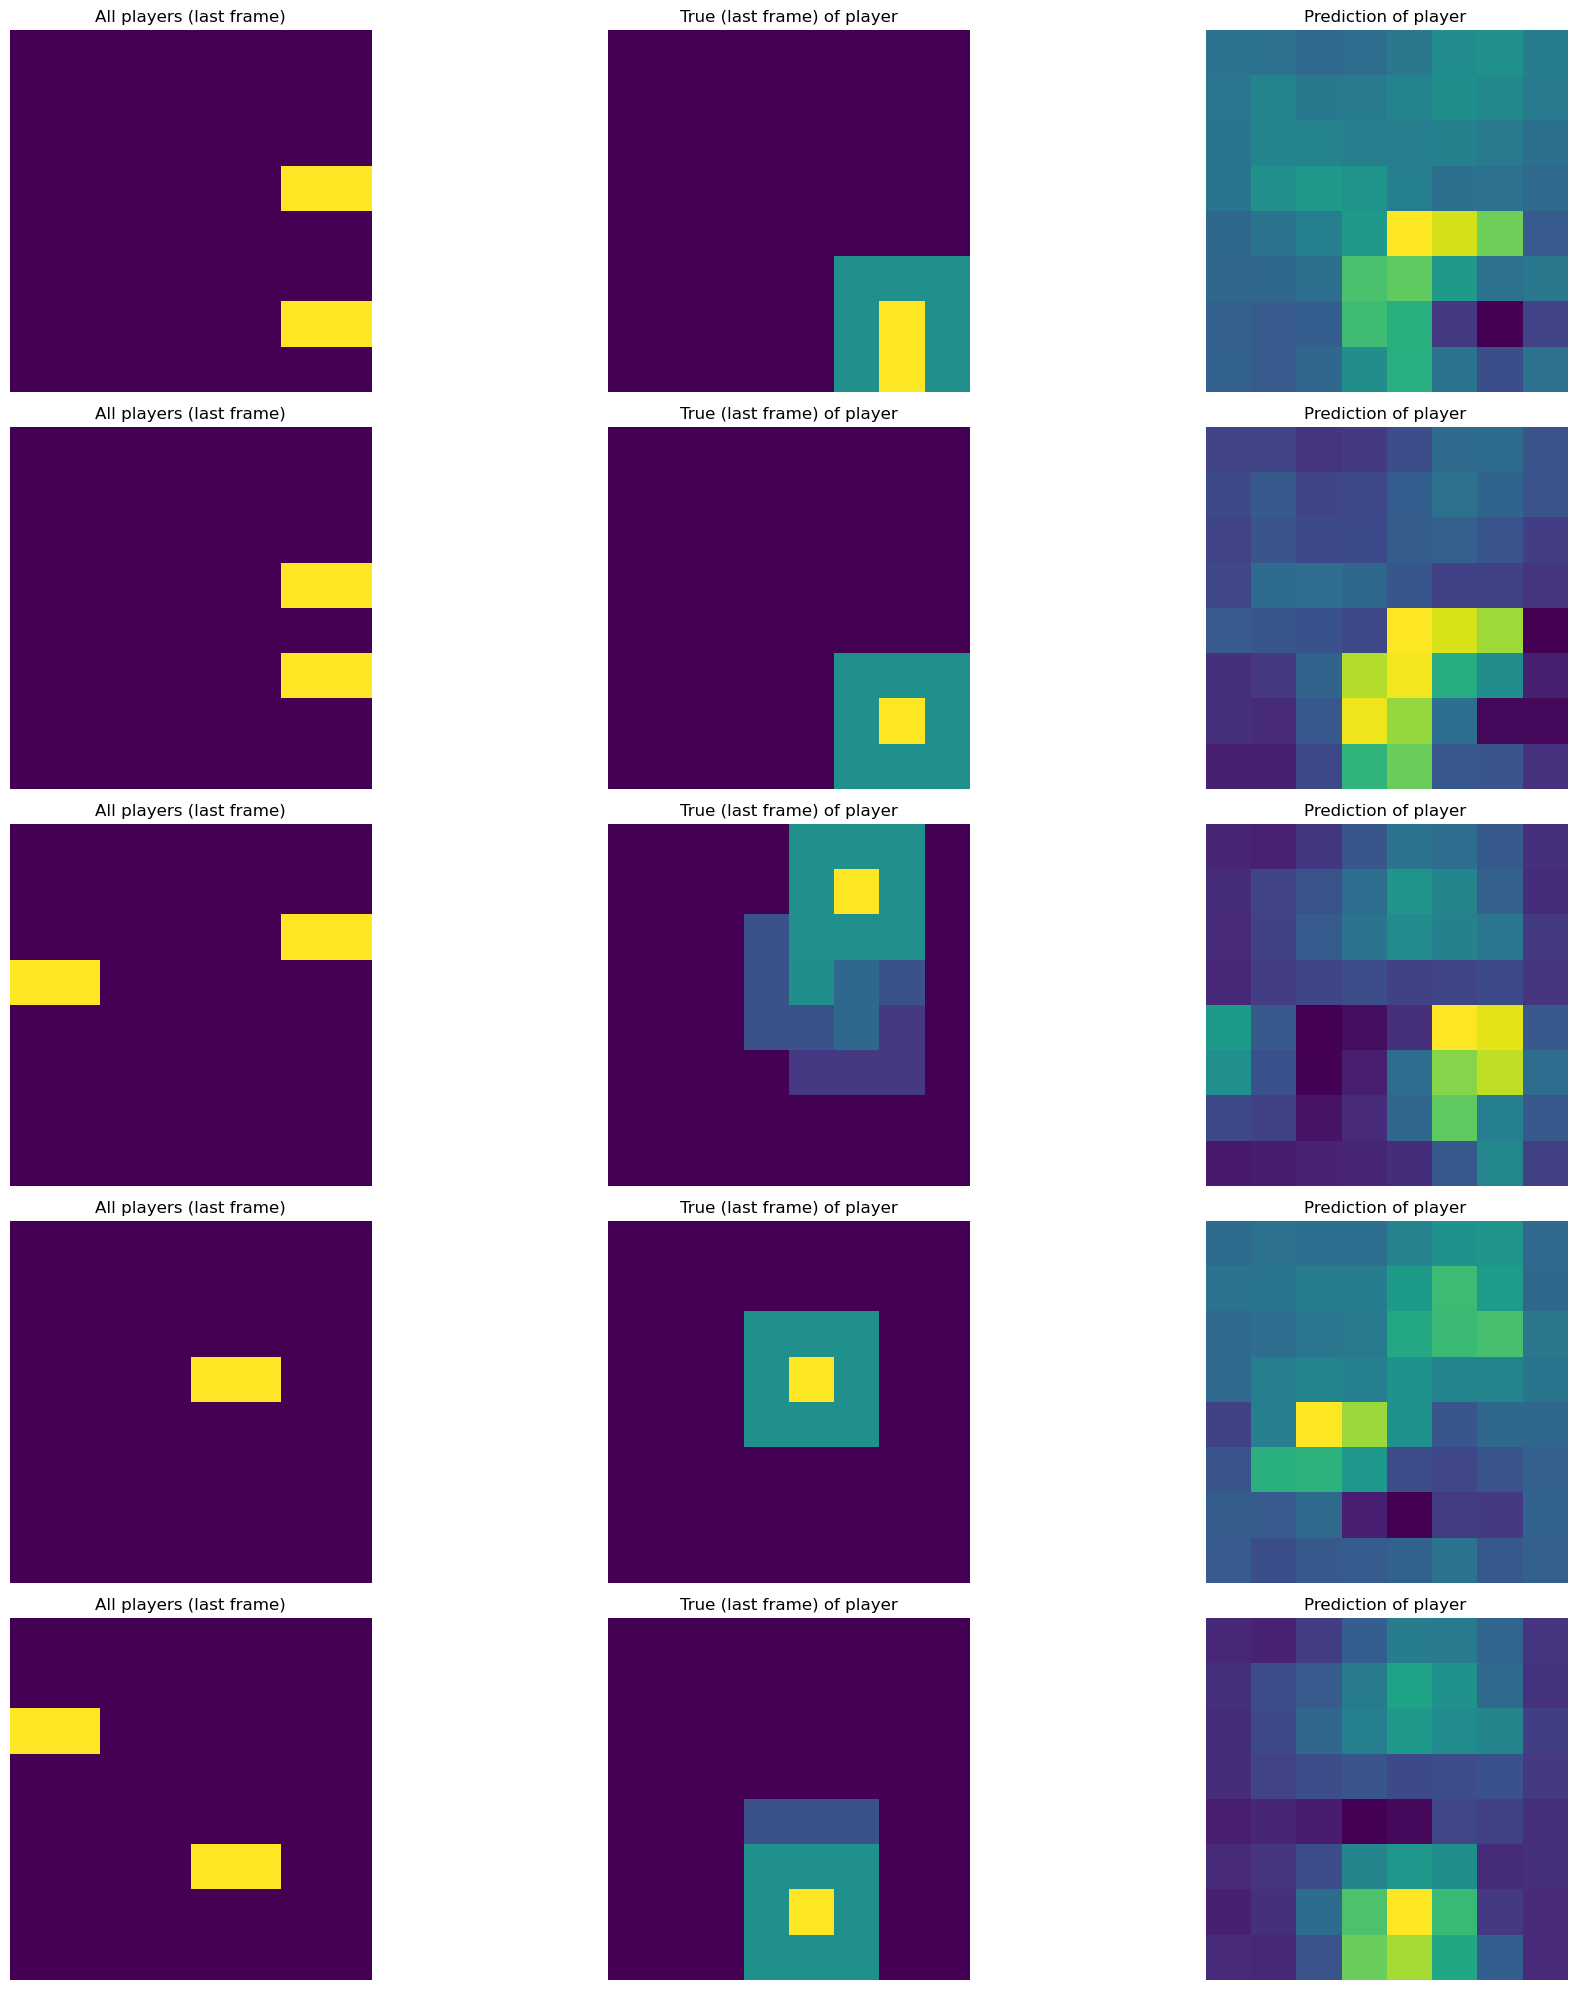

MODELO model0 - ESCENA Scene6
Epoch 1/50
81/81 [==============================] - 24s 237ms/step - loss: 0.0364 - mse: 0.0364 - mae: 0.1119 - val_loss: 0.0379 - val_mse: 0.0379 - val_mae: 0.1168
Epoch 2/50
81/81 [==============================] - 19s 229ms/step - loss: 0.0337 - mse: 0.0337 - mae: 0.1122 - val_loss: 0.0370 - val_mse: 0.0370 - val_mae: 0.1167
Epoch 3/50
81/81 [==============================] - 19s 229ms/step - loss: 0.0330 - mse: 0.0330 - mae: 0.1105 - val_loss: 0.0361 - val_mse: 0.0361 - val_mae: 0.1176
Epoch 4/50
81/81 [==============================] - 18s 228ms/step - loss: 0.0325 - mse: 0.0325 - mae: 0.1086 - val_loss: 0.0362 - val_mse: 0.0362 - val_mae: 0.1130
Epoch 5/50
81/81 [==============================] - 19s 229ms/step - loss: 0.0319 - mse: 0.0319 - mae: 0.1072 - val_loss: 0.0379 - val_mse: 0.0379 - val_mae: 0.1162
Epoch 6/50
81/81 [==============================] - 19s 229ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1062 - val_loss: 0.0364 - val_mse: 0.036

5/5 [==============================] - 1s 105ms/step


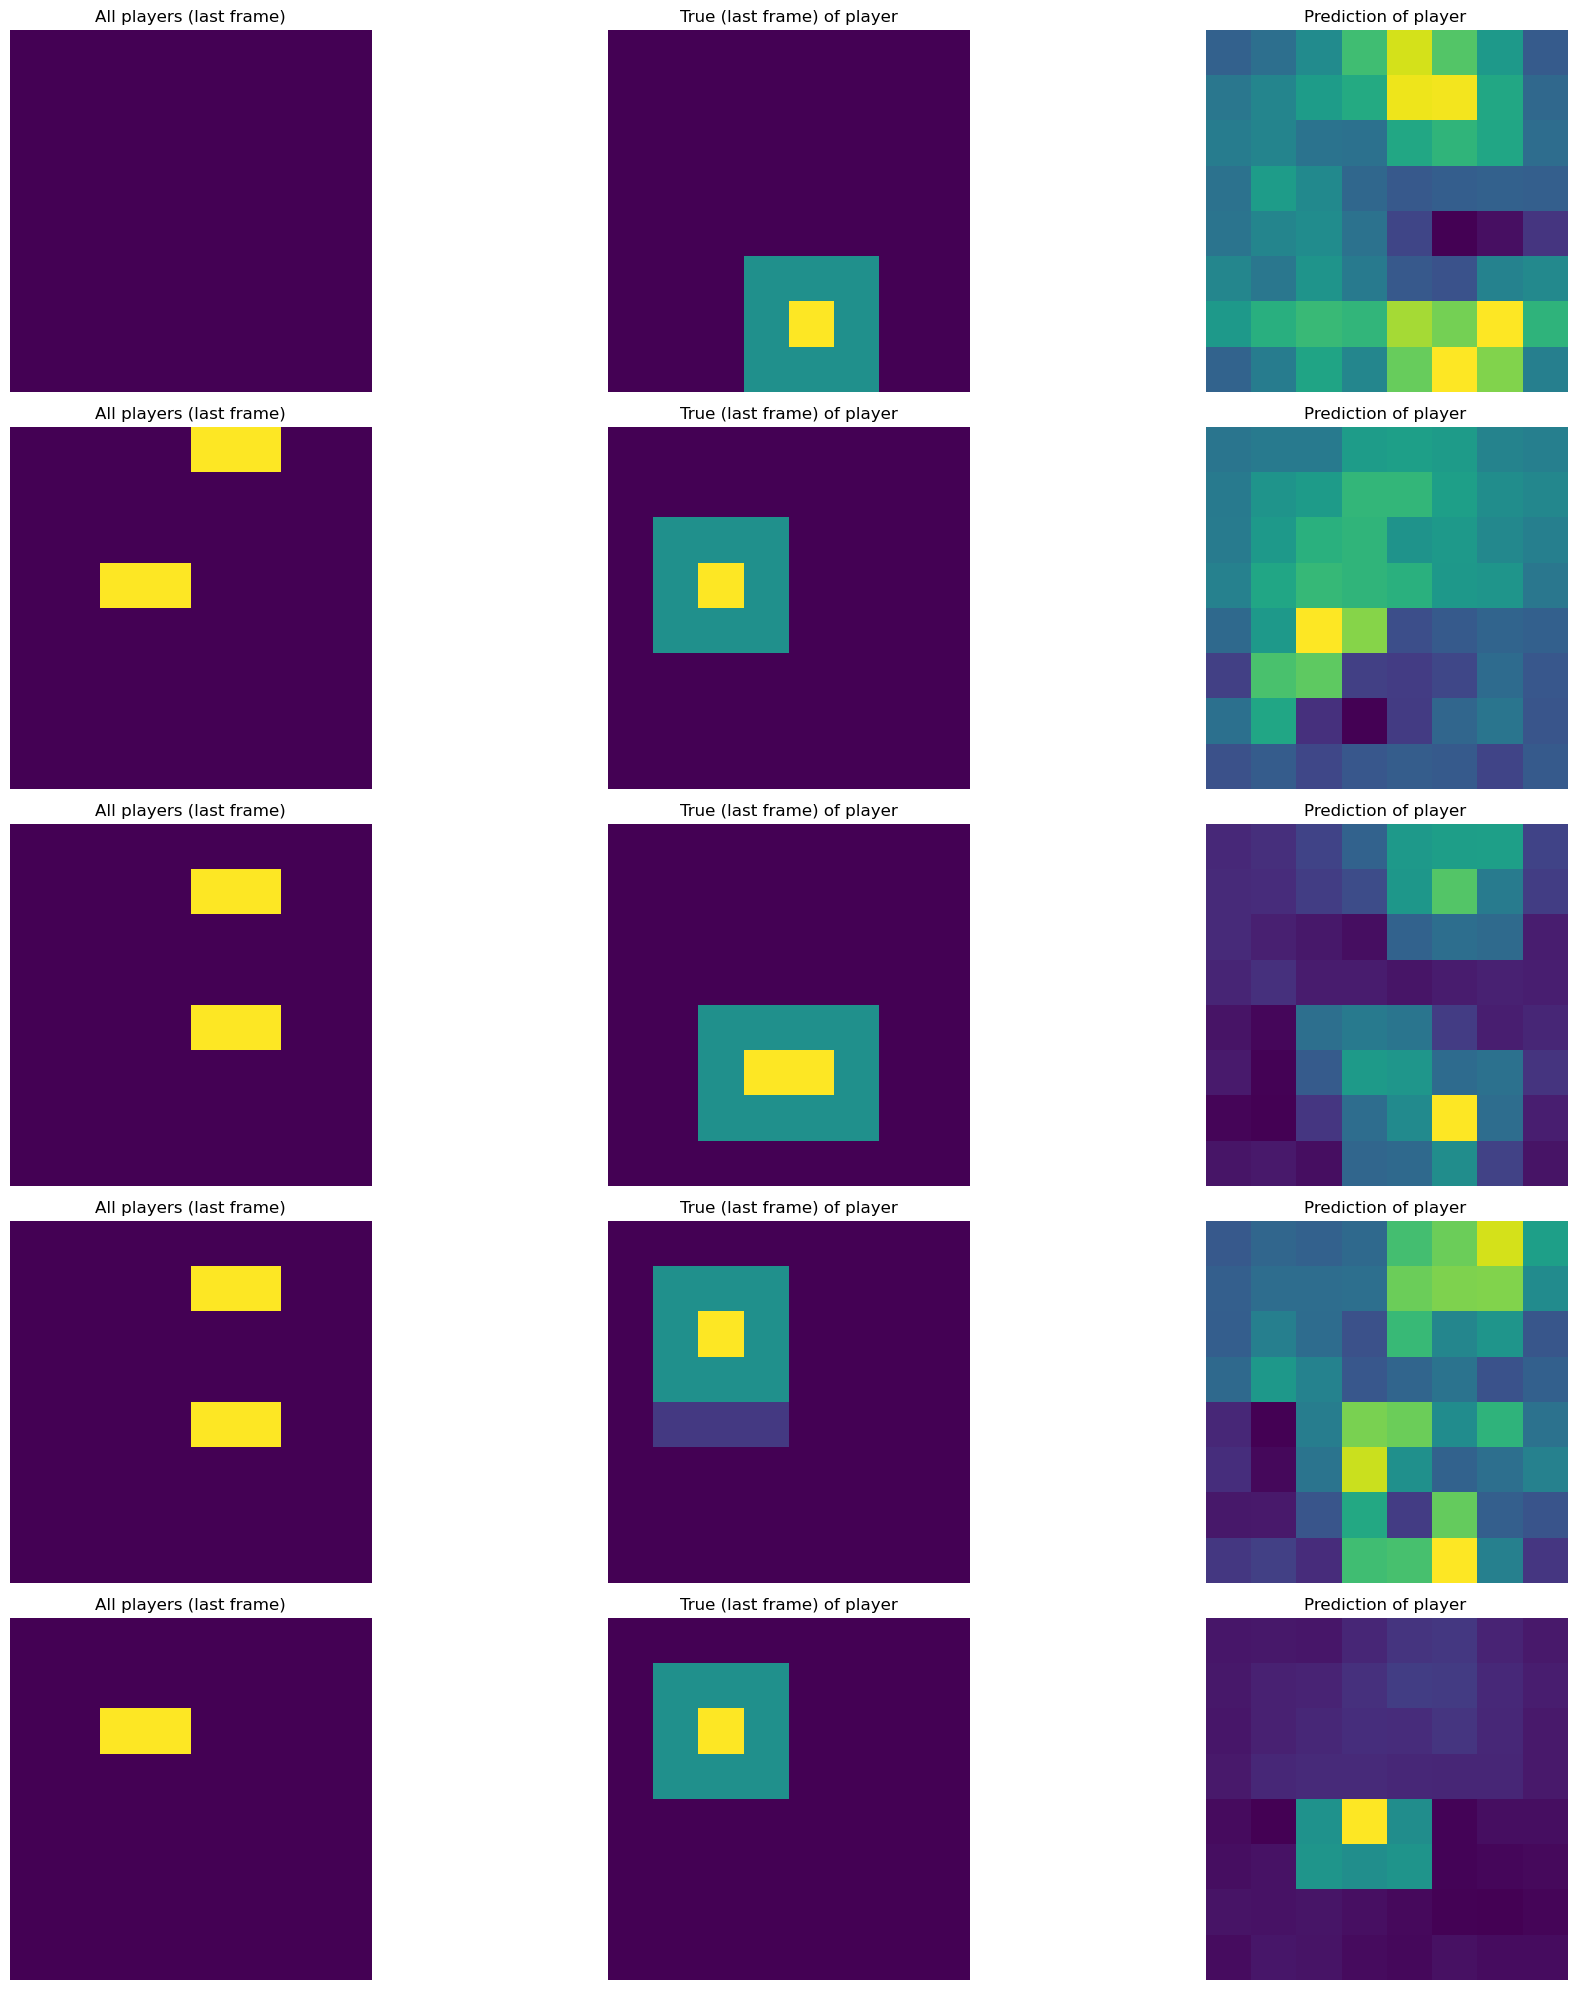

MODELO model1 - ESCENA Scene6
Epoch 1/50
81/81 [==============================] - 15s 160ms/step - loss: 0.0347 - mse: 0.0347 - mae: 0.1084 - val_loss: 0.0357 - val_mse: 0.0357 - val_mae: 0.1138
Epoch 2/50
81/81 [==============================] - 12s 153ms/step - loss: 0.0322 - mse: 0.0322 - mae: 0.1077 - val_loss: 0.0372 - val_mse: 0.0372 - val_mae: 0.1197
Epoch 3/50
81/81 [==============================] - 12s 153ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1057 - val_loss: 0.0402 - val_mse: 0.0402 - val_mae: 0.1218
Epoch 4/50
81/81 [==============================] - 12s 153ms/step - loss: 0.0311 - mse: 0.0311 - mae: 0.1052 - val_loss: 0.0408 - val_mse: 0.0408 - val_mae: 0.1235
Epoch 5/50
81/81 [==============================] - 12s 153ms/step - loss: 0.0307 - mse: 0.0307 - mae: 0.1043 - val_loss: 0.0416 - val_mse: 0.0416 - val_mae: 0.1194
Epoch 6/50
81/81 [==============================] - 12s 153ms/step - loss: 0.0302 - mse: 0.0302 - mae: 0.1032 - val_loss: 0.0414 - val_mse: 0.041

5/5 [==============================] - 1s 30ms/step


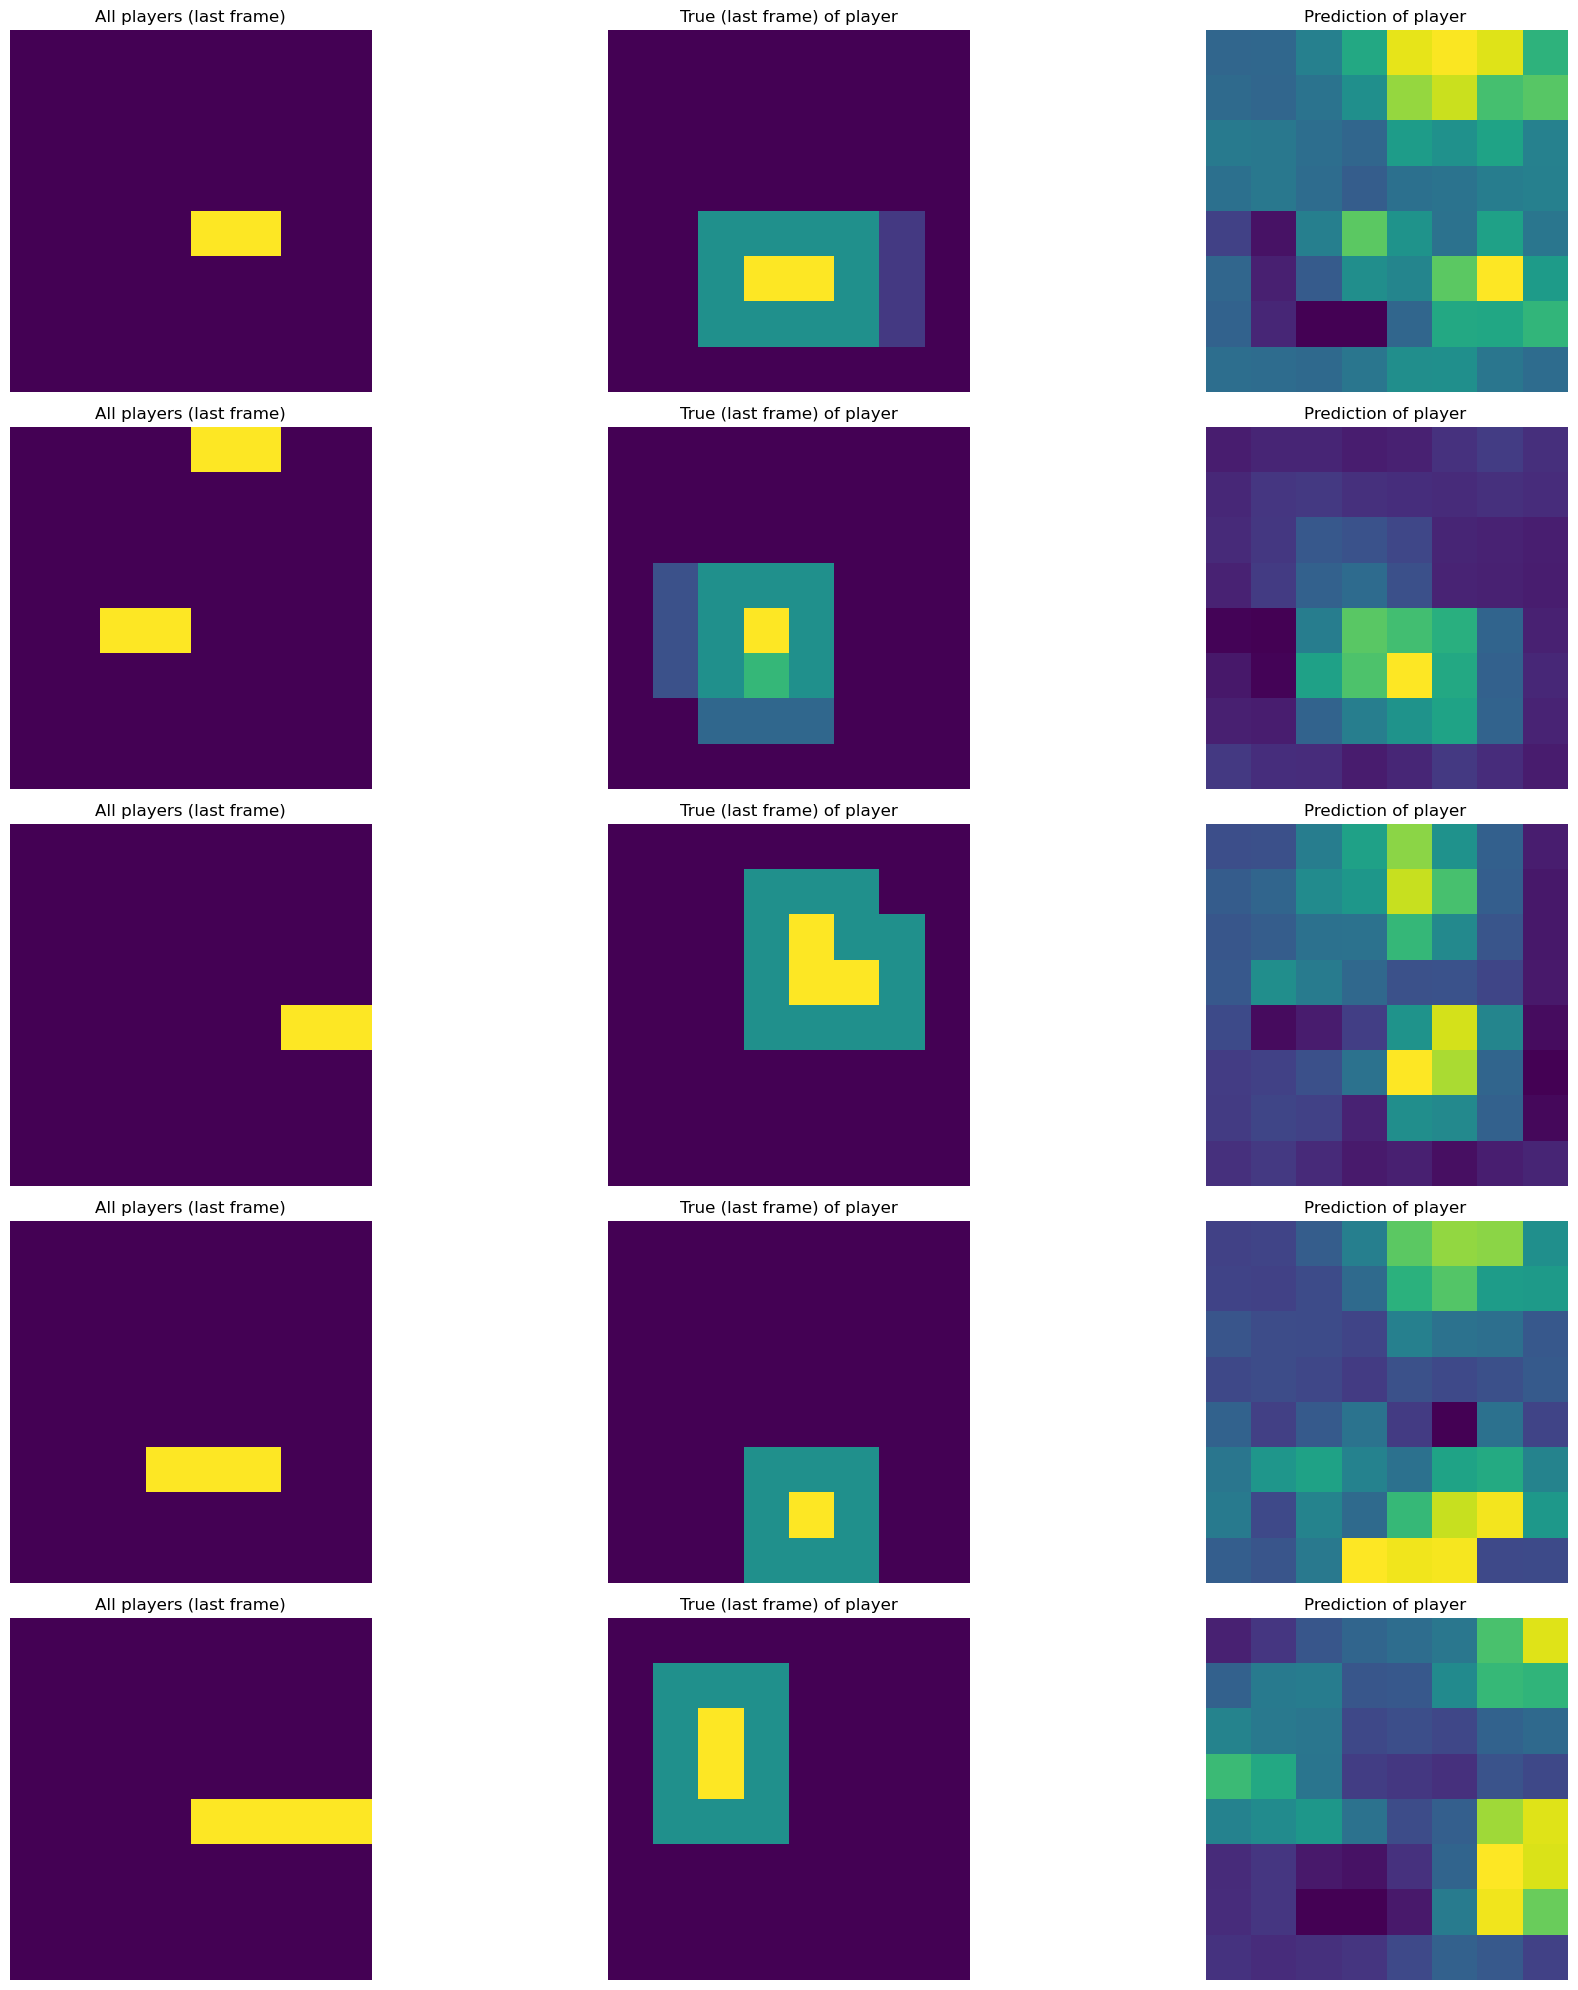

MODELO model2 - ESCENA Scene6
Epoch 1/50
81/81 [==============================] - 24s 272ms/step - loss: 0.0347 - mse: 0.0347 - mae: 0.1064 - val_loss: 0.0363 - val_mse: 0.0363 - val_mae: 0.1182
Epoch 2/50
81/81 [==============================] - 20s 247ms/step - loss: 0.0323 - mse: 0.0323 - mae: 0.1080 - val_loss: 0.0384 - val_mse: 0.0384 - val_mae: 0.1185
Epoch 3/50
81/81 [==============================] - 20s 247ms/step - loss: 0.0314 - mse: 0.0314 - mae: 0.1054 - val_loss: 0.0402 - val_mse: 0.0402 - val_mae: 0.1203
Epoch 4/50
81/81 [==============================] - 20s 249ms/step - loss: 0.0306 - mse: 0.0306 - mae: 0.1030 - val_loss: 0.0393 - val_mse: 0.0393 - val_mae: 0.1137
Epoch 5/50
81/81 [==============================] - 20s 249ms/step - loss: 0.0298 - mse: 0.0298 - mae: 0.1018 - val_loss: 0.0399 - val_mse: 0.0399 - val_mae: 0.1150
Epoch 6/50
81/81 [==============================] - 20s 249ms/step - loss: 0.0292 - mse: 0.0292 - mae: 0.1000 - val_loss: 0.0449 - val_mse: 0.044

5/5 [==============================] - 1s 106ms/step


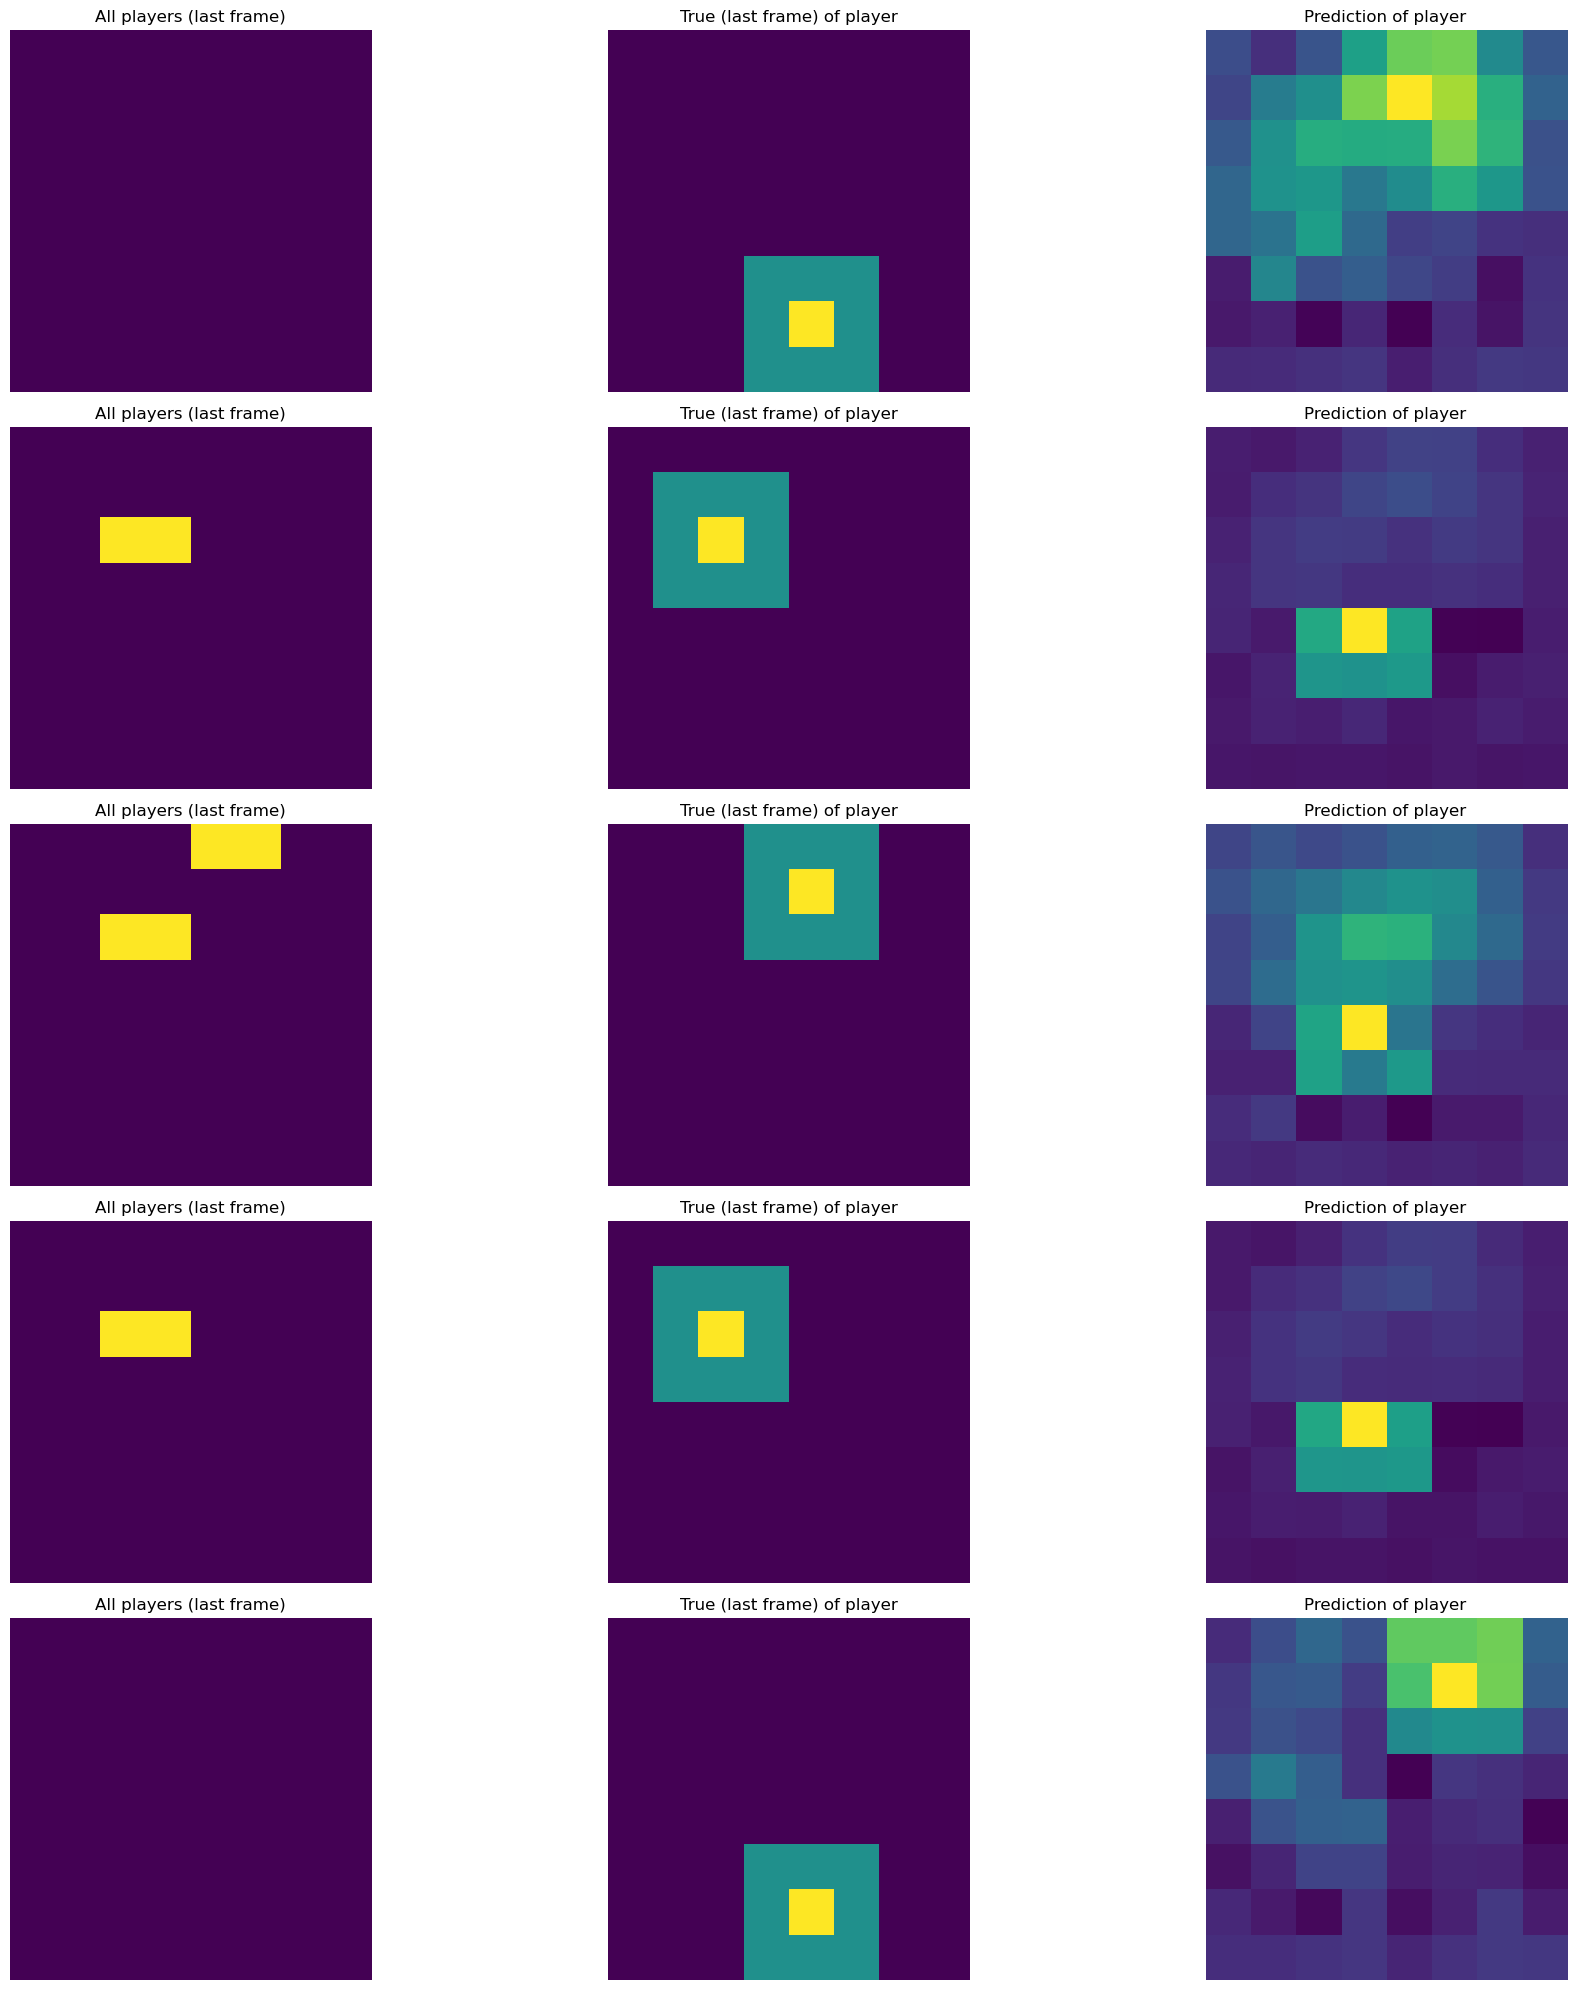

MODELO transf1 - ESCENA Scene6
Epoch 1/50
81/81 [==============================] - 184s 2s/step - loss: 0.0385 - mse: 0.0385 - mae: 0.1200 - val_loss: 0.0371 - val_mse: 0.0371 - val_mae: 0.1144
Epoch 2/50
81/81 [==============================] - 183s 2s/step - loss: 0.0333 - mse: 0.0333 - mae: 0.1103 - val_loss: 0.0363 - val_mse: 0.0363 - val_mae: 0.1131
Epoch 3/50
81/81 [==============================] - 183s 2s/step - loss: 0.0319 - mse: 0.0319 - mae: 0.1074 - val_loss: 0.0371 - val_mse: 0.0371 - val_mae: 0.1165
Epoch 4/50
81/81 [==============================] - 183s 2s/step - loss: 0.0309 - mse: 0.0309 - mae: 0.1054 - val_loss: 0.0372 - val_mse: 0.0372 - val_mae: 0.1181
Epoch 5/50
81/81 [==============================] - 183s 2s/step - loss: 0.0302 - mse: 0.0302 - mae: 0.1046 - val_loss: 0.0396 - val_mse: 0.0396 - val_mae: 0.1151
Epoch 6/50
81/81 [==============================] - 182s 2s/step - loss: 0.0294 - mse: 0.0294 - mae: 0.1017 - val_loss: 0.0417 - val_mse: 0.0417 - val_mae

5/5 [==============================] - 9s 2s/step


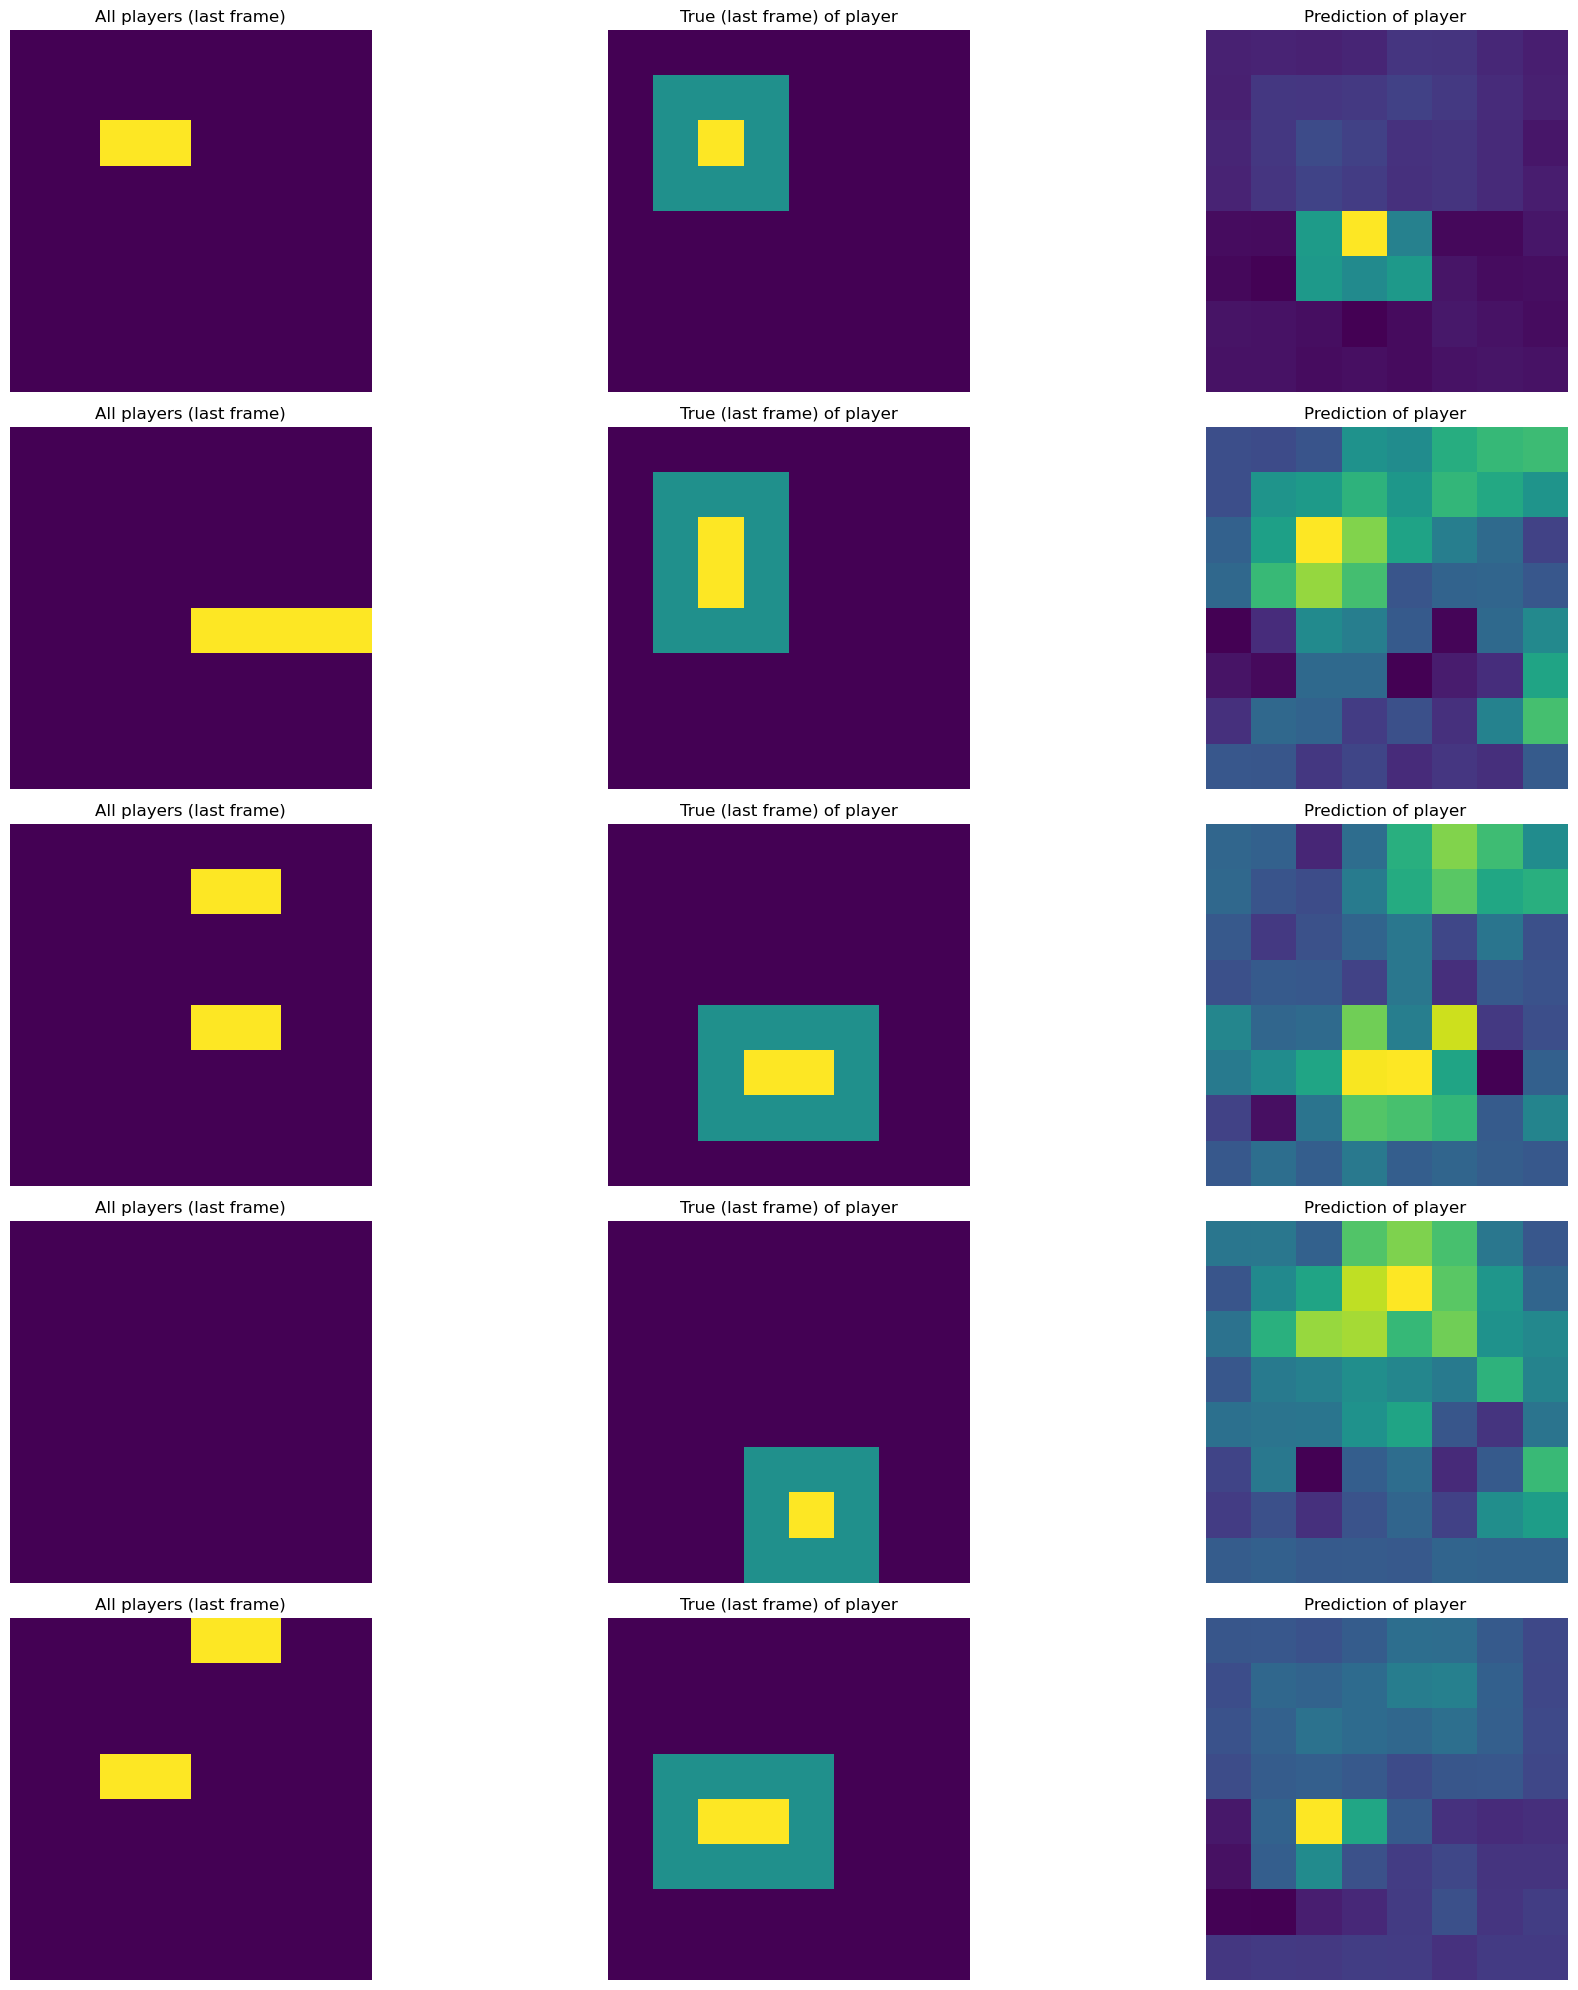

Resultados por escena:
Escena Scene1:
Modelo model0 - MSE: 0.0405, MAE: 0.1216, Tiempo: 113.80s
Modelo model1 - MSE: 0.0438, MAE: 0.1269, Tiempo: 63.75s
Modelo model2 - MSE: 0.0424, MAE: 0.1216, Tiempo: 156.40s
Modelo transf1 - MSE: 0.0414, MAE: 0.1235, Tiempo: 1752.54s

Escena Scene2:
Modelo model0 - MSE: 0.0442, MAE: 0.1217, Tiempo: 500.82s
Modelo model1 - MSE: 0.0449, MAE: 0.1212, Tiempo: 244.99s
Modelo model2 - MSE: 0.0454, MAE: 0.1240, Tiempo: 494.60s
Modelo transf1 - MSE: 0.0448, MAE: 0.1209, Tiempo: 4531.93s

Escena Scene3:
Modelo model0 - MSE: 0.0419, MAE: 0.1230, Tiempo: 611.10s
Modelo model1 - MSE: 0.0427, MAE: 0.1220, Tiempo: 351.39s
Modelo model2 - MSE: 0.0421, MAE: 0.1216, Tiempo: 552.60s
Modelo transf1 - MSE: 0.0418, MAE: 0.1195, Tiempo: 4778.26s

Escena Scene4:
Modelo model0 - MSE: 0.0481, MAE: 0.1246, Tiempo: 785.53s
Modelo model1 - MSE: 0.0406, MAE: 0.1139, Tiempo: 534.91s
Modelo model2 - MSE: 0.0426, MAE: 0.1185, Tiempo: 879.03s
Modelo transf1 - MSE: 0.0443, MAE: 0.11

In [17]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss

# Assuming you have a function to calculate binary cross-entropy (log loss)
def binary_cross_entropy(y_true, y_pred):
    """
    Calcula la Binary Cross-Entropy (BCE) asegurando que y_true y y_pred sean válidos.
    Soporta etiquetas no binarias (soft labels).
    """
    # Asegurar que los valores de y_pred estén entre 0 y 1
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    
    # Asegurar que los valores de y_true estén en el rango [0,1]
    y_true = np.clip(y_true, 0, 1)

    # Fórmula BCE: -(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))
    bce = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    return np.mean(bce)

np.random.seed(42)

# Lista de identificadores de modelo
model_ids = ["model0","model1","model2","transf1"] 


# Estructuras para almacenar resultados y tiempos de ejecución
mse_results = {model_id: [] for model_id in model_ids}
bce_results = {model_id: [] for model_id in model_ids} #binary cross entropy
mae_results = {model_id: [] for model_id in model_ids}
training_times = {model_id: [] for model_id in model_ids}
total_execution_time = {model_id: 0 for model_id in model_ids}

print(np.unique(S))

escenas_seleccionadas=np.unique(S)
#escenas_seleccionadas=escenas_seleccionadas[3:]
print("Para esta ejecución se han seleccionada las escenas: ")
print(escenas_seleccionadas)

for ixs, sc in enumerate(escenas_seleccionadas):
    # Índices para entrenamiento y prueba
    train_indices = np.where(S != sc)[0]
    test_indices = np.where(S == sc)[0]
    np.random.shuffle(train_indices)

    XYT_train = XYT[train_indices]
    rssiT_train = rssiT[train_indices]
    YT_train = YT[train_indices]

    XYT_test = XYT[test_indices]
    rssiT_test = rssiT[test_indices]
    YT_test = YT[test_indices]
    
    for model_id in model_ids:
        print(f"MODELO {model_id} - ESCENA {sc}")
        
        model = load_model(f"{model_id}.h5")

        start_time = time.time()

        history = model.fit([XYT_train, rssiT_train], YT_train,
                                  batch_size=16,
                                  validation_data=([XYT_test, rssiT_test], YT_test),
                                  epochs=50)
        end_time = time.time()
        training_time = end_time - start_time
        
        YT_prediction = model.predict([XYT_test, rssiT_test])

        plottingRandom(XYT_test, YT_test, YT_prediction)

        mse = mean_squared_error(YT_test.flatten(), YT_prediction.flatten())
        mae = mean_absolute_error(YT_test.flatten(), YT_prediction.flatten())
        bce = binary_cross_entropy(YT_test.flatten(), YT_prediction.flatten())

        mse_results[model_id].append(mse)
        mae_results[model_id].append(mae)
        bce_results[model_id].append(bce)
        
       
        training_times[model_id].append(training_time)
        total_execution_time[model_id] += training_time

# Calculando promedios y mostrando resultados

print("Resultados por escena:")
for i, sc in enumerate(escenas_seleccionadas):
    print(f"Escena {sc}:")
    for model_id in model_ids:
        print(f"Modelo {model_id} - MSE: {mse_results[model_id][i]:.4f}, MAE: {mae_results[model_id][i]:.4f}, Tiempo: {training_times[model_id][i]:.2f}s")
    print("")
    
print("RESUMEN RESULTADOS:")
for model_id in model_ids:
    average_mse = np.mean(mse_results[model_id])
    average_mae = np.mean(mae_results[model_id])
    average_bce = np.mean(bce_results[model_id])
    print(f"Modelo {model_id}:")
    print(f"Tiempo de ejecución total: {total_execution_time[model_id]:.2f} segundos")
    print(f"MSE promedio: {average_mse:.4f}")
    print(f"MAE promedio: {average_mae:.4f}\n")
    print(f"BCE promedio: {average_bce:.4f}\n")


In [18]:
ts.sort()
print(ts)

[1710613851, 1710613852, 1710613853, 1710613854, 1710613855, 1710613856, 1710613857, 1710613858, 1710613859, 1710613860, 1710613861, 1710613862, 1710613863, 1710613864, 1710613865, 1710613866, 1710613867, 1710613868, 1710613869, 1710613870, 1710613871, 1710613872, 1710613873, 1710613874, 1710613875, 1710613876, 1710613877, 1710613878, 1710613879, 1710613880, 1710613881, 1710613882, 1710613883, 1710613884, 1710613885, 1710613886, 1710613887, 1710613888, 1710613889, 1710613890, 1710613891, 1710613892, 1710613893, 1710613894, 1710613895, 1710613896, 1710613897, 1710613898, 1710613899, 1710613900, 1710613901, 1710613902, 1710613903, 1710613904, 1710613905, 1710613906, 1710613907, 1710613908, 1710613909, 1710613910, 1710613911, 1710613912, 1710613913, 1710613914, 1710613915, 1710613916, 1710613917, 1710613918, 1710613919, 1710613920, 1710613921, 1710613922, 1710613923, 1710613924, 1710613925, 1710613926, 1710613927, 1710613928, 1710613929, 1710613930, 1710613931, 1710613932, 1710613933, 171